### Install Required Libraries  
First, we install the necessary packages for training and playing Atari games.

In [ ]:
!pip install -q gymnasium
!pip install -q gymnasium[atari,accept-rom-license]
!pip install -q ale-py
!pip install -q stable-baselines3
!pip install -q torch tensorboard opencv-python imageio imageio-ffmpeg matplotlib
!pip install -q autorom[accept-rom-license]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 8.1 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.7 MB/s eta 0:00:0000:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kaggle-environments 1.16.11 requires shimmy>=1.2.1, but you have shimmy 0.2.1 which is incompatible.


### 🎮 Atari Games in Reinforcement Learning  
Atari games are widely used in reinforcement learning research as benchmarks for AI agents.  
They provide:
- **High-dimensional visual input** (pixels from the game screen)
- **Complex decision-making challenges**
- **Reward-based learning environment**  

In this notebook, we train an agent to play **Breakout**, a classic arcade game requiring precise paddle control and strategic brick-breaking.

###  Creating the Atari Environment (Breakout)  
We create an Atari environment using `make_atari_env()`.  
- **Frame stacking** (4 frames) is applied for better state representation.
- **Seed is set** for reproducibility.

In [ ]:
# imports used
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack, VecVideoRecorder
import matplotlib.pyplot as plt
import ale_py

# Create the breakout environment
env = make_atari_env("BreakoutNoFrameskip-v4", n_envs=1, seed=42)
env = VecFrameStack(env, n_stack=4)

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


### Checking Environment Details  
We inspect the observation space, action space, and game-specific information.

In [ ]:
# showing important details of the environment
print("===== Environment Details =====")
print(f"Environment ID: {env.envs[0].unwrapped.spec.id}")
print(f"Observation Space: {env.observation_space}")
print(f"Action Space: {env.action_space}")
print(f"Number of Actions: {env.action_space.n}")
print(f"Reward Range: {env.envs[0].unwrapped.reward_range}")  # Print reward range
print(f"Environment Metadata: {env.envs[0].unwrapped.metadata}")

===== Environment Details =====
Environment ID: BreakoutNoFrameskip-v4
Observation Space: Box(0, 255, (84, 84, 4), uint8)
Action Space: Discrete(4)
Number of Actions: 4
Reward Range: (-inf, inf)
Environment Metadata: {'render_modes': ['human', 'rgb_array'], 'obs_types': {'ram', 'grayscale', 'rgb'}}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The reward range (-inf, inf) simply means our environment is not limiting rewards. It could be any real number postive or negative to infitinty.

### Training the DQN Agent  
- **CNN Policy:** Uses convolutional layers to process visual input  
- **Exploration settings:** Adjusted to improve learning  
- **Training for 1M timesteps**

In [ ]:
# Wrap the environment to record videos
env = VecVideoRecorder(env, "videos/", record_video_trigger=lambda x: x % 1000 == 0, video_length=1000)

# Define the DQN agent with CNNPolicy
model = DQN(
    "CnnPolicy",
    env,
    verbose=1,
    learning_rate=1e-4,
    buffer_size=100000,
    batch_size=32,
    gamma=0.99,
    exploration_fraction=0.1,
    exploration_final_eps=0.01,
    tensorboard_log="./dqn_breakout_tensorboard/",
)

# Train the agent
model.learn(total_timesteps=1_000_000)

Using cuda device
Wrapping the env in a VecTransposeImage.
Logging to ./dqn_breakout_tensorboard/DQN_1
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 246      |
|    time_elapsed     | 0        |
|    total_timesteps  | 92       |
----------------------------------


/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 524      |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 414      |
|    time_elapsed     | 0        |
|    total_timesteps  | 327      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 819      |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.995    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 455      |
|    time_elapsed     | 1        |
|    total_timesteps  | 515      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 851      |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.994    |
| time/               |          |
|    episodes       

/usr/local/lib/python3.10/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """


Moviepy - Building video /kaggle/working/videos/rl-video-step-0-to-step-1000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-0-to-step-1000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 877      |
|    ep_rew_mean      | 2        |
|    exploration_rate | 0.989    |
| time/               |          |
|    episodes         | 28       |
|    fps              | 360      |
|    time_elapsed     | 3        |
|    total_timesteps  | 1108     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 838      |
|    ep_rew_mean      | 1.83     |
|    exploration_rate | 0.988    |
| time/               |          |
|    episodes         | 32       |
|    fps              | 371      |
|    time_elapsed     | 3        |
|    total_timesteps  | 1198     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 792      |
|    ep_rew_mean      | 1.57  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-2000-to-step-3000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 700      |
|    ep_rew_mean      | 1.05     |
|    exploration_rate | 0.969    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 446      |
|    time_elapsed     | 7        |
|    total_timesteps  | 3159     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 700      |
|    ep_rew_mean      | 1.05     |
|    exploration_rate | 0.968    |
| time/               |          |
|    episodes         | 104      |
|    fps              | 451      |
|    time_elapsed     | 7        |
|    total_timesteps  | 3249     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 691      |
|    ep_rew_mean      | 1  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-4000-to-step-5000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 728      |
|    ep_rew_mean      | 1.2      |
|    exploration_rate | 0.95     |
| time/               |          |
|    episodes         | 152      |
|    fps              | 464      |
|    time_elapsed     | 10       |
|    total_timesteps  | 5000     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 724      |
|    ep_rew_mean      | 1.19     |
|    exploration_rate | 0.949    |
| time/               |          |
|    episodes         | 156      |
|    fps              | 467      |
|    time_elapsed     | 10       |
|    total_timesteps  | 5118     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 718      |
|    ep_rew_mean      | 1.16     |
|    exploration_rate | 0.948    |
| time/               |          |
|    episodes         | 160      |
|    fps              | 469      |
|    time_elapsed     | 11       |
|    total_timesteps  | 5208     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 718      |
|    ep_rew_mean      | 1.16     |
|    exploration_rate | 0.947    |
| time/               |          |
|    episodes       

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-6000-to-step-7000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 704      |
|    ep_rew_mean      | 1.07     |
|    exploration_rate | 0.931    |
| time/               |          |
|    episodes         | 220      |
|    fps              | 476      |
|    time_elapsed     | 14       |
|    total_timesteps  | 7001     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 704      |
|    ep_rew_mean      | 1.07     |
|    exploration_rate | 0.93     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 478      |
|    time_elapsed     | 14       |
|    total_timesteps  | 7121     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 707      |
|    ep_rew_mean      | 1.09     |
|    exploration_rate | 0.928    |
| time/               |          |
|    episodes         | 228      |
|    fps              | 481      |
|    time_elapsed     | 15       |
|    total_timesteps  | 7260     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 703      |
|    ep_rew_mean      | 1.07     |
|    exploration_rate | 0.927    |
| time/               |          |
|    episodes       

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-8000-to-step-9000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 725      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.91     |
| time/               |          |
|    episodes         | 276      |
|    fps              | 487      |
|    time_elapsed     | 18       |
|    total_timesteps  | 9063     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 721      |
|    ep_rew_mean      | 1.2      |
|    exploration_rate | 0.909    |
| time/               |          |
|    episodes         | 280      |
|    fps              | 488      |
|    time_elapsed     | 18       |
|    total_timesteps  | 9153     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 721      |
|    ep_rew_mean      | 1.2

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-10000-to-step-11000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 723      |
|    ep_rew_mean      | 1.19     |
|    exploration_rate | 0.891    |
| time/               |          |
|    episodes         | 336      |
|    fps              | 490      |
|    time_elapsed     | 22       |
|    total_timesteps  | 11000    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 723      |
|    ep_rew_mean      | 1.19     |
|    exploration_rate | 0.89     |
| time/               |          |
|    episodes         | 340      |
|    fps              | 491      |
|    time_elapsed     | 22       |
|    total_timesteps  | 11135    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 723      |
|    ep_rew_mean      | 1.19     |
|    exploration_rate | 0.888    |
| time/               |          |
|    episodes         | 344      |
|    fps              | 493      |
|    time_elapsed     | 22       |
|    total_timesteps  | 11322    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 728      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.886    |
| time/               |          |
|    episodes       

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-12000-to-step-13000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 723      |
|    ep_rew_mean      | 1.18     |
|    exploration_rate | 0.87     |
| time/               |          |
|    episodes         | 400      |
|    fps              | 493      |
|    time_elapsed     | 26       |
|    total_timesteps  | 13085    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 723      |
|    ep_rew_mean      | 1.18     |
|    exploration_rate | 0.87     |
| time/               |          |
|    episodes         | 404      |
|    fps              | 493      |
|    time_elapsed     | 26       |
|    total_timesteps  | 13175    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 720      |
|    ep_rew_mean      | 1

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-14000-to-step-15000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 734      |
|    ep_rew_mean      | 1.26     |
|    exploration_rate | 0.85     |
| time/               |          |
|    episodes         | 456      |
|    fps              | 496      |
|    time_elapsed     | 30       |
|    total_timesteps  | 15168    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 732      |
|    ep_rew_mean      | 1.25     |
|    exploration_rate | 0.849    |
| time/               |          |
|    episodes         | 460      |
|    fps              | 497      |
|    time_elapsed     | 30       |
|    total_timesteps  | 15260    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 732      |
|    ep_rew_mean      | 1

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-16000-to-step-17000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 725      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.832    |
| time/               |          |
|    episodes         | 516      |
|    fps              | 497      |
|    time_elapsed     | 34       |
|    total_timesteps  | 17007    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 725      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.83     |
| time/               |          |
|    episodes         | 520      |
|    fps              | 498      |
|    time_elapsed     | 34       |
|    total_timesteps  | 17143    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 725      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.829    |
| time/               |          |
|    episodes         | 524      |
|    fps              | 499      |
|    time_elapsed     | 34       |
|    total_timesteps  | 17308    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 722      |
|    ep_rew_mean      | 1.2      |
|    exploration_rate | 0.828    |
| time/               |          |
|    episodes       

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-18000-to-step-19000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 740      |
|    ep_rew_mean      | 1.31     |
|    exploration_rate | 0.811    |
| time/               |          |
|    episodes         | 576      |
|    fps              | 500      |
|    time_elapsed     | 38       |
|    total_timesteps  | 19139    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 736      |
|    ep_rew_mean      | 1.29     |
|    exploration_rate | 0.81     |
| time/               |          |
|    episodes         | 580      |
|    fps              | 501      |
|    time_elapsed     | 38       |
|    total_timesteps  | 19229    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 736      |
|    ep_rew_mean      | 1

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-20000-to-step-21000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 740      |
|    ep_rew_mean      | 1.33     |
|    exploration_rate | 0.792    |
| time/               |          |
|    episodes         | 632      |
|    fps              | 500      |
|    time_elapsed     | 41       |
|    total_timesteps  | 21001    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 746      |
|    ep_rew_mean      | 1.36     |
|    exploration_rate | 0.789    |
| time/               |          |
|    episodes         | 636      |
|    fps              | 502      |
|    time_elapsed     | 42       |
|    total_timesteps  | 21298    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 744      |
|    ep_rew_mean      | 1.35     |
|    exploration_rate | 0.788    |
| time/               |          |
|    episodes         | 640      |
|    fps              | 502      |
|    time_elapsed     | 42       |
|    total_timesteps  | 21388    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 744      |
|    ep_rew_mean      | 1.35     |
|    exploration_rate | 0.787    |
| time/               |          |
|    episodes       

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-22000-to-step-23000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 736      |
|    ep_rew_mean      | 1.31     |
|    exploration_rate | 0.772    |
| time/               |          |
|    episodes         | 696      |
|    fps              | 502      |
|    time_elapsed     | 45       |
|    total_timesteps  | 23021    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 736      |
|    ep_rew_mean      | 1.31     |
|    exploration_rate | 0.771    |
| time/               |          |
|    episodes         | 700      |
|    fps              | 503      |
|    time_elapsed     | 46       |
|    total_timesteps  | 23160    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 736      |
|    ep_rew_mean      | 1.31     |
|    exploration_rate | 0.77     |
| time/               |          |
|    episodes         | 704      |
|    fps              | 503      |
|    time_elapsed     | 46       |
|    total_timesteps  | 23250    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 733      |
|    ep_rew_mean      | 1.29     |
|    exploration_rate | 0.768    |
| time/               |          |
|    episodes       

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-24000-to-step-25000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 732      |
|    ep_rew_mean      | 1.28     |
|    exploration_rate | 0.752    |
| time/               |          |
|    episodes         | 760      |
|    fps              | 504      |
|    time_elapsed     | 49       |
|    total_timesteps  | 25099    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 732      |
|    ep_rew_mean      | 1.28     |
|    exploration_rate | 0.751    |
| time/               |          |
|    episodes         | 764      |
|    fps              | 504      |
|    time_elapsed     | 49       |
|    total_timesteps  | 25189    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 732      |
|    ep_rew_mean      | 1

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-26000-to-step-27000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 734      |
|    ep_rew_mean      | 1.3      |
|    exploration_rate | 0.731    |
| time/               |          |
|    episodes         | 824      |
|    fps              | 506      |
|    time_elapsed     | 53       |
|    total_timesteps  | 27197    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 735      |
|    ep_rew_mean      | 1.31     |
|    exploration_rate | 0.729    |
| time/               |          |
|    episodes         | 828      |
|    fps              | 507      |
|    time_elapsed     | 53       |
|    total_timesteps  | 27364    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 733      |
|    ep_rew_mean      | 1

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-28000-to-step-29000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 733      |
|    ep_rew_mean      | 1.32     |
|    exploration_rate | 0.712    |
| time/               |          |
|    episodes         | 880      |
|    fps              | 507      |
|    time_elapsed     | 57       |
|    total_timesteps  | 29068    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 733      |
|    ep_rew_mean      | 1.32     |
|    exploration_rate | 0.711    |
| time/               |          |
|    episodes         | 884      |
|    fps              | 508      |
|    time_elapsed     | 57       |
|    total_timesteps  | 29160    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 731      |
|    ep_rew_mean      | 1

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-30000-to-step-31000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 730      |
|    ep_rew_mean      | 1.29     |
|    exploration_rate | 0.693    |
| time/               |          |
|    episodes         | 940      |
|    fps              | 509      |
|    time_elapsed     | 60       |
|    total_timesteps  | 31005    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 730      |
|    ep_rew_mean      | 1.29     |
|    exploration_rate | 0.692    |
| time/               |          |
|    episodes         | 944      |
|    fps              | 509      |
|    time_elapsed     | 61       |
|    total_timesteps  | 31125    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 728      |
|    ep_rew_mean      | 1.28     |
|    exploration_rate | 0.691    |
| time/               |          |
|    episodes         | 948      |
|    fps              | 509      |
|    time_elapsed     | 61       |
|    total_timesteps  | 31217    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 722      |
|    ep_rew_mean      | 1.24     |
|    exploration_rate | 0.69     |
| time/               |          |
|    episodes       

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-32000-to-step-33000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 720      |
|    ep_rew_mean      | 1.24     |
|    exploration_rate | 0.673    |
| time/               |          |
|    episodes         | 1012     |
|    fps              | 510      |
|    time_elapsed     | 64       |
|    total_timesteps  | 33068    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 718      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.671    |
| time/               |          |
|    episodes         | 1016     |
|    fps              | 511      |
|    time_elapsed     | 65       |
|    total_timesteps  | 33252    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 716      |
|    ep_rew_mean      | 1

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-34000-to-step-35000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 714      |
|    ep_rew_mean      | 1.2      |
|    exploration_rate | 0.653    |
| time/               |          |
|    episodes         | 1064     |
|    fps              | 512      |
|    time_elapsed     | 68       |
|    total_timesteps  | 35064    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 719      |
|    ep_rew_mean      | 1.23     |
|    exploration_rate | 0.652    |
| time/               |          |
|    episodes         | 1068     |
|    fps              | 512      |
|    time_elapsed     | 68       |
|    total_timesteps  | 35156    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 719      |
|    ep_rew_mean      | 1

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-36000-to-step-37000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 699      |
|    ep_rew_mean      | 1.1      |
|    exploration_rate | 0.633    |
| time/               |          |
|    episodes         | 1136     |
|    fps              | 512      |
|    time_elapsed     | 72       |
|    total_timesteps  | 37053    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 704      |
|    ep_rew_mean      | 1.13     |
|    exploration_rate | 0.631    |
| time/               |          |
|    episodes         | 1140     |
|    fps              | 512      |
|    time_elapsed     | 72       |
|    total_timesteps  | 37264    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 704      |
|    ep_rew_mean      | 1

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-38000-to-step-39000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 719      |
|    ep_rew_mean      | 1.21     |
|    exploration_rate | 0.613    |
| time/               |          |
|    episodes         | 1192     |
|    fps              | 513      |
|    time_elapsed     | 76       |
|    total_timesteps  | 39078    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 715      |
|    ep_rew_mean      | 1.19     |
|    exploration_rate | 0.612    |
| time/               |          |
|    episodes         | 1196     |
|    fps              | 513      |
|    time_elapsed     | 76       |
|    total_timesteps  | 39170    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 716      |
|    ep_rew_mean      | 1

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-40000-to-step-41000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 724      |
|    ep_rew_mean      | 1.24     |
|    exploration_rate | 0.594    |
| time/               |          |
|    episodes         | 1244     |
|    fps              | 513      |
|    time_elapsed     | 79       |
|    total_timesteps  | 41027    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 726      |
|    ep_rew_mean      | 1.25     |
|    exploration_rate | 0.592    |
| time/               |          |
|    episodes         | 1248     |
|    fps              | 513      |
|    time_elapsed     | 80       |
|    total_timesteps  | 41163    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 731      |
|    ep_rew_mean      | 1

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-42000-to-step-43000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 730      |
|    ep_rew_mean      | 1.29     |
|    exploration_rate | 0.574    |
| time/               |          |
|    episodes         | 1304     |
|    fps              | 513      |
|    time_elapsed     | 83       |
|    total_timesteps  | 43054    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 730      |
|    ep_rew_mean      | 1.29     |
|    exploration_rate | 0.571    |
| time/               |          |
|    episodes         | 1308     |
|    fps              | 514      |
|    time_elapsed     | 84       |
|    total_timesteps  | 43316    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 739      |
|    ep_rew_mean      | 1

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-44000-to-step-45000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 739      |
|    ep_rew_mean      | 1.34     |
|    exploration_rate | 0.554    |
| time/               |          |
|    episodes         | 1356     |
|    fps              | 514      |
|    time_elapsed     | 87       |
|    total_timesteps  | 45073    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 737      |
|    ep_rew_mean      | 1.33     |
|    exploration_rate | 0.553    |
| time/               |          |
|    episodes         | 1360     |
|    fps              | 514      |
|    time_elapsed     | 87       |
|    total_timesteps  | 45163    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 737      |
|    ep_rew_mean      | 1

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-46000-to-step-47000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 743      |
|    ep_rew_mean      | 1.4      |
|    exploration_rate | 0.535    |
| time/               |          |
|    episodes         | 1412     |
|    fps              | 515      |
|    time_elapsed     | 91       |
|    total_timesteps  | 47002    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 744      |
|    ep_rew_mean      | 1.41     |
|    exploration_rate | 0.534    |
| time/               |          |
|    episodes         | 1416     |
|    fps              | 515      |
|    time_elapsed     | 91       |
|    total_timesteps  | 47092    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 740      |
|    ep_rew_mean      | 1.39     |
|    exploration_rate | 0.533    |
| time/               |          |
|    episodes         | 1420     |
|    fps              | 515      |
|    time_elapsed     | 91       |
|    total_timesteps  | 47184    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 740      |
|    ep_rew_mean      | 1.39     |
|    exploration_rate | 0.532    |
| time/               |          |
|    episodes       

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-48000-to-step-49000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 759      |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.515    |
| time/               |          |
|    episodes         | 1464     |
|    fps              | 515      |
|    time_elapsed     | 95       |
|    total_timesteps  | 49016    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 765      |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.513    |
| time/               |          |
|    episodes         | 1468     |
|    fps              | 516      |
|    time_elapsed     | 95       |
|    total_timesteps  | 49154    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 767      |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.511    |
| time/               |          |
|    episodes         | 1472     |
|    fps              | 516      |
|    time_elapsed     | 95       |
|    total_timesteps  | 49366    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 768      |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.509    |
| time/               |          |
|    episodes       

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-50000-to-step-51000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 781      |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.495    |
| time/               |          |
|    episodes         | 1516     |
|    fps              | 498      |
|    time_elapsed     | 102      |
|    total_timesteps  | 51025    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0157   |
|    n_updates        | 256      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 786      |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.493    |
| time/               |          |
|    episodes         | 1520     |
|    fps              | 497      |
|    time_elapsed     | 103      |
|    total_timesteps  | 51236    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-52000-to-step-53000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 769      |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.474    |
| time/               |          |
|    episodes         | 1584     |
|    fps              | 481      |
|    time_elapsed     | 110      |
|    total_timesteps  | 53086    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0155   |
|    n_updates        | 771      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 770      |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.473    |
| time/               |          |
|    episodes         | 1588     |
|    fps              | 480      |
|    time_elapsed     | 110      |
|    total_timesteps  | 53277    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-54000-to-step-55000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 768      |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.455    |
| time/               |          |
|    episodes         | 1648     |
|    fps              | 467      |
|    time_elapsed     | 117      |
|    total_timesteps  | 55078    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.01e-05 |
|    n_updates        | 1269     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 767      |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.453    |
| time/               |          |
|    episodes         | 1652     |
|    fps              | 467      |
|    time_elapsed     | 118      |
|    total_timesteps  | 55210    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-56000-to-step-57000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 758      |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.434    |
| time/               |          |
|    episodes         | 1712     |
|    fps              | 455      |
|    time_elapsed     | 125      |
|    total_timesteps  | 57191    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.89e-05 |
|    n_updates        | 1797     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 765      |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.432    |
| time/               |          |
|    episodes         | 1716     |
|    fps              | 454      |
|    time_elapsed     | 126      |
|    total_timesteps  | 57381    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-58000-to-step-59000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 765      |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.415    |
| time/               |          |
|    episodes         | 1760     |
|    fps              | 445      |
|    time_elapsed     | 132      |
|    total_timesteps  | 59060    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.23e-06 |
|    n_updates        | 2264     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 765      |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.414    |
| time/               |          |
|    episodes         | 1764     |
|    fps              | 445      |
|    time_elapsed     | 132      |
|    total_timesteps  | 59150    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-60000-to-step-61000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 756      |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.396    |
| time/               |          |
|    episodes         | 1820     |
|    fps              | 435      |
|    time_elapsed     | 139      |
|    total_timesteps  | 61010    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.58e-06 |
|    n_updates        | 2752     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 756      |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.395    |
| time/               |          |
|    episodes         | 1824     |
|    fps              | 435      |
|    time_elapsed     | 140      |
|    total_timesteps  | 61102    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.58e-06 |
|    n_updates        | 2775     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 757      |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.394    |
| time/               |          |
|    episodes         | 1828     |
|    fps              | 435      |
|    time_elapsed     | 140      |
|    total_timesteps  | 61192    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.67e-05 |
|    n_updates      

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-62000-to-step-63000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 742      |
|    ep_rew_mean      | 1.36     |
|    exploration_rate | 0.376    |
| time/               |          |
|    episodes         | 1888     |
|    fps              | 426      |
|    time_elapsed     | 147      |
|    total_timesteps  | 63051    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00011  |
|    n_updates        | 3262     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 738      |
|    ep_rew_mean      | 1.34     |
|    exploration_rate | 0.375    |
| time/               |          |
|    episodes         | 1892     |
|    fps              | 426      |
|    time_elapsed     | 148      |
|    total_timesteps  | 63141    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-64000-to-step-65000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 751      |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.356    |
| time/               |          |
|    episodes         | 1940     |
|    fps              | 418      |
|    time_elapsed     | 155      |
|    total_timesteps  | 65096    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.37e-05 |
|    n_updates        | 3773     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 751      |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.355    |
| time/               |          |
|    episodes         | 1944     |
|    fps              | 418      |
|    time_elapsed     | 155      |
|    total_timesteps  | 65188    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-66000-to-step-67000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 731      |
|    ep_rew_mean      | 1.32     |
|    exploration_rate | 0.335    |
| time/               |          |
|    episodes         | 2004     |
|    fps              | 411      |
|    time_elapsed     | 163      |
|    total_timesteps  | 67179    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000116 |
|    n_updates        | 4294     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 733      |
|    ep_rew_mean      | 1.33     |
|    exploration_rate | 0.334    |
| time/               |          |
|    episodes         | 2008     |
|    fps              | 410      |
|    time_elapsed     | 163      |
|    total_timesteps  | 67299    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-68000-to-step-69000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 738      |
|    ep_rew_mean      | 1.36     |
|    exploration_rate | 0.316    |
| time/               |          |
|    episodes         | 2056     |
|    fps              | 404      |
|    time_elapsed     | 170      |
|    total_timesteps  | 69052    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00533  |
|    n_updates        | 4762     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 735      |
|    ep_rew_mean      | 1.35     |
|    exploration_rate | 0.315    |
| time/               |          |
|    episodes         | 2060     |
|    fps              | 404      |
|    time_elapsed     | 171      |
|    total_timesteps  | 69170    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-70000-to-step-71000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 748      |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.296    |
| time/               |          |
|    episodes         | 2116     |
|    fps              | 398      |
|    time_elapsed     | 178      |
|    total_timesteps  | 71121    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00259  |
|    n_updates        | 5280     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 748      |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.295    |
| time/               |          |
|    episodes         | 2120     |
|    fps              | 398      |
|    time_elapsed     | 178      |
|    total_timesteps  | 71213    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-72000-to-step-73000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 740      |
|    ep_rew_mean      | 1.38     |
|    exploration_rate | 0.275    |
| time/               |          |
|    episodes         | 2188     |
|    fps              | 392      |
|    time_elapsed     | 186      |
|    total_timesteps  | 73188    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00615  |
|    n_updates        | 5796     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 744      |
|    ep_rew_mean      | 1.41     |
|    exploration_rate | 0.275    |
| time/               |          |
|    episodes         | 2192     |
|    fps              | 392      |
|    time_elapsed     | 186      |
|    total_timesteps  | 73278    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-74000-to-step-75000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 733      |
|    ep_rew_mean      | 1.35     |
|    exploration_rate | 0.257    |
| time/               |          |
|    episodes         | 2244     |
|    fps              | 387      |
|    time_elapsed     | 193      |
|    total_timesteps  | 75057    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00102  |
|    n_updates        | 6264     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 733      |
|    ep_rew_mean      | 1.35     |
|    exploration_rate | 0.256    |
| time/               |          |
|    episodes         | 2248     |
|    fps              | 387      |
|    time_elapsed     | 194      |
|    total_timesteps  | 75149    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-76000-to-step-77000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 735      |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.237    |
| time/               |          |
|    episodes         | 2304     |
|    fps              | 382      |
|    time_elapsed     | 201      |
|    total_timesteps  | 77038    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000166 |
|    n_updates        | 6759     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 732      |
|    ep_rew_mean      | 1.41     |
|    exploration_rate | 0.236    |
| time/               |          |
|    episodes         | 2308     |
|    fps              | 382      |
|    time_elapsed     | 201      |
|    total_timesteps  | 77130    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-78000-to-step-79000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 725      |
|    ep_rew_mean      | 1.35     |
|    exploration_rate | 0.217    |
| time/               |          |
|    episodes         | 2372     |
|    fps              | 377      |
|    time_elapsed     | 209      |
|    total_timesteps  | 79109    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.44e-05 |
|    n_updates        | 7277     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 726      |
|    ep_rew_mean      | 1.36     |
|    exploration_rate | 0.216    |
| time/               |          |
|    episodes         | 2376     |
|    fps              | 377      |
|    time_elapsed     | 209      |
|    total_timesteps  | 79195    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-80000-to-step-81000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 717      |
|    ep_rew_mean      | 1.31     |
|    exploration_rate | 0.198    |
| time/               |          |
|    episodes         | 2432     |
|    fps              | 373      |
|    time_elapsed     | 217      |
|    total_timesteps  | 81034    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.26e-05 |
|    n_updates        | 7758     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 716      |
|    ep_rew_mean      | 1.3      |
|    exploration_rate | 0.196    |
| time/               |          |
|    episodes         | 2436     |
|    fps              | 372      |
|    time_elapsed     | 217      |
|    total_timesteps  | 81201    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-82000-to-step-83000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 708      |
|    ep_rew_mean      | 1.25     |
|    exploration_rate | 0.178    |
| time/               |          |
|    episodes         | 2504     |
|    fps              | 368      |
|    time_elapsed     | 225      |
|    total_timesteps  | 83063    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000662 |
|    n_updates        | 8265     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 703      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.177    |
| time/               |          |
|    episodes         | 2508     |
|    fps              | 368      |
|    time_elapsed     | 225      |
|    total_timesteps  | 83155    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-84000-to-step-85000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 696      |
|    ep_rew_mean      | 1.17     |
|    exploration_rate | 0.158    |
| time/               |          |
|    episodes         | 2568     |
|    fps              | 364      |
|    time_elapsed     | 233      |
|    total_timesteps  | 85046    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000626 |
|    n_updates        | 8761     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 698      |
|    ep_rew_mean      | 1.18     |
|    exploration_rate | 0.156    |
| time/               |          |
|    episodes         | 2572     |
|    fps              | 364      |
|    time_elapsed     | 233      |
|    total_timesteps  | 85259    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-86000-to-step-87000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 695      |
|    ep_rew_mean      | 1.17     |
|    exploration_rate | 0.138    |
| time/               |          |
|    episodes         | 2628     |
|    fps              | 360      |
|    time_elapsed     | 241      |
|    total_timesteps  | 87091    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0012   |
|    n_updates        | 9272     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 695      |
|    ep_rew_mean      | 1.17     |
|    exploration_rate | 0.137    |
| time/               |          |
|    episodes         | 2632     |
|    fps              | 360      |
|    time_elapsed     | 241      |
|    total_timesteps  | 87183    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-88000-to-step-89000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 701      |
|    ep_rew_mean      | 1.2      |
|    exploration_rate | 0.118    |
| time/               |          |
|    episodes         | 2692     |
|    fps              | 357      |
|    time_elapsed     | 249      |
|    total_timesteps  | 89071    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000122 |
|    n_updates        | 9767     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 696      |
|    ep_rew_mean      | 1.17     |
|    exploration_rate | 0.117    |
| time/               |          |
|    episodes         | 2696     |
|    fps              | 357      |
|    time_elapsed     | 249      |
|    total_timesteps  | 89163    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-90000-to-step-91000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 699      |
|    ep_rew_mean      | 1.19     |
|    exploration_rate | 0.0977   |
| time/               |          |
|    episodes         | 2756     |
|    fps              | 354      |
|    time_elapsed     | 257      |
|    total_timesteps  | 91144    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.3e-05  |
|    n_updates        | 10285    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 699      |
|    ep_rew_mean      | 1.19     |
|    exploration_rate | 0.0968   |
| time/               |          |
|    episodes         | 2760     |
|    fps              | 353      |
|    time_elapsed     | 257      |
|    total_timesteps  | 91234    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-92000-to-step-93000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 692      |
|    ep_rew_mean      | 1.1      |
|    exploration_rate | 0.0792   |
| time/               |          |
|    episodes         | 2816     |
|    fps              | 351      |
|    time_elapsed     | 264      |
|    total_timesteps  | 93009    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.92e-05 |
|    n_updates        | 10752    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 689      |
|    ep_rew_mean      | 1.09     |
|    exploration_rate | 0.0777   |
| time/               |          |
|    episodes         | 2820     |
|    fps              | 350      |
|    time_elapsed     | 265      |
|    total_timesteps  | 93159    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00306  |
|    n_updates        | 10789    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 689      |
|    ep_rew_mean      | 1.09     |
|    exploration_rate | 0.0768   |
| time/               |          |
|    episodes         | 2824     |
|    fps              | 350      |
|    time_elapsed     | 265      |
|    total_timesteps  | 93251    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000246 |
|    n_updates      

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-94000-to-step-95000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 684      |
|    ep_rew_mean      | 1.06     |
|    exploration_rate | 0.0595   |
| time/               |          |
|    episodes         | 2888     |
|    fps              | 347      |
|    time_elapsed     | 273      |
|    total_timesteps  | 95000    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000108 |
|    n_updates        | 11249    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 682      |
|    ep_rew_mean      | 1.04     |
|    exploration_rate | 0.0583   |
| time/               |          |
|    episodes         | 2892     |
|    fps              | 347      |
|    time_elapsed     | 273      |
|    total_timesteps  | 95120    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00094  |
|    n_updates        | 11279    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 679      |
|    ep_rew_mean      | 1.03     |
|    exploration_rate | 0.0574   |
| time/               |          |
|    episodes         | 2896     |
|    fps              | 347      |
|    time_elapsed     | 273      |
|    total_timesteps  | 95208    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.19e-05 |
|    n_updates      

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-96000-to-step-97000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 678      |
|    ep_rew_mean      | 1.04     |
|    exploration_rate | 0.0396   |
| time/               |          |
|    episodes         | 2956     |
|    fps              | 344      |
|    time_elapsed     | 281      |
|    total_timesteps  | 97007    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.06e-05 |
|    n_updates        | 11751    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 678      |
|    ep_rew_mean      | 1.04     |
|    exploration_rate | 0.0383   |
| time/               |          |
|    episodes         | 2960     |
|    fps              | 344      |
|    time_elapsed     | 281      |
|    total_timesteps  | 97140    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0151   |
|    n_updates        | 11784    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 678      |
|    ep_rew_mean      | 1.04     |
|    exploration_rate | 0.0365   |
| time/               |          |
|    episodes         | 2964     |
|    fps              | 344      |
|    time_elapsed     | 282      |
|    total_timesteps  | 97321    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0179   |
|    n_updates      

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-98000-to-step-99000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 697      |
|    ep_rew_mean      | 1.17     |
|    exploration_rate | 0.0195   |
| time/               |          |
|    episodes         | 3016     |
|    fps              | 342      |
|    time_elapsed     | 289      |
|    total_timesteps  | 99039    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000435 |
|    n_updates        | 12259    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 690      |
|    ep_rew_mean      | 1.13     |
|    exploration_rate | 0.0186   |
| time/               |          |
|    episodes         | 3020     |
|    fps              | 342      |
|    time_elapsed     | 289      |
|    total_timesteps  | 99129    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-100000-to-step-101000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 690      |
|    ep_rew_mean      | 1.15     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3080     |
|    fps              | 339      |
|    time_elapsed     | 297      |
|    total_timesteps  | 101085   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.96e-05 |
|    n_updates        | 12771    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 690      |
|    ep_rew_mean      | 1.15     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3084     |
|    fps              | 339      |
|    time_elapsed     | 297      |
|    total_timesteps  | 101177   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-102000-to-step-103000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 687      |
|    ep_rew_mean      | 1.14     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3148     |
|    fps              | 337      |
|    time_elapsed     | 305      |
|    total_timesteps  | 103058   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000349 |
|    n_updates        | 13264    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 687      |
|    ep_rew_mean      | 1.14     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3152     |
|    fps              | 337      |
|    time_elapsed     | 306      |
|    total_timesteps  | 103344   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-104000-to-step-105000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 694      |
|    ep_rew_mean      | 1.17     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3204     |
|    fps              | 335      |
|    time_elapsed     | 313      |
|    total_timesteps  | 105019   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00928  |
|    n_updates        | 13754    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 694      |
|    ep_rew_mean      | 1.17     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3208     |
|    fps              | 335      |
|    time_elapsed     | 313      |
|    total_timesteps  | 105111   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-106000-to-step-107000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 690      |
|    ep_rew_mean      | 1.13     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3264     |
|    fps              | 333      |
|    time_elapsed     | 321      |
|    total_timesteps  | 107071   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.77e-05 |
|    n_updates        | 14267    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 701      |
|    ep_rew_mean      | 1.19     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3268     |
|    fps              | 332      |
|    time_elapsed     | 322      |
|    total_timesteps  | 107384   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-108000-to-step-109000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 709      |
|    ep_rew_mean      | 1.25     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3320     |
|    fps              | 331      |
|    time_elapsed     | 329      |
|    total_timesteps  | 109156   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.32e-05 |
|    n_updates        | 14788    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 709      |
|    ep_rew_mean      | 1.25     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3324     |
|    fps              | 330      |
|    time_elapsed     | 330      |
|    total_timesteps  | 109248   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-110000-to-step-111000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 712      |
|    ep_rew_mean      | 1.27     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3388     |
|    fps              | 329      |
|    time_elapsed     | 337      |
|    total_timesteps  | 111069   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00991  |
|    n_updates        | 15267    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 712      |
|    ep_rew_mean      | 1.27     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3392     |
|    fps              | 328      |
|    time_elapsed     | 337      |
|    total_timesteps  | 111157   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-112000-to-step-113000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 705      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3460     |
|    fps              | 327      |
|    time_elapsed     | 345      |
|    total_timesteps  | 113040   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000169 |
|    n_updates        | 15759    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 705      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3464     |
|    fps              | 327      |
|    time_elapsed     | 345      |
|    total_timesteps  | 113130   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-114000-to-step-115000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 705      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3520     |
|    fps              | 325      |
|    time_elapsed     | 353      |
|    total_timesteps  | 115023   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000886 |
|    n_updates        | 16255    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 705      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3524     |
|    fps              | 325      |
|    time_elapsed     | 353      |
|    total_timesteps  | 115115   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-116000-to-step-117000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 709      |
|    ep_rew_mean      | 1.23     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3580     |
|    fps              | 323      |
|    time_elapsed     | 361      |
|    total_timesteps  | 117077   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000847 |
|    n_updates        | 16769    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 709      |
|    ep_rew_mean      | 1.23     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3584     |
|    fps              | 323      |
|    time_elapsed     | 362      |
|    total_timesteps  | 117163   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-118000-to-step-119000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 730      |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3632     |
|    fps              | 321      |
|    time_elapsed     | 369      |
|    total_timesteps  | 119116   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00061  |
|    n_updates        | 17278    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 734      |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3636     |
|    fps              | 321      |
|    time_elapsed     | 370      |
|    total_timesteps  | 119257   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-120000-to-step-121000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 738      |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3680     |
|    fps              | 320      |
|    time_elapsed     | 377      |
|    total_timesteps  | 121023   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000254 |
|    n_updates        | 17755    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 738      |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3684     |
|    fps              | 320      |
|    time_elapsed     | 377      |
|    total_timesteps  | 121115   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-122000-to-step-123000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 757      |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3740     |
|    fps              | 318      |
|    time_elapsed     | 385      |
|    total_timesteps  | 123063   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000283 |
|    n_updates        | 18265    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 757      |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3744     |
|    fps              | 318      |
|    time_elapsed     | 386      |
|    total_timesteps  | 123203   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-124000-to-step-125000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 747      |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3796     |
|    fps              | 317      |
|    time_elapsed     | 393      |
|    total_timesteps  | 125034   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000728 |
|    n_updates        | 18758    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 750      |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3800     |
|    fps              | 317      |
|    time_elapsed     | 394      |
|    total_timesteps  | 125195   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-126000-to-step-127000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 739      |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3856     |
|    fps              | 316      |
|    time_elapsed     | 401      |
|    total_timesteps  | 127050   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000169 |
|    n_updates        | 19262    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 739      |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3860     |
|    fps              | 315      |
|    time_elapsed     | 402      |
|    total_timesteps  | 127165   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-128000-to-step-129000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 742      |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3928     |
|    fps              | 314      |
|    time_elapsed     | 409      |
|    total_timesteps  | 129000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00132  |
|    n_updates        | 19749    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 740      |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3932     |
|    fps              | 314      |
|    time_elapsed     | 410      |
|    total_timesteps  | 129092   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00013  |
|    n_updates        | 19772    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 745      |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3936     |
|    fps              | 314      |
|    time_elapsed     | 411      |
|    total_timesteps  | 129315   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00033  |
|    n_updates      

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-130000-to-step-131000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 745      |
|    ep_rew_mean      | 1.76     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3992     |
|    fps              | 313      |
|    time_elapsed     | 418      |
|    total_timesteps  | 131018   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000176 |
|    n_updates        | 20254    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 745      |
|    ep_rew_mean      | 1.76     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3996     |
|    fps              | 313      |
|    time_elapsed     | 418      |
|    total_timesteps  | 131110   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-132000-to-step-133000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 749      |
|    ep_rew_mean      | 1.78     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4052     |
|    fps              | 311      |
|    time_elapsed     | 427      |
|    total_timesteps  | 133215   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000246 |
|    n_updates        | 20803    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 754      |
|    ep_rew_mean      | 1.82     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4056     |
|    fps              | 311      |
|    time_elapsed     | 427      |
|    total_timesteps  | 133381   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-134000-to-step-135000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 756      |
|    ep_rew_mean      | 1.84     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4108     |
|    fps              | 310      |
|    time_elapsed     | 434      |
|    total_timesteps  | 135033   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000628 |
|    n_updates        | 21258    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 757      |
|    ep_rew_mean      | 1.85     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4112     |
|    fps              | 310      |
|    time_elapsed     | 435      |
|    total_timesteps  | 135125   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-136000-to-step-137000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 733      |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4172     |
|    fps              | 309      |
|    time_elapsed     | 443      |
|    total_timesteps  | 137068   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00107  |
|    n_updates        | 21766    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 722      |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4176     |
|    fps              | 309      |
|    time_elapsed     | 443      |
|    total_timesteps  | 137160   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-138000-to-step-139000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 714      |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4236     |
|    fps              | 308      |
|    time_elapsed     | 451      |
|    total_timesteps  | 139170   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.39e-05 |
|    n_updates        | 22292    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 719      |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4240     |
|    fps              | 307      |
|    time_elapsed     | 452      |
|    total_timesteps  | 139289   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-140000-to-step-141000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 711      |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4296     |
|    fps              | 306      |
|    time_elapsed     | 459      |
|    total_timesteps  | 141046   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000398 |
|    n_updates        | 22761    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 707      |
|    ep_rew_mean      | 1.4      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4300     |
|    fps              | 306      |
|    time_elapsed     | 459      |
|    total_timesteps  | 141132   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-142000-to-step-143000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 699      |
|    ep_rew_mean      | 1.2      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4368     |
|    fps              | 305      |
|    time_elapsed     | 468      |
|    total_timesteps  | 143152   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.73e-05 |
|    n_updates        | 23287    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 703      |
|    ep_rew_mean      | 1.23     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4372     |
|    fps              | 305      |
|    time_elapsed     | 468      |
|    total_timesteps  | 143242   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-144000-to-step-145000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 700      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4436     |
|    fps              | 304      |
|    time_elapsed     | 476      |
|    total_timesteps  | 145216   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8e-05    |
|    n_updates        | 23803    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 711      |
|    ep_rew_mean      | 1.33     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4440     |
|    fps              | 304      |
|    time_elapsed     | 477      |
|    total_timesteps  | 145429   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-146000-to-step-147000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 702      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4504     |
|    fps              | 303      |
|    time_elapsed     | 484      |
|    total_timesteps  | 147084   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.66e-05 |
|    n_updates        | 24270    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 695      |
|    ep_rew_mean      | 1.18     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4508     |
|    fps              | 303      |
|    time_elapsed     | 484      |
|    total_timesteps  | 147176   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-148000-to-step-149000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 680      |
|    ep_rew_mean      | 1.07     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4568     |
|    fps              | 302      |
|    time_elapsed     | 492      |
|    total_timesteps  | 149184   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000272 |
|    n_updates        | 24795    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 684      |
|    ep_rew_mean      | 1.08     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4572     |
|    fps              | 302      |
|    time_elapsed     | 493      |
|    total_timesteps  | 149324   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-150000-to-step-151000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 694      |
|    ep_rew_mean      | 1.14     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4624     |
|    fps              | 301      |
|    time_elapsed     | 500      |
|    total_timesteps  | 151133   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000345 |
|    n_updates        | 25283    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 695      |
|    ep_rew_mean      | 1.15     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4628     |
|    fps              | 301      |
|    time_elapsed     | 500      |
|    total_timesteps  | 151225   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-152000-to-step-153000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 697      |
|    ep_rew_mean      | 1.15     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4684     |
|    fps              | 301      |
|    time_elapsed     | 508      |
|    total_timesteps  | 153102   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000319 |
|    n_updates        | 25775    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 698      |
|    ep_rew_mean      | 1.16     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4688     |
|    fps              | 301      |
|    time_elapsed     | 508      |
|    total_timesteps  | 153194   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-154000-to-step-155000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 692      |
|    ep_rew_mean      | 1.14     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4748     |
|    fps              | 300      |
|    time_elapsed     | 516      |
|    total_timesteps  | 155020   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.99e-05 |
|    n_updates        | 26254    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 693      |
|    ep_rew_mean      | 1.15     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4752     |
|    fps              | 300      |
|    time_elapsed     | 517      |
|    total_timesteps  | 155308   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-156000-to-step-157000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 690      |
|    ep_rew_mean      | 1.15     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4812     |
|    fps              | 299      |
|    time_elapsed     | 524      |
|    total_timesteps  | 157068   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000675 |
|    n_updates        | 26766    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 688      |
|    ep_rew_mean      | 1.14     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4816     |
|    fps              | 299      |
|    time_elapsed     | 525      |
|    total_timesteps  | 157160   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-158000-to-step-159000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 687      |
|    ep_rew_mean      | 1.12     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4884     |
|    fps              | 298      |
|    time_elapsed     | 533      |
|    total_timesteps  | 159003   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00039  |
|    n_updates        | 27250    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 687      |
|    ep_rew_mean      | 1.12     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4888     |
|    fps              | 298      |
|    time_elapsed     | 533      |
|    total_timesteps  | 159095   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000369 |
|    n_updates        | 27273    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 682      |
|    ep_rew_mean      | 1.09     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4892     |
|    fps              | 298      |
|    time_elapsed     | 533      |
|    total_timesteps  | 159236   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000166 |
|    n_updates      

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-160000-to-step-161000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 680      |
|    ep_rew_mean      | 1.04     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4952     |
|    fps              | 297      |
|    time_elapsed     | 541      |
|    total_timesteps  | 161038   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000298 |
|    n_updates        | 27759    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 682      |
|    ep_rew_mean      | 1.05     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4956     |
|    fps              | 297      |
|    time_elapsed     | 541      |
|    total_timesteps  | 161130   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-162000-to-step-163000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 679      |
|    ep_rew_mean      | 1.06     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5024     |
|    fps              | 296      |
|    time_elapsed     | 549      |
|    total_timesteps  | 163023   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000261 |
|    n_updates        | 28255    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 676      |
|    ep_rew_mean      | 1.04     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5028     |
|    fps              | 296      |
|    time_elapsed     | 550      |
|    total_timesteps  | 163238   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-164000-to-step-165000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 670      |
|    ep_rew_mean      | 1.02     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5088     |
|    fps              | 295      |
|    time_elapsed     | 557      |
|    total_timesteps  | 165023   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.13e-05 |
|    n_updates        | 28755    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 671      |
|    ep_rew_mean      | 1.03     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5092     |
|    fps              | 295      |
|    time_elapsed     | 558      |
|    total_timesteps  | 165113   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-166000-to-step-167000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 661      |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5160     |
|    fps              | 295      |
|    time_elapsed     | 566      |
|    total_timesteps  | 167115   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00149  |
|    n_updates        | 29278    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 661      |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5164     |
|    fps              | 295      |
|    time_elapsed     | 566      |
|    total_timesteps  | 167279   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-168000-to-step-169000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 678      |
|    ep_rew_mean      | 1.06     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5216     |
|    fps              | 294      |
|    time_elapsed     | 574      |
|    total_timesteps  | 169136   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000179 |
|    n_updates        | 29783    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 674      |
|    ep_rew_mean      | 1.04     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5220     |
|    fps              | 294      |
|    time_elapsed     | 575      |
|    total_timesteps  | 169228   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-170000-to-step-171000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 661      |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5284     |
|    fps              | 293      |
|    time_elapsed     | 583      |
|    total_timesteps  | 171205   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000777 |
|    n_updates        | 30301    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 667      |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5288     |
|    fps              | 293      |
|    time_elapsed     | 583      |
|    total_timesteps  | 171345   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-172000-to-step-173000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 671      |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5348     |
|    fps              | 292      |
|    time_elapsed     | 591      |
|    total_timesteps  | 173110   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.74e-05 |
|    n_updates        | 30777    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 680      |
|    ep_rew_mean      | 1.03     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5352     |
|    fps              | 292      |
|    time_elapsed     | 592      |
|    total_timesteps  | 173302   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-174000-to-step-175000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 685      |
|    ep_rew_mean      | 1.07     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5408     |
|    fps              | 292      |
|    time_elapsed     | 599      |
|    total_timesteps  | 175021   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00407  |
|    n_updates        | 31255    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 680      |
|    ep_rew_mean      | 1.03     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5412     |
|    fps              | 291      |
|    time_elapsed     | 600      |
|    total_timesteps  | 175237   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-176000-to-step-177000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 690      |
|    ep_rew_mean      | 1.17     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5468     |
|    fps              | 291      |
|    time_elapsed     | 607      |
|    total_timesteps  | 177034   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9e-05    |
|    n_updates        | 31758    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 694      |
|    ep_rew_mean      | 1.19     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5472     |
|    fps              | 291      |
|    time_elapsed     | 608      |
|    total_timesteps  | 177266   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-178000-to-step-179000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 706      |
|    ep_rew_mean      | 1.26     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5528     |
|    fps              | 290      |
|    time_elapsed     | 616      |
|    total_timesteps  | 179031   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000582 |
|    n_updates        | 32257    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 701      |
|    ep_rew_mean      | 1.23     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5532     |
|    fps              | 290      |
|    time_elapsed     | 616      |
|    total_timesteps  | 179151   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-180000-to-step-181000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 695      |
|    ep_rew_mean      | 1.19     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5604     |
|    fps              | 289      |
|    time_elapsed     | 625      |
|    total_timesteps  | 181258   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00013  |
|    n_updates        | 32814    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 700      |
|    ep_rew_mean      | 1.21     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5608     |
|    fps              | 289      |
|    time_elapsed     | 625      |
|    total_timesteps  | 181344   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-182000-to-step-183000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 699      |
|    ep_rew_mean      | 1.21     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5664     |
|    fps              | 289      |
|    time_elapsed     | 632      |
|    total_timesteps  | 183045   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00109  |
|    n_updates        | 33261    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 700      |
|    ep_rew_mean      | 1.21     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5668     |
|    fps              | 289      |
|    time_elapsed     | 633      |
|    total_timesteps  | 183214   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-184000-to-step-185000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 682      |
|    ep_rew_mean      | 1.1      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5736     |
|    fps              | 288      |
|    time_elapsed     | 641      |
|    total_timesteps  | 185044   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000304 |
|    n_updates        | 33760    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 680      |
|    ep_rew_mean      | 1.09     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5740     |
|    fps              | 288      |
|    time_elapsed     | 641      |
|    total_timesteps  | 185136   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-186000-to-step-187000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 680      |
|    ep_rew_mean      | 1.1      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5804     |
|    fps              | 287      |
|    time_elapsed     | 650      |
|    total_timesteps  | 187296   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000159 |
|    n_updates        | 34323    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 690      |
|    ep_rew_mean      | 1.18     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5808     |
|    fps              | 287      |
|    time_elapsed     | 651      |
|    total_timesteps  | 187463   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-188000-to-step-189000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 692      |
|    ep_rew_mean      | 1.19     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5856     |
|    fps              | 287      |
|    time_elapsed     | 658      |
|    total_timesteps  | 189024   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.65e-05 |
|    n_updates        | 34755    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 698      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5860     |
|    fps              | 287      |
|    time_elapsed     | 658      |
|    total_timesteps  | 189290   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-190000-to-step-191000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 712      |
|    ep_rew_mean      | 1.29     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5904     |
|    fps              | 286      |
|    time_elapsed     | 666      |
|    total_timesteps  | 191065   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000712 |
|    n_updates        | 35266    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 714      |
|    ep_rew_mean      | 1.3      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5908     |
|    fps              | 286      |
|    time_elapsed     | 667      |
|    total_timesteps  | 191311   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-192000-to-step-193000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 728      |
|    ep_rew_mean      | 1.34     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5952     |
|    fps              | 286      |
|    time_elapsed     | 674      |
|    total_timesteps  | 193127   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000135 |
|    n_updates        | 35781    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 730      |
|    ep_rew_mean      | 1.36     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5956     |
|    fps              | 286      |
|    time_elapsed     | 675      |
|    total_timesteps  | 193296   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-194000-to-step-195000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 746      |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6000     |
|    fps              | 285      |
|    time_elapsed     | 682      |
|    total_timesteps  | 195002   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000216 |
|    n_updates        | 36250    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 746      |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6004     |
|    fps              | 285      |
|    time_elapsed     | 683      |
|    total_timesteps  | 195122   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.91e-05 |
|    n_updates        | 36280    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 743      |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6008     |
|    fps              | 285      |
|    time_elapsed     | 683      |
|    total_timesteps  | 195210   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000197 |
|    n_updates      

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-196000-to-step-197000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 744      |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6068     |
|    fps              | 285      |
|    time_elapsed     | 691      |
|    total_timesteps  | 197150   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000397 |
|    n_updates        | 36787    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 748      |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6072     |
|    fps              | 285      |
|    time_elapsed     | 691      |
|    total_timesteps  | 197242   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-198000-to-step-199000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 747      |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6132     |
|    fps              | 284      |
|    time_elapsed     | 699      |
|    total_timesteps  | 199057   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000311 |
|    n_updates        | 37264    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 748      |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6136     |
|    fps              | 284      |
|    time_elapsed     | 700      |
|    total_timesteps  | 199351   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-200000-to-step-201000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 759      |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6192     |
|    fps              | 283      |
|    time_elapsed     | 708      |
|    total_timesteps  | 201012   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0019   |
|    n_updates        | 37752    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 759      |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6196     |
|    fps              | 283      |
|    time_elapsed     | 708      |
|    total_timesteps  | 201179   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00056  |
|    n_updates        | 37794    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 770      |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6200     |
|    fps              | 283      |
|    time_elapsed     | 709      |
|    total_timesteps  | 201471   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00147  |
|    n_updates      

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-202000-to-step-203000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 760      |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6256     |
|    fps              | 282      |
|    time_elapsed     | 717      |
|    total_timesteps  | 203086   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000191 |
|    n_updates        | 38271    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 760      |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6260     |
|    fps              | 282      |
|    time_elapsed     | 718      |
|    total_timesteps  | 203226   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-204000-to-step-205000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 756      |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6320     |
|    fps              | 282      |
|    time_elapsed     | 725      |
|    total_timesteps  | 205001   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000101 |
|    n_updates        | 38750    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 756      |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6324     |
|    fps              | 282      |
|    time_elapsed     | 726      |
|    total_timesteps  | 205093   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-206000-to-step-207000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 732      |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6392     |
|    fps              | 281      |
|    time_elapsed     | 736      |
|    total_timesteps  | 207074   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00101  |
|    n_updates        | 39268    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 727      |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6396     |
|    fps              | 281      |
|    time_elapsed     | 736      |
|    total_timesteps  | 207166   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-208000-to-step-209000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 692      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6460     |
|    fps              | 280      |
|    time_elapsed     | 745      |
|    total_timesteps  | 209027   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00118  |
|    n_updates        | 39756    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 692      |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6464     |
|    fps              | 280      |
|    time_elapsed     | 745      |
|    total_timesteps  | 209119   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-210000-to-step-211000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 685      |
|    ep_rew_mean      | 1.17     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6524     |
|    fps              | 279      |
|    time_elapsed     | 755      |
|    total_timesteps  | 211202   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000729 |
|    n_updates        | 40300    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 689      |
|    ep_rew_mean      | 1.2      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6528     |
|    fps              | 279      |
|    time_elapsed     | 756      |
|    total_timesteps  | 211350   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-212000-to-step-213000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 683      |
|    ep_rew_mean      | 1.18     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6584     |
|    fps              | 278      |
|    time_elapsed     | 764      |
|    total_timesteps  | 213036   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0045   |
|    n_updates        | 40758    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 682      |
|    ep_rew_mean      | 1.17     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6588     |
|    fps              | 278      |
|    time_elapsed     | 765      |
|    total_timesteps  | 213128   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-214000-to-step-215000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 669      |
|    ep_rew_mean      | 1.08     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6660     |
|    fps              | 277      |
|    time_elapsed     | 774      |
|    total_timesteps  | 215091   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000857 |
|    n_updates        | 41272    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 669      |
|    ep_rew_mean      | 1.08     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6664     |
|    fps              | 277      |
|    time_elapsed     | 774      |
|    total_timesteps  | 215183   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-216000-to-step-217000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 666      |
|    ep_rew_mean      | 1.07     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6720     |
|    fps              | 277      |
|    time_elapsed     | 782      |
|    total_timesteps  | 217013   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000399 |
|    n_updates        | 41753    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 666      |
|    ep_rew_mean      | 1.07     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6724     |
|    fps              | 277      |
|    time_elapsed     | 783      |
|    total_timesteps  | 217226   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-218000-to-step-219000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 684      |
|    ep_rew_mean      | 1.27     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6776     |
|    fps              | 276      |
|    time_elapsed     | 791      |
|    total_timesteps  | 219066   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000112 |
|    n_updates        | 42266    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 684      |
|    ep_rew_mean      | 1.27     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6780     |
|    fps              | 276      |
|    time_elapsed     | 792      |
|    total_timesteps  | 219158   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-220000-to-step-221000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 691      |
|    ep_rew_mean      | 1.31     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6836     |
|    fps              | 275      |
|    time_elapsed     | 801      |
|    total_timesteps  | 221108   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00249  |
|    n_updates        | 42776    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 691      |
|    ep_rew_mean      | 1.3      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6840     |
|    fps              | 275      |
|    time_elapsed     | 801      |
|    total_timesteps  | 221244   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-222000-to-step-223000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 694      |
|    ep_rew_mean      | 1.32     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6904     |
|    fps              | 275      |
|    time_elapsed     | 809      |
|    total_timesteps  | 223044   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00112  |
|    n_updates        | 43260    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 694      |
|    ep_rew_mean      | 1.32     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6908     |
|    fps              | 275      |
|    time_elapsed     | 810      |
|    total_timesteps  | 223164   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-224000-to-step-225000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 710      |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6960     |
|    fps              | 274      |
|    time_elapsed     | 818      |
|    total_timesteps  | 225051   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0141   |
|    n_updates        | 43762    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 710      |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 6964     |
|    fps              | 274      |
|    time_elapsed     | 819      |
|    total_timesteps  | 225189   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-226000-to-step-227000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 716      |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7020     |
|    fps              | 274      |
|    time_elapsed     | 828      |
|    total_timesteps  | 227101   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000597 |
|    n_updates        | 44275    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 716      |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7024     |
|    fps              | 274      |
|    time_elapsed     | 828      |
|    total_timesteps  | 227282   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-228000-to-step-229000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 713      |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7080     |
|    fps              | 273      |
|    time_elapsed     | 836      |
|    total_timesteps  | 229044   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00064  |
|    n_updates        | 44760    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 713      |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7084     |
|    fps              | 273      |
|    time_elapsed     | 837      |
|    total_timesteps  | 229210   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-230000-to-step-231000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 742      |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7124     |
|    fps              | 273      |
|    time_elapsed     | 845      |
|    total_timesteps  | 231011   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00099  |
|    n_updates        | 45252    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 742      |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7128     |
|    fps              | 273      |
|    time_elapsed     | 846      |
|    total_timesteps  | 231160   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-232000-to-step-233000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 752      |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7184     |
|    fps              | 272      |
|    time_elapsed     | 854      |
|    total_timesteps  | 233014   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000471 |
|    n_updates        | 45753    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 751      |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7188     |
|    fps              | 272      |
|    time_elapsed     | 855      |
|    total_timesteps  | 233106   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-234000-to-step-235000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 738      |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7256     |
|    fps              | 272      |
|    time_elapsed     | 864      |
|    total_timesteps  | 235126   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000428 |
|    n_updates        | 46281    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 740      |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7260     |
|    fps              | 272      |
|    time_elapsed     | 864      |
|    total_timesteps  | 235218   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-236000-to-step-237000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 735      |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7320     |
|    fps              | 271      |
|    time_elapsed     | 873      |
|    total_timesteps  | 237065   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000444 |
|    n_updates        | 46766    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 735      |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7324     |
|    fps              | 271      |
|    time_elapsed     | 873      |
|    total_timesteps  | 237185   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-238000-to-step-239000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 735      |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7384     |
|    fps              | 270      |
|    time_elapsed     | 882      |
|    total_timesteps  | 239090   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00111  |
|    n_updates        | 47272    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 738      |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7388     |
|    fps              | 270      |
|    time_elapsed     | 883      |
|    total_timesteps  | 239303   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-240000-to-step-241000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 734      |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7448     |
|    fps              | 270      |
|    time_elapsed     | 891      |
|    total_timesteps  | 241218   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000855 |
|    n_updates        | 47804    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 738      |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7452     |
|    fps              | 270      |
|    time_elapsed     | 892      |
|    total_timesteps  | 241497   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-242000-to-step-243000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 727      |
|    ep_rew_mean      | 1.4      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7504     |
|    fps              | 270      |
|    time_elapsed     | 899      |
|    total_timesteps  | 243099   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000246 |
|    n_updates        | 48274    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 733      |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7508     |
|    fps              | 270      |
|    time_elapsed     | 900      |
|    total_timesteps  | 243267   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-244000-to-step-245000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 737      |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7560     |
|    fps              | 269      |
|    time_elapsed     | 908      |
|    total_timesteps  | 245012   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00104  |
|    n_updates        | 48752    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 737      |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7564     |
|    fps              | 269      |
|    time_elapsed     | 908      |
|    total_timesteps  | 245132   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-246000-to-step-247000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 732      |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7612     |
|    fps              | 269      |
|    time_elapsed     | 917      |
|    total_timesteps  | 247036   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000814 |
|    n_updates        | 49258    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 733      |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7616     |
|    fps              | 269      |
|    time_elapsed     | 918      |
|    total_timesteps  | 247272   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-248000-to-step-249000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 739      |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7660     |
|    fps              | 268      |
|    time_elapsed     | 926      |
|    total_timesteps  | 249012   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00279  |
|    n_updates        | 49752    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 739      |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7664     |
|    fps              | 268      |
|    time_elapsed     | 926      |
|    total_timesteps  | 249104   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-250000-to-step-251000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 750      |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7720     |
|    fps              | 268      |
|    time_elapsed     | 935      |
|    total_timesteps  | 251110   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000481 |
|    n_updates        | 50277    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 750      |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7724     |
|    fps              | 268      |
|    time_elapsed     | 936      |
|    total_timesteps  | 251198   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-252000-to-step-253000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 785      |
|    ep_rew_mean      | 1.99     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7760     |
|    fps              | 267      |
|    time_elapsed     | 944      |
|    total_timesteps  | 253094   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000784 |
|    n_updates        | 50773    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 785      |
|    ep_rew_mean      | 1.99     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7764     |
|    fps              | 267      |
|    time_elapsed     | 945      |
|    total_timesteps  | 253417   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-254000-to-step-255000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 808      |
|    ep_rew_mean      | 2.25     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7800     |
|    fps              | 267      |
|    time_elapsed     | 953      |
|    total_timesteps  | 255004   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00125  |
|    n_updates        | 51250    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 808      |
|    ep_rew_mean      | 2.25     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7804     |
|    fps              | 267      |
|    time_elapsed     | 953      |
|    total_timesteps  | 255181   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00997  |
|    n_updates        | 51295    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 817      |
|    ep_rew_mean      | 2.35     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7808     |
|    fps              | 267      |
|    time_elapsed     | 954      |
|    total_timesteps  | 255431   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000861 |
|    n_updates      

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-256000-to-step-257000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 844      |
|    ep_rew_mean      | 2.74     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7840     |
|    fps              | 267      |
|    time_elapsed     | 962      |
|    total_timesteps  | 257127   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000409 |
|    n_updates        | 51781    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 844      |
|    ep_rew_mean      | 2.74     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7844     |
|    fps              | 267      |
|    time_elapsed     | 963      |
|    total_timesteps  | 257333   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-258000-to-step-259000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 867      |
|    ep_rew_mean      | 2.93     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7884     |
|    fps              | 266      |
|    time_elapsed     | 971      |
|    total_timesteps  | 259190   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000641 |
|    n_updates        | 52297    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 873      |
|    ep_rew_mean      | 2.98     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7888     |
|    fps              | 266      |
|    time_elapsed     | 972      |
|    total_timesteps  | 259368   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-260000-to-step-261000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 888      |
|    ep_rew_mean      | 3.2      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7932     |
|    fps              | 266      |
|    time_elapsed     | 979      |
|    total_timesteps  | 261049   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000834 |
|    n_updates        | 52762    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 889      |
|    ep_rew_mean      | 3.21     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7936     |
|    fps              | 266      |
|    time_elapsed     | 979      |
|    total_timesteps  | 261167   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-262000-to-step-263000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 909      |
|    ep_rew_mean      | 3.39     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7968     |
|    fps              | 266      |
|    time_elapsed     | 988      |
|    total_timesteps  | 263097   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000842 |
|    n_updates        | 53274    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 919      |
|    ep_rew_mean      | 3.48     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 7972     |
|    fps              | 266      |
|    time_elapsed     | 990      |
|    total_timesteps  | 263669   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-264000-to-step-265000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 966      |
|    ep_rew_mean      | 3.89     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8000     |
|    fps              | 265      |
|    time_elapsed     | 998      |
|    total_timesteps  | 265300   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00134  |
|    n_updates        | 53824    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 966      |
|    ep_rew_mean      | 3.89     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8004     |
|    fps              | 265      |
|    time_elapsed     | 998      |
|    total_timesteps  | 265416   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-266000-to-step-267000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 983      |
|    ep_rew_mean      | 3.97     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8032     |
|    fps              | 265      |
|    time_elapsed     | 1005     |
|    total_timesteps  | 267079   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00216  |
|    n_updates        | 54269    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 991      |
|    ep_rew_mean      | 4.03     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8036     |
|    fps              | 265      |
|    time_elapsed     | 1006     |
|    total_timesteps  | 267334   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-268000-to-step-269000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.02e+03 |
|    ep_rew_mean      | 4.41     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8068     |
|    fps              | 265      |
|    time_elapsed     | 1014     |
|    total_timesteps  | 269100   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00109  |
|    n_updates        | 54774    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.02e+03 |
|    ep_rew_mean      | 4.45     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8072     |
|    fps              | 265      |
|    time_elapsed     | 1015     |
|    total_timesteps  | 269275   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-270000-to-step-271000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.06e+03 |
|    ep_rew_mean      | 4.99     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8096     |
|    fps              | 265      |
|    time_elapsed     | 1022     |
|    total_timesteps  | 271007   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0025   |
|    n_updates        | 55251    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.06e+03 |
|    ep_rew_mean      | 5.16     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8100     |
|    fps              | 265      |
|    time_elapsed     | 1023     |
|    total_timesteps  | 271236   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-272000-to-step-273000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.08e+03 |
|    ep_rew_mean      | 5.59     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8132     |
|    fps              | 264      |
|    time_elapsed     | 1031     |
|    total_timesteps  | 273194   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00171  |
|    n_updates        | 55798    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.08e+03 |
|    ep_rew_mean      | 5.62     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8136     |
|    fps              | 264      |
|    time_elapsed     | 1032     |
|    total_timesteps  | 273483   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-274000-to-step-275000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.1e+03  |
|    ep_rew_mean      | 5.81     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8164     |
|    fps              | 264      |
|    time_elapsed     | 1040     |
|    total_timesteps  | 275294   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000723 |
|    n_updates        | 56323    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.12e+03 |
|    ep_rew_mean      | 6.02     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8168     |
|    fps              | 264      |
|    time_elapsed     | 1041     |
|    total_timesteps  | 275526   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-276000-to-step-277000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.16e+03 |
|    ep_rew_mean      | 6.41     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8188     |
|    fps              | 264      |
|    time_elapsed     | 1048     |
|    total_timesteps  | 277247   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00134  |
|    n_updates        | 56811    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.16e+03 |
|    ep_rew_mean      | 6.44     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8192     |
|    fps              | 264      |
|    time_elapsed     | 1049     |
|    total_timesteps  | 277498   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-278000-to-step-279000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.19e+03 |
|    ep_rew_mean      | 6.89     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8220     |
|    fps              | 264      |
|    time_elapsed     | 1056     |
|    total_timesteps  | 279101   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000954 |
|    n_updates        | 57275    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.19e+03 |
|    ep_rew_mean      | 6.89     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8224     |
|    fps              | 264      |
|    time_elapsed     | 1057     |
|    total_timesteps  | 279327   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-280000-to-step-281000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.22e+03 |
|    ep_rew_mean      | 7.17     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8252     |
|    fps              | 263      |
|    time_elapsed     | 1065     |
|    total_timesteps  | 281244   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0142   |
|    n_updates        | 57810    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.22e+03 |
|    ep_rew_mean      | 7.35     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8256     |
|    fps              | 263      |
|    time_elapsed     | 1067     |
|    total_timesteps  | 281569   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-282000-to-step-283000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.22e+03 |
|    ep_rew_mean      | 7.3      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8276     |
|    fps              | 263      |
|    time_elapsed     | 1073     |
|    total_timesteps  | 283028   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00493  |
|    n_updates        | 58256    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.23e+03 |
|    ep_rew_mean      | 7.41     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8280     |
|    fps              | 263      |
|    time_elapsed     | 1074     |
|    total_timesteps  | 283379   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-284000-to-step-285000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.25e+03 |
|    ep_rew_mean      | 7.72     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8308     |
|    fps              | 263      |
|    time_elapsed     | 1081     |
|    total_timesteps  | 285039   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00079  |
|    n_updates        | 58759    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.26e+03 |
|    ep_rew_mean      | 7.76     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8312     |
|    fps              | 263      |
|    time_elapsed     | 1082     |
|    total_timesteps  | 285315   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-286000-to-step-287000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.28e+03 |
|    ep_rew_mean      | 7.89     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8332     |
|    fps              | 263      |
|    time_elapsed     | 1090     |
|    total_timesteps  | 287078   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00101  |
|    n_updates        | 59269    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.29e+03 |
|    ep_rew_mean      | 7.86     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8336     |
|    fps              | 263      |
|    time_elapsed     | 1091     |
|    total_timesteps  | 287282   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-288000-to-step-289000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.33e+03 |
|    ep_rew_mean      | 8.17     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8360     |
|    fps              | 263      |
|    time_elapsed     | 1099     |
|    total_timesteps  | 289314   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00231  |
|    n_updates        | 59828    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.33e+03 |
|    ep_rew_mean      | 8.17     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8364     |
|    fps              | 263      |
|    time_elapsed     | 1100     |
|    total_timesteps  | 289527   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-290000-to-step-291000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.34e+03 |
|    ep_rew_mean      | 8.29     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8388     |
|    fps              | 262      |
|    time_elapsed     | 1107     |
|    total_timesteps  | 291040   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00439  |
|    n_updates        | 60259    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.34e+03 |
|    ep_rew_mean      | 8.37     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8392     |
|    fps              | 262      |
|    time_elapsed     | 1108     |
|    total_timesteps  | 291241   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-292000-to-step-293000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.37e+03 |
|    ep_rew_mean      | 8.96     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8420     |
|    fps              | 262      |
|    time_elapsed     | 1116     |
|    total_timesteps  | 293165   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00361  |
|    n_updates        | 60791    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.37e+03 |
|    ep_rew_mean      | 8.96     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8424     |
|    fps              | 262      |
|    time_elapsed     | 1117     |
|    total_timesteps  | 293378   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-294000-to-step-295000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.38e+03 |
|    ep_rew_mean      | 9.3      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8452     |
|    fps              | 262      |
|    time_elapsed     | 1124     |
|    total_timesteps  | 295145   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00135  |
|    n_updates        | 61286    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.4e+03  |
|    ep_rew_mean      | 9.64     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8456     |
|    fps              | 262      |
|    time_elapsed     | 1126     |
|    total_timesteps  | 295462   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-296000-to-step-297000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.4e+03  |
|    ep_rew_mean      | 9.91     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8480     |
|    fps              | 262      |
|    time_elapsed     | 1133     |
|    total_timesteps  | 297139   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00242  |
|    n_updates        | 61784    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.4e+03  |
|    ep_rew_mean      | 9.91     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8484     |
|    fps              | 262      |
|    time_elapsed     | 1134     |
|    total_timesteps  | 297352   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-298000-to-step-299000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.4e+03  |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8512     |
|    fps              | 261      |
|    time_elapsed     | 1142     |
|    total_timesteps  | 299257   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00142  |
|    n_updates        | 62314    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.41e+03 |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8516     |
|    fps              | 261      |
|    time_elapsed     | 1143     |
|    total_timesteps  | 299599   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-300000-to-step-301000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.42e+03 |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8536     |
|    fps              | 261      |
|    time_elapsed     | 1150     |
|    total_timesteps  | 301135   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00463  |
|    n_updates        | 62783    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.42e+03 |
|    ep_rew_mean      | 10.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8540     |
|    fps              | 261      |
|    time_elapsed     | 1151     |
|    total_timesteps  | 301376   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-302000-to-step-303000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.43e+03 |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8564     |
|    fps              | 261      |
|    time_elapsed     | 1159     |
|    total_timesteps  | 303301   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00263  |
|    n_updates        | 63325    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.45e+03 |
|    ep_rew_mean      | 10.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8568     |
|    fps              | 261      |
|    time_elapsed     | 1160     |
|    total_timesteps  | 303552   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-304000-to-step-305000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.46e+03 |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8588     |
|    fps              | 261      |
|    time_elapsed     | 1167     |
|    total_timesteps  | 305307   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00338  |
|    n_updates        | 63826    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.47e+03 |
|    ep_rew_mean      | 10.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8592     |
|    fps              | 261      |
|    time_elapsed     | 1169     |
|    total_timesteps  | 305802   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-306000-to-step-307000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.48e+03 |
|    ep_rew_mean      | 10.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8608     |
|    fps              | 261      |
|    time_elapsed     | 1175     |
|    total_timesteps  | 307194   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00429  |
|    n_updates        | 64298    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.49e+03 |
|    ep_rew_mean      | 10.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8612     |
|    fps              | 261      |
|    time_elapsed     | 1176     |
|    total_timesteps  | 307435   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-308000-to-step-309000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.5e+03  |
|    ep_rew_mean      | 10.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8632     |
|    fps              | 261      |
|    time_elapsed     | 1183     |
|    total_timesteps  | 309050   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00156  |
|    n_updates        | 64762    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.51e+03 |
|    ep_rew_mean      | 11       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8636     |
|    fps              | 261      |
|    time_elapsed     | 1185     |
|    total_timesteps  | 309398   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-310000-to-step-311000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.53e+03 |
|    ep_rew_mean      | 11.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8652     |
|    fps              | 260      |
|    time_elapsed     | 1192     |
|    total_timesteps  | 311126   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00275  |
|    n_updates        | 65281    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.55e+03 |
|    ep_rew_mean      | 11.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8656     |
|    fps              | 260      |
|    time_elapsed     | 1193     |
|    total_timesteps  | 311518   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-312000-to-step-313000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.54e+03 |
|    ep_rew_mean      | 11.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8676     |
|    fps              | 260      |
|    time_elapsed     | 1201     |
|    total_timesteps  | 313274   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00176  |
|    n_updates        | 65818    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.55e+03 |
|    ep_rew_mean      | 11.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8680     |
|    fps              | 260      |
|    time_elapsed     | 1202     |
|    total_timesteps  | 313596   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-314000-to-step-315000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.56e+03 |
|    ep_rew_mean      | 11.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8696     |
|    fps              | 260      |
|    time_elapsed     | 1208     |
|    total_timesteps  | 315080   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00142  |
|    n_updates        | 66269    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.58e+03 |
|    ep_rew_mean      | 11.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8700     |
|    fps              | 260      |
|    time_elapsed     | 1210     |
|    total_timesteps  | 315525   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-316000-to-step-317000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.61e+03 |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8716     |
|    fps              | 260      |
|    time_elapsed     | 1218     |
|    total_timesteps  | 317393   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00217  |
|    n_updates        | 66848    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.62e+03 |
|    ep_rew_mean      | 12.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8720     |
|    fps              | 260      |
|    time_elapsed     | 1219     |
|    total_timesteps  | 317766   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-318000-to-step-319000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.64e+03 |
|    ep_rew_mean      | 15       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8736     |
|    fps              | 260      |
|    time_elapsed     | 1226     |
|    total_timesteps  | 319286   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00144  |
|    n_updates        | 67321    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.64e+03 |
|    ep_rew_mean      | 15       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8740     |
|    fps              | 260      |
|    time_elapsed     | 1227     |
|    total_timesteps  | 319710   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-320000-to-step-321000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.65e+03 |
|    ep_rew_mean      | 15.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8756     |
|    fps              | 260      |
|    time_elapsed     | 1233     |
|    total_timesteps  | 321088   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00516  |
|    n_updates        | 67771    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.65e+03 |
|    ep_rew_mean      | 15.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8760     |
|    fps              | 260      |
|    time_elapsed     | 1234     |
|    total_timesteps  | 321343   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-322000-to-step-323000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.66e+03 |
|    ep_rew_mean      | 15.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8784     |
|    fps              | 260      |
|    time_elapsed     | 1243     |
|    total_timesteps  | 323526   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00258  |
|    n_updates        | 68381    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.67e+03 |
|    ep_rew_mean      | 15.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8788     |
|    fps              | 260      |
|    time_elapsed     | 1245     |
|    total_timesteps  | 323882   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-324000-to-step-325000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.7e+03  |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8800     |
|    fps              | 259      |
|    time_elapsed     | 1251     |
|    total_timesteps  | 325269   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00201  |
|    n_updates        | 68817    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.7e+03  |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8804     |
|    fps              | 259      |
|    time_elapsed     | 1253     |
|    total_timesteps  | 325827   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-326000-to-step-327000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.73e+03 |
|    ep_rew_mean      | 15.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8820     |
|    fps              | 259      |
|    time_elapsed     | 1260     |
|    total_timesteps  | 327487   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00248  |
|    n_updates        | 69371    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.73e+03 |
|    ep_rew_mean      | 15.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8824     |
|    fps              | 259      |
|    time_elapsed     | 1262     |
|    total_timesteps  | 328053   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-328000-to-step-329000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.75e+03 |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8832     |
|    fps              | 259      |
|    time_elapsed     | 1267     |
|    total_timesteps  | 329053   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00288  |
|    n_updates        | 69763    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.76e+03 |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8836     |
|    fps              | 259      |
|    time_elapsed     | 1268     |
|    total_timesteps  | 329472   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-330000-to-step-331000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.75e+03 |
|    ep_rew_mean      | 16.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8856     |
|    fps              | 259      |
|    time_elapsed     | 1275     |
|    total_timesteps  | 331007   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00184  |
|    n_updates        | 70251    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.75e+03 |
|    ep_rew_mean      | 16.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8860     |
|    fps              | 259      |
|    time_elapsed     | 1276     |
|    total_timesteps  | 331333   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00762  |
|    n_updates        | 70333    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.75e+03 |
|    ep_rew_mean      | 16.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8864     |
|    fps              | 259      |
|    time_elapsed     | 1278     |
|    total_timesteps  | 331799   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0017   |
|    n_updates      

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-332000-to-step-333000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.79e+03 |
|    ep_rew_mean      | 17.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8880     |
|    fps              | 259      |
|    time_elapsed     | 1285     |
|    total_timesteps  | 333350   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00294  |
|    n_updates        | 70837    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.79e+03 |
|    ep_rew_mean      | 17.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8884     |
|    fps              | 259      |
|    time_elapsed     | 1286     |
|    total_timesteps  | 333657   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-334000-to-step-335000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.8e+03  |
|    ep_rew_mean      | 17.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8904     |
|    fps              | 259      |
|    time_elapsed     | 1293     |
|    total_timesteps  | 335368   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00236  |
|    n_updates        | 71341    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.8e+03  |
|    ep_rew_mean      | 17.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8908     |
|    fps              | 259      |
|    time_elapsed     | 1295     |
|    total_timesteps  | 335838   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-336000-to-step-337000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.82e+03 |
|    ep_rew_mean      | 17.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8924     |
|    fps              | 259      |
|    time_elapsed     | 1301     |
|    total_timesteps  | 337348   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00267  |
|    n_updates        | 71836    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.83e+03 |
|    ep_rew_mean      | 17.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8928     |
|    fps              | 259      |
|    time_elapsed     | 1303     |
|    total_timesteps  | 337944   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-338000-to-step-339000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.87e+03 |
|    ep_rew_mean      | 18.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8940     |
|    fps              | 259      |
|    time_elapsed     | 1308     |
|    total_timesteps  | 339080   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000843 |
|    n_updates        | 72269    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.87e+03 |
|    ep_rew_mean      | 18.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8944     |
|    fps              | 259      |
|    time_elapsed     | 1310     |
|    total_timesteps  | 339463   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-340000-to-step-341000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.89e+03 |
|    ep_rew_mean      | 18.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8956     |
|    fps              | 258      |
|    time_elapsed     | 1316     |
|    total_timesteps  | 341024   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00301  |
|    n_updates        | 72755    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.89e+03 |
|    ep_rew_mean      | 18       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8960     |
|    fps              | 258      |
|    time_elapsed     | 1318     |
|    total_timesteps  | 341316   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-342000-to-step-343000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.92e+03 |
|    ep_rew_mean      | 18.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8976     |
|    fps              | 258      |
|    time_elapsed     | 1325     |
|    total_timesteps  | 343170   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00369  |
|    n_updates        | 73292    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.93e+03 |
|    ep_rew_mean      | 18.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8980     |
|    fps              | 258      |
|    time_elapsed     | 1327     |
|    total_timesteps  | 343538   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-344000-to-step-345000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.95e+03 |
|    ep_rew_mean      | 18.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 8996     |
|    fps              | 258      |
|    time_elapsed     | 1333     |
|    total_timesteps  | 345126   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00153  |
|    n_updates        | 73781    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.95e+03 |
|    ep_rew_mean      | 18.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9000     |
|    fps              | 258      |
|    time_elapsed     | 1335     |
|    total_timesteps  | 345466   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-346000-to-step-347000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.97e+03 |
|    ep_rew_mean      | 18.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9016     |
|    fps              | 258      |
|    time_elapsed     | 1342     |
|    total_timesteps  | 347148   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00246  |
|    n_updates        | 74286    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.98e+03 |
|    ep_rew_mean      | 19       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9020     |
|    fps              | 258      |
|    time_elapsed     | 1344     |
|    total_timesteps  | 347645   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-348000-to-step-349000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.01e+03 |
|    ep_rew_mean      | 19.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9032     |
|    fps              | 258      |
|    time_elapsed     | 1350     |
|    total_timesteps  | 349200   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00359  |
|    n_updates        | 74799    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.01e+03 |
|    ep_rew_mean      | 19.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9036     |
|    fps              | 258      |
|    time_elapsed     | 1352     |
|    total_timesteps  | 349709   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-350000-to-step-351000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.02e+03 |
|    ep_rew_mean      | 19.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9052     |
|    fps              | 258      |
|    time_elapsed     | 1358     |
|    total_timesteps  | 351048   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00276  |
|    n_updates        | 75261    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.03e+03 |
|    ep_rew_mean      | 19.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9056     |
|    fps              | 258      |
|    time_elapsed     | 1359     |
|    total_timesteps  | 351417   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-352000-to-step-353000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.04e+03 |
|    ep_rew_mean      | 19.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9072     |
|    fps              | 258      |
|    time_elapsed     | 1367     |
|    total_timesteps  | 353193   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0026   |
|    n_updates        | 75798    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.04e+03 |
|    ep_rew_mean      | 19.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9076     |
|    fps              | 258      |
|    time_elapsed     | 1369     |
|    total_timesteps  | 353681   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-354000-to-step-355000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.05e+03 |
|    ep_rew_mean      | 19.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9092     |
|    fps              | 258      |
|    time_elapsed     | 1375     |
|    total_timesteps  | 355223   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00421  |
|    n_updates        | 76305    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.05e+03 |
|    ep_rew_mean      | 19.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9096     |
|    fps              | 258      |
|    time_elapsed     | 1377     |
|    total_timesteps  | 355627   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-356000-to-step-357000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.07e+03 |
|    ep_rew_mean      | 19.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9108     |
|    fps              | 258      |
|    time_elapsed     | 1383     |
|    total_timesteps  | 357023   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00152  |
|    n_updates        | 76755    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.06e+03 |
|    ep_rew_mean      | 19.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9112     |
|    fps              | 258      |
|    time_elapsed     | 1384     |
|    total_timesteps  | 357357   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-358000-to-step-359000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.09e+03 |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9128     |
|    fps              | 257      |
|    time_elapsed     | 1392     |
|    total_timesteps  | 359178   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00407  |
|    n_updates        | 77294    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.09e+03 |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9132     |
|    fps              | 257      |
|    time_elapsed     | 1394     |
|    total_timesteps  | 359777   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-360000-to-step-361000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.09e+03 |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9148     |
|    fps              | 257      |
|    time_elapsed     | 1401     |
|    total_timesteps  | 361382   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00276  |
|    n_updates        | 77845    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.1e+03  |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9152     |
|    fps              | 257      |
|    time_elapsed     | 1403     |
|    total_timesteps  | 361820   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-362000-to-step-363000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.09e+03 |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9164     |
|    fps              | 257      |
|    time_elapsed     | 1408     |
|    total_timesteps  | 363004   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00143  |
|    n_updates        | 78250    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.1e+03  |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9168     |
|    fps              | 257      |
|    time_elapsed     | 1410     |
|    total_timesteps  | 363632   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-364000-to-step-365000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.13e+03 |
|    ep_rew_mean      | 22.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9180     |
|    fps              | 257      |
|    time_elapsed     | 1417     |
|    total_timesteps  | 365185   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00225  |
|    n_updates        | 78796    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.13e+03 |
|    ep_rew_mean      | 22.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9184     |
|    fps              | 257      |
|    time_elapsed     | 1419     |
|    total_timesteps  | 365684   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-366000-to-step-367000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.14e+03 |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9200     |
|    fps              | 257      |
|    time_elapsed     | 1426     |
|    total_timesteps  | 367339   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00232  |
|    n_updates        | 79334    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.14e+03 |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9204     |
|    fps              | 257      |
|    time_elapsed     | 1428     |
|    total_timesteps  | 367997   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-368000-to-step-369000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.14e+03 |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9216     |
|    fps              | 257      |
|    time_elapsed     | 1433     |
|    total_timesteps  | 369127   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.002    |
|    n_updates        | 79781    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.14e+03 |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9220     |
|    fps              | 257      |
|    time_elapsed     | 1435     |
|    total_timesteps  | 369632   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-370000-to-step-371000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.15e+03 |
|    ep_rew_mean      | 20.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9232     |
|    fps              | 257      |
|    time_elapsed     | 1442     |
|    total_timesteps  | 371080   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00559  |
|    n_updates        | 80269    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.15e+03 |
|    ep_rew_mean      | 20.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9236     |
|    fps              | 257      |
|    time_elapsed     | 1444     |
|    total_timesteps  | 371597   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-372000-to-step-373000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.18e+03 |
|    ep_rew_mean      | 21       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9248     |
|    fps              | 257      |
|    time_elapsed     | 1451     |
|    total_timesteps  | 373471   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00246  |
|    n_updates        | 80867    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.19e+03 |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9252     |
|    fps              | 257      |
|    time_elapsed     | 1454     |
|    total_timesteps  | 374165   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-374000-to-step-375000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.21e+03 |
|    ep_rew_mean      | 21.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9264     |
|    fps              | 257      |
|    time_elapsed     | 1460     |
|    total_timesteps  | 375546   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0013   |
|    n_updates        | 81386    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.22e+03 |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9268     |
|    fps              | 257      |
|    time_elapsed     | 1462     |
|    total_timesteps  | 376169   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-376000-to-step-377000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.24e+03 |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9280     |
|    fps              | 257      |
|    time_elapsed     | 1468     |
|    total_timesteps  | 377376   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00132  |
|    n_updates        | 81843    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.24e+03 |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9284     |
|    fps              | 257      |
|    time_elapsed     | 1470     |
|    total_timesteps  | 377941   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-378000-to-step-379000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.27e+03 |
|    ep_rew_mean      | 24.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9292     |
|    fps              | 256      |
|    time_elapsed     | 1476     |
|    total_timesteps  | 379488   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00392  |
|    n_updates        | 82371    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.28e+03 |
|    ep_rew_mean      | 24.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9296     |
|    fps              | 256      |
|    time_elapsed     | 1478     |
|    total_timesteps  | 380044   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-380000-to-step-381000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.28e+03 |
|    ep_rew_mean      | 24.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9304     |
|    fps              | 256      |
|    time_elapsed     | 1483     |
|    total_timesteps  | 381046   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0021   |
|    n_updates        | 82761    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.28e+03 |
|    ep_rew_mean      | 24.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9308     |
|    fps              | 256      |
|    time_elapsed     | 1484     |
|    total_timesteps  | 381355   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-382000-to-step-383000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.28e+03 |
|    ep_rew_mean      | 24.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9324     |
|    fps              | 256      |
|    time_elapsed     | 1493     |
|    total_timesteps  | 383349   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00217  |
|    n_updates        | 83337    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.28e+03 |
|    ep_rew_mean      | 24.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9328     |
|    fps              | 256      |
|    time_elapsed     | 1495     |
|    total_timesteps  | 383875   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-384000-to-step-385000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.28e+03 |
|    ep_rew_mean      | 24.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9340     |
|    fps              | 256      |
|    time_elapsed     | 1500     |
|    total_timesteps  | 385000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00867  |
|    n_updates        | 83749    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.28e+03 |
|    ep_rew_mean      | 24.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9344     |
|    fps              | 256      |
|    time_elapsed     | 1502     |
|    total_timesteps  | 385592   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00228  |
|    n_updates        | 83897    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.29e+03 |
|    ep_rew_mean      | 25.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9348     |
|    fps              | 256      |
|    time_elapsed     | 1503     |
|    total_timesteps  | 385837   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00197  |
|    n_updates      

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-386000-to-step-387000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.31e+03 |
|    ep_rew_mean      | 25.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9360     |
|    fps              | 256      |
|    time_elapsed     | 1509     |
|    total_timesteps  | 387354   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00418  |
|    n_updates        | 84338    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.31e+03 |
|    ep_rew_mean      | 25.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9364     |
|    fps              | 256      |
|    time_elapsed     | 1512     |
|    total_timesteps  | 387942   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-388000-to-step-389000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.34e+03 |
|    ep_rew_mean      | 25.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9372     |
|    fps              | 256      |
|    time_elapsed     | 1517     |
|    total_timesteps  | 389186   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00534  |
|    n_updates        | 84796    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.34e+03 |
|    ep_rew_mean      | 25.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9376     |
|    fps              | 256      |
|    time_elapsed     | 1519     |
|    total_timesteps  | 389700   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-390000-to-step-391000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.35e+03 |
|    ep_rew_mean      | 25.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9388     |
|    fps              | 256      |
|    time_elapsed     | 1525     |
|    total_timesteps  | 391059   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00715  |
|    n_updates        | 85264    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.36e+03 |
|    ep_rew_mean      | 25.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9392     |
|    fps              | 256      |
|    time_elapsed     | 1527     |
|    total_timesteps  | 391636   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-392000-to-step-393000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.37e+03 |
|    ep_rew_mean      | 25.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9404     |
|    fps              | 256      |
|    time_elapsed     | 1533     |
|    total_timesteps  | 393035   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00234  |
|    n_updates        | 85758    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.38e+03 |
|    ep_rew_mean      | 25.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9408     |
|    fps              | 256      |
|    time_elapsed     | 1535     |
|    total_timesteps  | 393535   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-394000-to-step-395000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.4e+03  |
|    ep_rew_mean      | 26.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9420     |
|    fps              | 256      |
|    time_elapsed     | 1541     |
|    total_timesteps  | 395018   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0121   |
|    n_updates        | 86254    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.4e+03  |
|    ep_rew_mean      | 26.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9424     |
|    fps              | 256      |
|    time_elapsed     | 1544     |
|    total_timesteps  | 395651   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-396000-to-step-397000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.4e+03  |
|    ep_rew_mean      | 26       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9436     |
|    fps              | 256      |
|    time_elapsed     | 1550     |
|    total_timesteps  | 397150   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00835  |
|    n_updates        | 86787    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.41e+03 |
|    ep_rew_mean      | 26.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9440     |
|    fps              | 256      |
|    time_elapsed     | 1552     |
|    total_timesteps  | 397716   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-398000-to-step-399000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.42e+03 |
|    ep_rew_mean      | 26.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9452     |
|    fps              | 256      |
|    time_elapsed     | 1560     |
|    total_timesteps  | 399569   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0042   |
|    n_updates        | 87392    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.43e+03 |
|    ep_rew_mean      | 27.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9456     |
|    fps              | 256      |
|    time_elapsed     | 1562     |
|    total_timesteps  | 400011   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-400000-to-step-401000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.43e+03 |
|    ep_rew_mean      | 27.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9464     |
|    fps              | 255      |
|    time_elapsed     | 1566     |
|    total_timesteps  | 401051   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00302  |
|    n_updates        | 87762    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.44e+03 |
|    ep_rew_mean      | 27.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9468     |
|    fps              | 255      |
|    time_elapsed     | 1568     |
|    total_timesteps  | 401602   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-402000-to-step-403000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.45e+03 |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9480     |
|    fps              | 255      |
|    time_elapsed     | 1575     |
|    total_timesteps  | 403142   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00506  |
|    n_updates        | 88285    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.45e+03 |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9484     |
|    fps              | 255      |
|    time_elapsed     | 1577     |
|    total_timesteps  | 403730   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-404000-to-step-405000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.49e+03 |
|    ep_rew_mean      | 27.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9496     |
|    fps              | 255      |
|    time_elapsed     | 1585     |
|    total_timesteps  | 405475   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00756  |
|    n_updates        | 88868    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.5e+03  |
|    ep_rew_mean      | 27.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9500     |
|    fps              | 255      |
|    time_elapsed     | 1588     |
|    total_timesteps  | 406295   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-406000-to-step-407000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.51e+03 |
|    ep_rew_mean      | 27.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9508     |
|    fps              | 255      |
|    time_elapsed     | 1593     |
|    total_timesteps  | 407397   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00269  |
|    n_updates        | 89349    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.51e+03 |
|    ep_rew_mean      | 27.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9512     |
|    fps              | 255      |
|    time_elapsed     | 1595     |
|    total_timesteps  | 407876   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-408000-to-step-409000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.52e+03 |
|    ep_rew_mean      | 27.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9524     |
|    fps              | 255      |
|    time_elapsed     | 1601     |
|    total_timesteps  | 409392   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00509  |
|    n_updates        | 89847    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.51e+03 |
|    ep_rew_mean      | 28       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9528     |
|    fps              | 255      |
|    time_elapsed     | 1603     |
|    total_timesteps  | 409955   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-410000-to-step-411000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.53e+03 |
|    ep_rew_mean      | 28.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9540     |
|    fps              | 255      |
|    time_elapsed     | 1610     |
|    total_timesteps  | 411574   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00182  |
|    n_updates        | 90393    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.53e+03 |
|    ep_rew_mean      | 28.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9544     |
|    fps              | 255      |
|    time_elapsed     | 1612     |
|    total_timesteps  | 412225   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-412000-to-step-413000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.54e+03 |
|    ep_rew_mean      | 28.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9556     |
|    fps              | 255      |
|    time_elapsed     | 1617     |
|    total_timesteps  | 413303   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00215  |
|    n_updates        | 90825    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.55e+03 |
|    ep_rew_mean      | 28.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9560     |
|    fps              | 255      |
|    time_elapsed     | 1619     |
|    total_timesteps  | 413797   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-414000-to-step-415000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.55e+03 |
|    ep_rew_mean      | 28       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9572     |
|    fps              | 255      |
|    time_elapsed     | 1625     |
|    total_timesteps  | 415175   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0025   |
|    n_updates        | 91293    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.54e+03 |
|    ep_rew_mean      | 28.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9576     |
|    fps              | 255      |
|    time_elapsed     | 1626     |
|    total_timesteps  | 415415   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-416000-to-step-417000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.56e+03 |
|    ep_rew_mean      | 28.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9588     |
|    fps              | 255      |
|    time_elapsed     | 1634     |
|    total_timesteps  | 417320   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00463  |
|    n_updates        | 91829    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.58e+03 |
|    ep_rew_mean      | 28.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9592     |
|    fps              | 255      |
|    time_elapsed     | 1638     |
|    total_timesteps  | 418473   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-418000-to-step-419000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.6e+03  |
|    ep_rew_mean      | 28.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9596     |
|    fps              | 255      |
|    time_elapsed     | 1641     |
|    total_timesteps  | 419056   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00234  |
|    n_updates        | 92263    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.61e+03 |
|    ep_rew_mean      | 28.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9600     |
|    fps              | 255      |
|    time_elapsed     | 1643     |
|    total_timesteps  | 419642   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-420000-to-step-421000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.62e+03 |
|    ep_rew_mean      | 29.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9612     |
|    fps              | 255      |
|    time_elapsed     | 1650     |
|    total_timesteps  | 421274   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00257  |
|    n_updates        | 92818    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.64e+03 |
|    ep_rew_mean      | 29.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9616     |
|    fps              | 255      |
|    time_elapsed     | 1652     |
|    total_timesteps  | 421633   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-422000-to-step-423000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.62e+03 |
|    ep_rew_mean      | 28.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9628     |
|    fps              | 255      |
|    time_elapsed     | 1658     |
|    total_timesteps  | 423127   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00562  |
|    n_updates        | 93281    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.62e+03 |
|    ep_rew_mean      | 28.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9632     |
|    fps              | 255      |
|    time_elapsed     | 1660     |
|    total_timesteps  | 423566   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-424000-to-step-425000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.63e+03 |
|    ep_rew_mean      | 28.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9648     |
|    fps              | 255      |
|    time_elapsed     | 1667     |
|    total_timesteps  | 425357   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00481  |
|    n_updates        | 93839    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.63e+03 |
|    ep_rew_mean      | 28.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9652     |
|    fps              | 255      |
|    time_elapsed     | 1670     |
|    total_timesteps  | 426117   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-426000-to-step-427000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.65e+03 |
|    ep_rew_mean      | 28.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9664     |
|    fps              | 254      |
|    time_elapsed     | 1676     |
|    total_timesteps  | 427574   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00847  |
|    n_updates        | 94393    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.65e+03 |
|    ep_rew_mean      | 28.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9668     |
|    fps              | 255      |
|    time_elapsed     | 1677     |
|    total_timesteps  | 427810   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-428000-to-step-429000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.61e+03 |
|    ep_rew_mean      | 28       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9684     |
|    fps              | 254      |
|    time_elapsed     | 1684     |
|    total_timesteps  | 429455   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00871  |
|    n_updates        | 94863    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.62e+03 |
|    ep_rew_mean      | 27.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9688     |
|    fps              | 254      |
|    time_elapsed     | 1685     |
|    total_timesteps  | 429800   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-430000-to-step-431000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.65e+03 |
|    ep_rew_mean      | 27.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9696     |
|    fps              | 254      |
|    time_elapsed     | 1692     |
|    total_timesteps  | 431382   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0012   |
|    n_updates        | 95345    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.67e+03 |
|    ep_rew_mean      | 27.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9700     |
|    fps              | 254      |
|    time_elapsed     | 1695     |
|    total_timesteps  | 432230   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-432000-to-step-433000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.67e+03 |
|    ep_rew_mean      | 27.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9708     |
|    fps              | 254      |
|    time_elapsed     | 1700     |
|    total_timesteps  | 433228   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00235  |
|    n_updates        | 95806    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.67e+03 |
|    ep_rew_mean      | 27.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9712     |
|    fps              | 254      |
|    time_elapsed     | 1702     |
|    total_timesteps  | 433802   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-434000-to-step-435000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.68e+03 |
|    ep_rew_mean      | 27.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9724     |
|    fps              | 254      |
|    time_elapsed     | 1709     |
|    total_timesteps  | 435406   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00245  |
|    n_updates        | 96351    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.68e+03 |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9728     |
|    fps              | 254      |
|    time_elapsed     | 1711     |
|    total_timesteps  | 435892   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-436000-to-step-437000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.69e+03 |
|    ep_rew_mean      | 27.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9736     |
|    fps              | 254      |
|    time_elapsed     | 1716     |
|    total_timesteps  | 437106   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00603  |
|    n_updates        | 96776    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.69e+03 |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9740     |
|    fps              | 254      |
|    time_elapsed     | 1717     |
|    total_timesteps  | 437418   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-438000-to-step-439000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.69e+03 |
|    ep_rew_mean      | 27.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9752     |
|    fps              | 254      |
|    time_elapsed     | 1725     |
|    total_timesteps  | 439335   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00285  |
|    n_updates        | 97333    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.68e+03 |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9756     |
|    fps              | 254      |
|    time_elapsed     | 1726     |
|    total_timesteps  | 439640   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-440000-to-step-441000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.69e+03 |
|    ep_rew_mean      | 27.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9764     |
|    fps              | 254      |
|    time_elapsed     | 1732     |
|    total_timesteps  | 441113   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00206  |
|    n_updates        | 97778    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.69e+03 |
|    ep_rew_mean      | 27.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9768     |
|    fps              | 254      |
|    time_elapsed     | 1734     |
|    total_timesteps  | 441551   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-442000-to-step-443000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.7e+03  |
|    ep_rew_mean      | 27.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9780     |
|    fps              | 254      |
|    time_elapsed     | 1741     |
|    total_timesteps  | 443113   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000966 |
|    n_updates        | 98278    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.7e+03  |
|    ep_rew_mean      | 27.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9784     |
|    fps              | 254      |
|    time_elapsed     | 1744     |
|    total_timesteps  | 443947   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-444000-to-step-445000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.7e+03  |
|    ep_rew_mean      | 25.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9792     |
|    fps              | 254      |
|    time_elapsed     | 1749     |
|    total_timesteps  | 445026   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0029   |
|    n_updates        | 98756    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.69e+03 |
|    ep_rew_mean      | 25.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9796     |
|    fps              | 254      |
|    time_elapsed     | 1750     |
|    total_timesteps  | 445518   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-446000-to-step-447000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.7e+03  |
|    ep_rew_mean      | 25.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9808     |
|    fps              | 254      |
|    time_elapsed     | 1758     |
|    total_timesteps  | 447318   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00381  |
|    n_updates        | 99329    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.7e+03  |
|    ep_rew_mean      | 25.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9812     |
|    fps              | 254      |
|    time_elapsed     | 1761     |
|    total_timesteps  | 448059   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-448000-to-step-449000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.73e+03 |
|    ep_rew_mean      | 26.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9820     |
|    fps              | 254      |
|    time_elapsed     | 1766     |
|    total_timesteps  | 449286   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00324  |
|    n_updates        | 99821    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.73e+03 |
|    ep_rew_mean      | 26.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9824     |
|    fps              | 254      |
|    time_elapsed     | 1770     |
|    total_timesteps  | 450267   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-450000-to-step-451000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.76e+03 |
|    ep_rew_mean      | 26.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9832     |
|    fps              | 254      |
|    time_elapsed     | 1775     |
|    total_timesteps  | 451610   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00407  |
|    n_updates        | 100402   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.77e+03 |
|    ep_rew_mean      | 26.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9836     |
|    fps              | 254      |
|    time_elapsed     | 1778     |
|    total_timesteps  | 452184   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-452000-to-step-453000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.77e+03 |
|    ep_rew_mean      | 26.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9844     |
|    fps              | 254      |
|    time_elapsed     | 1783     |
|    total_timesteps  | 453351   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0024   |
|    n_updates        | 100837   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.78e+03 |
|    ep_rew_mean      | 26.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9848     |
|    fps              | 254      |
|    time_elapsed     | 1785     |
|    total_timesteps  | 453888   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-454000-to-step-455000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.8e+03  |
|    ep_rew_mean      | 26.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9856     |
|    fps              | 254      |
|    time_elapsed     | 1790     |
|    total_timesteps  | 455113   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00425  |
|    n_updates        | 101278   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.8e+03  |
|    ep_rew_mean      | 26.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9860     |
|    fps              | 254      |
|    time_elapsed     | 1792     |
|    total_timesteps  | 455622   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-456000-to-step-457000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.81e+03 |
|    ep_rew_mean      | 26.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9868     |
|    fps              | 254      |
|    time_elapsed     | 1799     |
|    total_timesteps  | 457339   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00925  |
|    n_updates        | 101834   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.82e+03 |
|    ep_rew_mean      | 27       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9872     |
|    fps              | 254      |
|    time_elapsed     | 1802     |
|    total_timesteps  | 458210   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-458000-to-step-459000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.83e+03 |
|    ep_rew_mean      | 27.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9880     |
|    fps              | 254      |
|    time_elapsed     | 1807     |
|    total_timesteps  | 459224   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00536  |
|    n_updates        | 102305   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.83e+03 |
|    ep_rew_mean      | 27.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9884     |
|    fps              | 254      |
|    time_elapsed     | 1809     |
|    total_timesteps  | 459735   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-460000-to-step-461000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.85e+03 |
|    ep_rew_mean      | 27.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9896     |
|    fps              | 254      |
|    time_elapsed     | 1816     |
|    total_timesteps  | 461478   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00603  |
|    n_updates        | 102869   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.85e+03 |
|    ep_rew_mean      | 27.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9900     |
|    fps              | 254      |
|    time_elapsed     | 1818     |
|    total_timesteps  | 461997   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-462000-to-step-463000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.86e+03 |
|    ep_rew_mean      | 27.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9908     |
|    fps              | 253      |
|    time_elapsed     | 1824     |
|    total_timesteps  | 463474   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00268  |
|    n_updates        | 103368   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.87e+03 |
|    ep_rew_mean      | 27.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9912     |
|    fps              | 254      |
|    time_elapsed     | 1826     |
|    total_timesteps  | 464065   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-464000-to-step-465000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.88e+03 |
|    ep_rew_mean      | 27.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9920     |
|    fps              | 253      |
|    time_elapsed     | 1831     |
|    total_timesteps  | 465184   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0124   |
|    n_updates        | 103795   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.88e+03 |
|    ep_rew_mean      | 27.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9924     |
|    fps              | 253      |
|    time_elapsed     | 1833     |
|    total_timesteps  | 465670   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-466000-to-step-467000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.87e+03 |
|    ep_rew_mean      | 27.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9936     |
|    fps              | 253      |
|    time_elapsed     | 1840     |
|    total_timesteps  | 467248   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00459  |
|    n_updates        | 104311   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.87e+03 |
|    ep_rew_mean      | 27.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9940     |
|    fps              | 253      |
|    time_elapsed     | 1842     |
|    total_timesteps  | 467858   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-468000-to-step-469000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.88e+03 |
|    ep_rew_mean      | 27.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9948     |
|    fps              | 253      |
|    time_elapsed     | 1849     |
|    total_timesteps  | 469411   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00314  |
|    n_updates        | 104852   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.9e+03  |
|    ep_rew_mean      | 27.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9952     |
|    fps              | 253      |
|    time_elapsed     | 1852     |
|    total_timesteps  | 470297   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-470000-to-step-471000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.91e+03 |
|    ep_rew_mean      | 26.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9956     |
|    fps              | 253      |
|    time_elapsed     | 1856     |
|    total_timesteps  | 471233   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0016   |
|    n_updates        | 105308   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.93e+03 |
|    ep_rew_mean      | 26.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9960     |
|    fps              | 253      |
|    time_elapsed     | 1858     |
|    total_timesteps  | 471843   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-472000-to-step-473000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.93e+03 |
|    ep_rew_mean      | 26.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9968     |
|    fps              | 253      |
|    time_elapsed     | 1864     |
|    total_timesteps  | 473293   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0025   |
|    n_updates        | 105823   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.94e+03 |
|    ep_rew_mean      | 26.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9972     |
|    fps              | 253      |
|    time_elapsed     | 1867     |
|    total_timesteps  | 473974   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-474000-to-step-475000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.95e+03 |
|    ep_rew_mean      | 27       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9980     |
|    fps              | 253      |
|    time_elapsed     | 1872     |
|    total_timesteps  | 475078   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00309  |
|    n_updates        | 106269   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.95e+03 |
|    ep_rew_mean      | 27       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9984     |
|    fps              | 253      |
|    time_elapsed     | 1874     |
|    total_timesteps  | 475681   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-476000-to-step-477000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.96e+03 |
|    ep_rew_mean      | 27.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9992     |
|    fps              | 253      |
|    time_elapsed     | 1883     |
|    total_timesteps  | 477802   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00352  |
|    n_updates        | 106950   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.98e+03 |
|    ep_rew_mean      | 27.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 9996     |
|    fps              | 253      |
|    time_elapsed     | 1885     |
|    total_timesteps  | 478373   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-478000-to-step-479000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.97e+03 |
|    ep_rew_mean      | 27.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10004    |
|    fps              | 253      |
|    time_elapsed     | 1890     |
|    total_timesteps  | 479507   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00518  |
|    n_updates        | 107376   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.97e+03 |
|    ep_rew_mean      | 27.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10008    |
|    fps              | 253      |
|    time_elapsed     | 1892     |
|    total_timesteps  | 480039   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-480000-to-step-481000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.99e+03 |
|    ep_rew_mean      | 27.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10016    |
|    fps              | 253      |
|    time_elapsed     | 1897     |
|    total_timesteps  | 481271   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00352  |
|    n_updates        | 107817   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.99e+03 |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10020    |
|    fps              | 253      |
|    time_elapsed     | 1899     |
|    total_timesteps  | 481944   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-482000-to-step-483000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.99e+03 |
|    ep_rew_mean      | 27.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10028    |
|    fps              | 253      |
|    time_elapsed     | 1904     |
|    total_timesteps  | 483039   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00254  |
|    n_updates        | 108259   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.01e+03 |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10032    |
|    fps              | 253      |
|    time_elapsed     | 1907     |
|    total_timesteps  | 483855   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-484000-to-step-485000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.02e+03 |
|    ep_rew_mean      | 27.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10040    |
|    fps              | 253      |
|    time_elapsed     | 1912     |
|    total_timesteps  | 485319   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00118  |
|    n_updates        | 108829   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.02e+03 |
|    ep_rew_mean      | 27.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10044    |
|    fps              | 253      |
|    time_elapsed     | 1916     |
|    total_timesteps  | 486229   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-486000-to-step-487000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.04e+03 |
|    ep_rew_mean      | 28.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10052    |
|    fps              | 253      |
|    time_elapsed     | 1920     |
|    total_timesteps  | 487306   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00448  |
|    n_updates        | 109326   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.04e+03 |
|    ep_rew_mean      | 28.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10056    |
|    fps              | 253      |
|    time_elapsed     | 1922     |
|    total_timesteps  | 487669   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-488000-to-step-489000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.05e+03 |
|    ep_rew_mean      | 28.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10068    |
|    fps              | 253      |
|    time_elapsed     | 1928     |
|    total_timesteps  | 489306   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000995 |
|    n_updates        | 109826   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.05e+03 |
|    ep_rew_mean      | 28.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10072    |
|    fps              | 253      |
|    time_elapsed     | 1930     |
|    total_timesteps  | 489801   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-490000-to-step-491000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.07e+03 |
|    ep_rew_mean      | 28.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10084    |
|    fps              | 253      |
|    time_elapsed     | 1936     |
|    total_timesteps  | 491473   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00431  |
|    n_updates        | 110368   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.08e+03 |
|    ep_rew_mean      | 28.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10088    |
|    fps              | 253      |
|    time_elapsed     | 1940     |
|    total_timesteps  | 492520   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-492000-to-step-493000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.07e+03 |
|    ep_rew_mean      | 28.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10092    |
|    fps              | 253      |
|    time_elapsed     | 1944     |
|    total_timesteps  | 493334   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00298  |
|    n_updates        | 110833   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.07e+03 |
|    ep_rew_mean      | 28.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10096    |
|    fps              | 253      |
|    time_elapsed     | 1946     |
|    total_timesteps  | 493945   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-494000-to-step-495000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.06e+03 |
|    ep_rew_mean      | 28.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10104    |
|    fps              | 253      |
|    time_elapsed     | 1951     |
|    total_timesteps  | 495162   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00368  |
|    n_updates        | 111290   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.06e+03 |
|    ep_rew_mean      | 28.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10108    |
|    fps              | 253      |
|    time_elapsed     | 1953     |
|    total_timesteps  | 495837   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-496000-to-step-497000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.08e+03 |
|    ep_rew_mean      | 28.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10120    |
|    fps              | 253      |
|    time_elapsed     | 1959     |
|    total_timesteps  | 497409   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0027   |
|    n_updates        | 111852   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.08e+03 |
|    ep_rew_mean      | 28.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10124    |
|    fps              | 253      |
|    time_elapsed     | 1961     |
|    total_timesteps  | 497921   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-498000-to-step-499000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.1e+03  |
|    ep_rew_mean      | 28.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10132    |
|    fps              | 253      |
|    time_elapsed     | 1968     |
|    total_timesteps  | 499496   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00294  |
|    n_updates        | 112373   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.12e+03 |
|    ep_rew_mean      | 28.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10136    |
|    fps              | 253      |
|    time_elapsed     | 1970     |
|    total_timesteps  | 500117   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-500000-to-step-501000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.12e+03 |
|    ep_rew_mean      | 28.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10144    |
|    fps              | 253      |
|    time_elapsed     | 1976     |
|    total_timesteps  | 501553   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00272  |
|    n_updates        | 112888   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.14e+03 |
|    ep_rew_mean      | 28.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10148    |
|    fps              | 253      |
|    time_elapsed     | 1978     |
|    total_timesteps  | 502281   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-502000-to-step-503000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.15e+03 |
|    ep_rew_mean      | 28.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10152    |
|    fps              | 253      |
|    time_elapsed     | 1982     |
|    total_timesteps  | 503052   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00425  |
|    n_updates        | 113262   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.16e+03 |
|    ep_rew_mean      | 28.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10156    |
|    fps              | 253      |
|    time_elapsed     | 1984     |
|    total_timesteps  | 503640   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-504000-to-step-505000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.17e+03 |
|    ep_rew_mean      | 28.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10168    |
|    fps              | 253      |
|    time_elapsed     | 1992     |
|    total_timesteps  | 505885   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00358  |
|    n_updates        | 113971   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.19e+03 |
|    ep_rew_mean      | 29.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10172    |
|    fps              | 253      |
|    time_elapsed     | 1995     |
|    total_timesteps  | 506658   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-506000-to-step-507000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.22e+03 |
|    ep_rew_mean      | 29.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10176    |
|    fps              | 253      |
|    time_elapsed     | 1999     |
|    total_timesteps  | 507498   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00193  |
|    n_updates        | 114374   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.25e+03 |
|    ep_rew_mean      | 30       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10180    |
|    fps              | 253      |
|    time_elapsed     | 2002     |
|    total_timesteps  | 508349   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-508000-to-step-509000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.25e+03 |
|    ep_rew_mean      | 30       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10184    |
|    fps              | 253      |
|    time_elapsed     | 2005     |
|    total_timesteps  | 509225   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00173  |
|    n_updates        | 114806   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.26e+03 |
|    ep_rew_mean      | 30.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10188    |
|    fps              | 253      |
|    time_elapsed     | 2007     |
|    total_timesteps  | 509759   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-510000-to-step-511000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.24e+03 |
|    ep_rew_mean      | 30.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10200    |
|    fps              | 253      |
|    time_elapsed     | 2014     |
|    total_timesteps  | 511476   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00212  |
|    n_updates        | 115368   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.24e+03 |
|    ep_rew_mean      | 30.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10204    |
|    fps              | 253      |
|    time_elapsed     | 2018     |
|    total_timesteps  | 512491   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-512000-to-step-513000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.25e+03 |
|    ep_rew_mean      | 30.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10212    |
|    fps              | 253      |
|    time_elapsed     | 2023     |
|    total_timesteps  | 513703   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00127  |
|    n_updates        | 115925   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.26e+03 |
|    ep_rew_mean      | 30.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10216    |
|    fps              | 253      |
|    time_elapsed     | 2024     |
|    total_timesteps  | 514174   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-514000-to-step-515000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.28e+03 |
|    ep_rew_mean      | 30.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10220    |
|    fps              | 253      |
|    time_elapsed     | 2028     |
|    total_timesteps  | 515099   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00386  |
|    n_updates        | 116274   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.28e+03 |
|    ep_rew_mean      | 30.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10224    |
|    fps              | 253      |
|    time_elapsed     | 2031     |
|    total_timesteps  | 515857   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-516000-to-step-517000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.29e+03 |
|    ep_rew_mean      | 30.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10236    |
|    fps              | 253      |
|    time_elapsed     | 2038     |
|    total_timesteps  | 517609   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00439  |
|    n_updates        | 116902   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.31e+03 |
|    ep_rew_mean      | 30.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10240    |
|    fps              | 253      |
|    time_elapsed     | 2041     |
|    total_timesteps  | 518490   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-518000-to-step-519000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.31e+03 |
|    ep_rew_mean      | 30.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10244    |
|    fps              | 253      |
|    time_elapsed     | 2045     |
|    total_timesteps  | 519416   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0152   |
|    n_updates        | 117353   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.31e+03 |
|    ep_rew_mean      | 30.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10248    |
|    fps              | 253      |
|    time_elapsed     | 2047     |
|    total_timesteps  | 520079   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-520000-to-step-521000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.33e+03 |
|    ep_rew_mean      | 30.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10256    |
|    fps              | 253      |
|    time_elapsed     | 2053     |
|    total_timesteps  | 521554   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00173  |
|    n_updates        | 117888   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.34e+03 |
|    ep_rew_mean      | 30.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10260    |
|    fps              | 253      |
|    time_elapsed     | 2056     |
|    total_timesteps  | 522208   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-522000-to-step-523000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.34e+03 |
|    ep_rew_mean      | 30.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10268    |
|    fps              | 253      |
|    time_elapsed     | 2061     |
|    total_timesteps  | 523408   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00252  |
|    n_updates        | 118351   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.35e+03 |
|    ep_rew_mean      | 30.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10272    |
|    fps              | 253      |
|    time_elapsed     | 2063     |
|    total_timesteps  | 523997   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-524000-to-step-525000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.37e+03 |
|    ep_rew_mean      | 31       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10280    |
|    fps              | 253      |
|    time_elapsed     | 2070     |
|    total_timesteps  | 525555   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00256  |
|    n_updates        | 118888   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.37e+03 |
|    ep_rew_mean      | 31       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10284    |
|    fps              | 253      |
|    time_elapsed     | 2072     |
|    total_timesteps  | 526115   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-526000-to-step-527000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.36e+03 |
|    ep_rew_mean      | 30.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10288    |
|    fps              | 253      |
|    time_elapsed     | 2077     |
|    total_timesteps  | 527209   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00355  |
|    n_updates        | 119302   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.37e+03 |
|    ep_rew_mean      | 31       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10292    |
|    fps              | 253      |
|    time_elapsed     | 2078     |
|    total_timesteps  | 527612   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-528000-to-step-529000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.39e+03 |
|    ep_rew_mean      | 31.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10300    |
|    fps              | 253      |
|    time_elapsed     | 2084     |
|    total_timesteps  | 529135   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000882 |
|    n_updates        | 119783   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.39e+03 |
|    ep_rew_mean      | 31.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10304    |
|    fps              | 253      |
|    time_elapsed     | 2087     |
|    total_timesteps  | 529736   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-530000-to-step-531000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.42e+03 |
|    ep_rew_mean      | 31.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10312    |
|    fps              | 253      |
|    time_elapsed     | 2094     |
|    total_timesteps  | 531565   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00278  |
|    n_updates        | 120391   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.43e+03 |
|    ep_rew_mean      | 31.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10316    |
|    fps              | 253      |
|    time_elapsed     | 2098     |
|    total_timesteps  | 532557   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-532000-to-step-533000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.43e+03 |
|    ep_rew_mean      | 31.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10320    |
|    fps              | 253      |
|    time_elapsed     | 2101     |
|    total_timesteps  | 533329   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00675  |
|    n_updates        | 120832   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.43e+03 |
|    ep_rew_mean      | 31.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10324    |
|    fps              | 253      |
|    time_elapsed     | 2103     |
|    total_timesteps  | 533921   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-534000-to-step-535000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.41e+03 |
|    ep_rew_mean      | 31.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10328    |
|    fps              | 253      |
|    time_elapsed     | 2108     |
|    total_timesteps  | 535003   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00137  |
|    n_updates        | 121250   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.43e+03 |
|    ep_rew_mean      | 32       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10332    |
|    fps              | 253      |
|    time_elapsed     | 2111     |
|    total_timesteps  | 535773   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-536000-to-step-537000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.46e+03 |
|    ep_rew_mean      | 32.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10340    |
|    fps              | 253      |
|    time_elapsed     | 2118     |
|    total_timesteps  | 537493   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00167  |
|    n_updates        | 121873   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.46e+03 |
|    ep_rew_mean      | 32.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10344    |
|    fps              | 253      |
|    time_elapsed     | 2120     |
|    total_timesteps  | 537998   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-538000-to-step-539000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.46e+03 |
|    ep_rew_mean      | 32.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10352    |
|    fps              | 253      |
|    time_elapsed     | 2126     |
|    total_timesteps  | 539287   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00143  |
|    n_updates        | 122321   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.46e+03 |
|    ep_rew_mean      | 32.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10356    |
|    fps              | 253      |
|    time_elapsed     | 2130     |
|    total_timesteps  | 540377   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-540000-to-step-541000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.48e+03 |
|    ep_rew_mean      | 32.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10364    |
|    fps              | 253      |
|    time_elapsed     | 2135     |
|    total_timesteps  | 541637   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00154  |
|    n_updates        | 122909   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.48e+03 |
|    ep_rew_mean      | 32.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10368    |
|    fps              | 253      |
|    time_elapsed     | 2139     |
|    total_timesteps  | 542765   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-542000-to-step-543000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.5e+03  |
|    ep_rew_mean      | 32.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10372    |
|    fps              | 253      |
|    time_elapsed     | 2143     |
|    total_timesteps  | 543793   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00154  |
|    n_updates        | 123448   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.5e+03  |
|    ep_rew_mean      | 32.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10376    |
|    fps              | 253      |
|    time_elapsed     | 2146     |
|    total_timesteps  | 544466   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-544000-to-step-545000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.5e+03  |
|    ep_rew_mean      | 32.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10380    |
|    fps              | 253      |
|    time_elapsed     | 2148     |
|    total_timesteps  | 545009   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00343  |
|    n_updates        | 123752   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.5e+03  |
|    ep_rew_mean      | 32.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10384    |
|    fps              | 253      |
|    time_elapsed     | 2152     |
|    total_timesteps  | 546194   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-546000-to-step-547000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.52e+03 |
|    ep_rew_mean      | 32.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10388    |
|    fps              | 253      |
|    time_elapsed     | 2156     |
|    total_timesteps  | 547099   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00423  |
|    n_updates        | 124274   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.54e+03 |
|    ep_rew_mean      | 32.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10392    |
|    fps              | 253      |
|    time_elapsed     | 2158     |
|    total_timesteps  | 547552   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-548000-to-step-549000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.55e+03 |
|    ep_rew_mean      | 33.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10400    |
|    fps              | 253      |
|    time_elapsed     | 2164     |
|    total_timesteps  | 549004   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00231  |
|    n_updates        | 124750   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.55e+03 |
|    ep_rew_mean      | 33.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10404    |
|    fps              | 253      |
|    time_elapsed     | 2167     |
|    total_timesteps  | 549760   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-550000-to-step-551000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.53e+03 |
|    ep_rew_mean      | 32.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10416    |
|    fps              | 253      |
|    time_elapsed     | 2173     |
|    total_timesteps  | 551363   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0106   |
|    n_updates        | 125340   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.55e+03 |
|    ep_rew_mean      | 33.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10420    |
|    fps              | 253      |
|    time_elapsed     | 2176     |
|    total_timesteps  | 552080   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-552000-to-step-553000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.55e+03 |
|    ep_rew_mean      | 33       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10428    |
|    fps              | 253      |
|    time_elapsed     | 2183     |
|    total_timesteps  | 553754   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00415  |
|    n_updates        | 125938   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.57e+03 |
|    ep_rew_mean      | 33.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10432    |
|    fps              | 253      |
|    time_elapsed     | 2185     |
|    total_timesteps  | 554401   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-554000-to-step-555000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.57e+03 |
|    ep_rew_mean      | 33.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10440    |
|    fps              | 253      |
|    time_elapsed     | 2189     |
|    total_timesteps  | 555481   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00499  |
|    n_updates        | 126370   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.57e+03 |
|    ep_rew_mean      | 33.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10444    |
|    fps              | 253      |
|    time_elapsed     | 2192     |
|    total_timesteps  | 556221   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-556000-to-step-557000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.56e+03 |
|    ep_rew_mean      | 33.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10452    |
|    fps              | 253      |
|    time_elapsed     | 2197     |
|    total_timesteps  | 557439   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00363  |
|    n_updates        | 126859   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.56e+03 |
|    ep_rew_mean      | 33.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10456    |
|    fps              | 253      |
|    time_elapsed     | 2200     |
|    total_timesteps  | 558251   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-558000-to-step-559000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.57e+03 |
|    ep_rew_mean      | 33.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10460    |
|    fps              | 253      |
|    time_elapsed     | 2205     |
|    total_timesteps  | 559265   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00102  |
|    n_updates        | 127316   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.57e+03 |
|    ep_rew_mean      | 33.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10464    |
|    fps              | 253      |
|    time_elapsed     | 2207     |
|    total_timesteps  | 559851   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-560000-to-step-561000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.54e+03 |
|    ep_rew_mean      | 33.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10480    |
|    fps              | 253      |
|    time_elapsed     | 2214     |
|    total_timesteps  | 561733   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00744  |
|    n_updates        | 127933   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.54e+03 |
|    ep_rew_mean      | 33.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10484    |
|    fps              | 253      |
|    time_elapsed     | 2216     |
|    total_timesteps  | 562218   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-562000-to-step-563000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.52e+03 |
|    ep_rew_mean      | 33.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10492    |
|    fps              | 253      |
|    time_elapsed     | 2221     |
|    total_timesteps  | 563414   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00467  |
|    n_updates        | 128353   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.51e+03 |
|    ep_rew_mean      | 33.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10496    |
|    fps              | 253      |
|    time_elapsed     | 2225     |
|    total_timesteps  | 564598   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-564000-to-step-565000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.52e+03 |
|    ep_rew_mean      | 33       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10500    |
|    fps              | 253      |
|    time_elapsed     | 2228     |
|    total_timesteps  | 565115   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0019   |
|    n_updates        | 128778   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.52e+03 |
|    ep_rew_mean      | 33       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10504    |
|    fps              | 253      |
|    time_elapsed     | 2229     |
|    total_timesteps  | 565568   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-566000-to-step-567000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.53e+03 |
|    ep_rew_mean      | 33       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10512    |
|    fps              | 253      |
|    time_elapsed     | 2235     |
|    total_timesteps  | 567087   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00202  |
|    n_updates        | 129271   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.54e+03 |
|    ep_rew_mean      | 33.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10516    |
|    fps              | 253      |
|    time_elapsed     | 2238     |
|    total_timesteps  | 567855   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-568000-to-step-569000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.55e+03 |
|    ep_rew_mean      | 33.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10524    |
|    fps              | 253      |
|    time_elapsed     | 2245     |
|    total_timesteps  | 569651   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00164  |
|    n_updates        | 129912   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.56e+03 |
|    ep_rew_mean      | 33.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10528    |
|    fps              | 253      |
|    time_elapsed     | 2247     |
|    total_timesteps  | 570142   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-570000-to-step-571000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.54e+03 |
|    ep_rew_mean      | 33.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10536    |
|    fps              | 253      |
|    time_elapsed     | 2252     |
|    total_timesteps  | 571374   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00558  |
|    n_updates        | 130343   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.54e+03 |
|    ep_rew_mean      | 33.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10540    |
|    fps              | 253      |
|    time_elapsed     | 2254     |
|    total_timesteps  | 572007   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-572000-to-step-573000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.53e+03 |
|    ep_rew_mean      | 33.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10548    |
|    fps              | 253      |
|    time_elapsed     | 2260     |
|    total_timesteps  | 573510   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00351  |
|    n_updates        | 130877   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.54e+03 |
|    ep_rew_mean      | 33.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10552    |
|    fps              | 253      |
|    time_elapsed     | 2261     |
|    total_timesteps  | 573830   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-574000-to-step-575000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.54e+03 |
|    ep_rew_mean      | 33.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10564    |
|    fps              | 253      |
|    time_elapsed     | 2268     |
|    total_timesteps  | 575354   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000814 |
|    n_updates        | 131338   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.53e+03 |
|    ep_rew_mean      | 33.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10568    |
|    fps              | 253      |
|    time_elapsed     | 2270     |
|    total_timesteps  | 575983   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-576000-to-step-577000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.55e+03 |
|    ep_rew_mean      | 34       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10576    |
|    fps              | 253      |
|    time_elapsed     | 2275     |
|    total_timesteps  | 577366   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00229  |
|    n_updates        | 131841   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.55e+03 |
|    ep_rew_mean      | 34.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10580    |
|    fps              | 253      |
|    time_elapsed     | 2278     |
|    total_timesteps  | 578092   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-578000-to-step-579000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.55e+03 |
|    ep_rew_mean      | 34.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10584    |
|    fps              | 253      |
|    time_elapsed     | 2282     |
|    total_timesteps  | 579020   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00229  |
|    n_updates        | 132254   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.55e+03 |
|    ep_rew_mean      | 34.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10588    |
|    fps              | 253      |
|    time_elapsed     | 2286     |
|    total_timesteps  | 580093   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-580000-to-step-581000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.57e+03 |
|    ep_rew_mean      | 34.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10592    |
|    fps              | 253      |
|    time_elapsed     | 2290     |
|    total_timesteps  | 581023   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00334  |
|    n_updates        | 132755   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.58e+03 |
|    ep_rew_mean      | 34.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10596    |
|    fps              | 253      |
|    time_elapsed     | 2292     |
|    total_timesteps  | 581741   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-582000-to-step-583000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.58e+03 |
|    ep_rew_mean      | 35.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10608    |
|    fps              | 253      |
|    time_elapsed     | 2299     |
|    total_timesteps  | 583461   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00307  |
|    n_updates        | 133365   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.57e+03 |
|    ep_rew_mean      | 35.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10612    |
|    fps              | 253      |
|    time_elapsed     | 2302     |
|    total_timesteps  | 584179   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-584000-to-step-585000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.58e+03 |
|    ep_rew_mean      | 34.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10616    |
|    fps              | 253      |
|    time_elapsed     | 2306     |
|    total_timesteps  | 585085   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00274  |
|    n_updates        | 133771   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.59e+03 |
|    ep_rew_mean      | 35       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10620    |
|    fps              | 253      |
|    time_elapsed     | 2307     |
|    total_timesteps  | 585347   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-586000-to-step-587000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.59e+03 |
|    ep_rew_mean      | 35.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10632    |
|    fps              | 253      |
|    time_elapsed     | 2314     |
|    total_timesteps  | 587260   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00956  |
|    n_updates        | 134314   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.57e+03 |
|    ep_rew_mean      | 35.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10636    |
|    fps              | 253      |
|    time_elapsed     | 2316     |
|    total_timesteps  | 587850   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-588000-to-step-589000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.59e+03 |
|    ep_rew_mean      | 35.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10644    |
|    fps              | 253      |
|    time_elapsed     | 2323     |
|    total_timesteps  | 589584   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0037   |
|    n_updates        | 134895   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.6e+03  |
|    ep_rew_mean      | 35.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10648    |
|    fps              | 253      |
|    time_elapsed     | 2327     |
|    total_timesteps  | 590553   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-590000-to-step-591000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.61e+03 |
|    ep_rew_mean      | 35.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10652    |
|    fps              | 253      |
|    time_elapsed     | 2331     |
|    total_timesteps  | 591647   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00103  |
|    n_updates        | 135411   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.61e+03 |
|    ep_rew_mean      | 35.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10656    |
|    fps              | 253      |
|    time_elapsed     | 2334     |
|    total_timesteps  | 592386   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-592000-to-step-593000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.61e+03 |
|    ep_rew_mean      | 36.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10664    |
|    fps              | 253      |
|    time_elapsed     | 2340     |
|    total_timesteps  | 593925   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00123  |
|    n_updates        | 135981   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.62e+03 |
|    ep_rew_mean      | 36.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10668    |
|    fps              | 253      |
|    time_elapsed     | 2342     |
|    total_timesteps  | 594605   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-594000-to-step-595000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.62e+03 |
|    ep_rew_mean      | 37.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10672    |
|    fps              | 253      |
|    time_elapsed     | 2346     |
|    total_timesteps  | 595441   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0103   |
|    n_updates        | 136360   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.63e+03 |
|    ep_rew_mean      | 37.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10676    |
|    fps              | 253      |
|    time_elapsed     | 2349     |
|    total_timesteps  | 596372   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-596000-to-step-597000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.62e+03 |
|    ep_rew_mean      | 37.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10680    |
|    fps              | 253      |
|    time_elapsed     | 2353     |
|    total_timesteps  | 597231   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00216  |
|    n_updates        | 136807   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.62e+03 |
|    ep_rew_mean      | 37.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10684    |
|    fps              | 253      |
|    time_elapsed     | 2356     |
|    total_timesteps  | 598074   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-598000-to-step-599000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.63e+03 |
|    ep_rew_mean      | 37.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10688    |
|    fps              | 253      |
|    time_elapsed     | 2361     |
|    total_timesteps  | 599181   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00593  |
|    n_updates        | 137295   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.64e+03 |
|    ep_rew_mean      | 38       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10692    |
|    fps              | 253      |
|    time_elapsed     | 2363     |
|    total_timesteps  | 599820   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-600000-to-step-601000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.67e+03 |
|    ep_rew_mean      | 38.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10700    |
|    fps              | 253      |
|    time_elapsed     | 2370     |
|    total_timesteps  | 601602   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00252  |
|    n_updates        | 137900   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.67e+03 |
|    ep_rew_mean      | 38.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10704    |
|    fps              | 253      |
|    time_elapsed     | 2372     |
|    total_timesteps  | 602237   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-602000-to-step-603000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.66e+03 |
|    ep_rew_mean      | 38.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10708    |
|    fps              | 253      |
|    time_elapsed     | 2376     |
|    total_timesteps  | 603002   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00292  |
|    n_updates        | 138250   |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.67e+03 |
|    ep_rew_mean      | 38.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10712    |
|    fps              | 253      |
|    time_elapsed     | 2378     |
|    total_timesteps  | 603772   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00237  |
|    n_updates        | 138442   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.68e+03 |
|    ep_rew_mean      | 38.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10716    |
|    fps              | 253      |
|    time_elapsed     | 2381     |
|    total_timesteps  | 604513   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00229  |
|    n_updates      

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-604000-to-step-605000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.67e+03 |
|    ep_rew_mean      | 38.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10720    |
|    fps              | 253      |
|    time_elapsed     | 2384     |
|    total_timesteps  | 605207   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00269  |
|    n_updates        | 138801   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.67e+03 |
|    ep_rew_mean      | 38.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10724    |
|    fps              | 253      |
|    time_elapsed     | 2387     |
|    total_timesteps  | 606072   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-606000-to-step-607000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.69e+03 |
|    ep_rew_mean      | 39.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10732    |
|    fps              | 253      |
|    time_elapsed     | 2394     |
|    total_timesteps  | 607828   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00785  |
|    n_updates        | 139456   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.69e+03 |
|    ep_rew_mean      | 39.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10736    |
|    fps              | 253      |
|    time_elapsed     | 2396     |
|    total_timesteps  | 608271   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-608000-to-step-609000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.7e+03  |
|    ep_rew_mean      | 39.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10740    |
|    fps              | 253      |
|    time_elapsed     | 2400     |
|    total_timesteps  | 609244   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00312  |
|    n_updates        | 139810   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.7e+03  |
|    ep_rew_mean      | 39.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10744    |
|    fps              | 253      |
|    time_elapsed     | 2404     |
|    total_timesteps  | 610515   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-610000-to-step-611000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.71e+03 |
|    ep_rew_mean      | 39.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10748    |
|    fps              | 253      |
|    time_elapsed     | 2409     |
|    total_timesteps  | 611556   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00188  |
|    n_updates        | 140388   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.72e+03 |
|    ep_rew_mean      | 40.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10752    |
|    fps              | 253      |
|    time_elapsed     | 2411     |
|    total_timesteps  | 612309   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-612000-to-step-613000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.75e+03 |
|    ep_rew_mean      | 43.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10760    |
|    fps              | 253      |
|    time_elapsed     | 2418     |
|    total_timesteps  | 614113   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000959 |
|    n_updates        | 141028   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.75e+03 |
|    ep_rew_mean      | 43.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10764    |
|    fps              | 253      |
|    time_elapsed     | 2422     |
|    total_timesteps  | 614972   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-614000-to-step-615000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.75e+03 |
|    ep_rew_mean      | 43.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10768    |
|    fps              | 253      |
|    time_elapsed     | 2424     |
|    total_timesteps  | 615486   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00574  |
|    n_updates        | 141371   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.77e+03 |
|    ep_rew_mean      | 43.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10772    |
|    fps              | 253      |
|    time_elapsed     | 2428     |
|    total_timesteps  | 616484   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-616000-to-step-617000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.78e+03 |
|    ep_rew_mean      | 43.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10776    |
|    fps              | 253      |
|    time_elapsed     | 2432     |
|    total_timesteps  | 617512   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00329  |
|    n_updates        | 141877   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.77e+03 |
|    ep_rew_mean      | 43.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10780    |
|    fps              | 253      |
|    time_elapsed     | 2434     |
|    total_timesteps  | 618124   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-618000-to-step-619000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.77e+03 |
|    ep_rew_mean      | 43.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10784    |
|    fps              | 253      |
|    time_elapsed     | 2438     |
|    total_timesteps  | 619076   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00208  |
|    n_updates        | 142268   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.78e+03 |
|    ep_rew_mean      | 44.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10788    |
|    fps              | 253      |
|    time_elapsed     | 2441     |
|    total_timesteps  | 619987   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-620000-to-step-621000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.79e+03 |
|    ep_rew_mean      | 45.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10796    |
|    fps              | 253      |
|    time_elapsed     | 2447     |
|    total_timesteps  | 621460   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0047   |
|    n_updates        | 142864   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.79e+03 |
|    ep_rew_mean      | 45.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10800    |
|    fps              | 253      |
|    time_elapsed     | 2450     |
|    total_timesteps  | 622268   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-622000-to-step-623000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.79e+03 |
|    ep_rew_mean      | 45.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10804    |
|    fps              | 253      |
|    time_elapsed     | 2455     |
|    total_timesteps  | 623457   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00146  |
|    n_updates        | 143364   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.82e+03 |
|    ep_rew_mean      | 45.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10808    |
|    fps              | 253      |
|    time_elapsed     | 2459     |
|    total_timesteps  | 624506   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-624000-to-step-625000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.81e+03 |
|    ep_rew_mean      | 47.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10812    |
|    fps              | 253      |
|    time_elapsed     | 2462     |
|    total_timesteps  | 625418   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0033   |
|    n_updates        | 143854   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.81e+03 |
|    ep_rew_mean      | 47.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10816    |
|    fps              | 253      |
|    time_elapsed     | 2466     |
|    total_timesteps  | 626343   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-626000-to-step-627000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.81e+03 |
|    ep_rew_mean      | 47.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10824    |
|    fps              | 253      |
|    time_elapsed     | 2473     |
|    total_timesteps  | 628207   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.003    |
|    n_updates        | 144551   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.84e+03 |
|    ep_rew_mean      | 47.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10828    |
|    fps              | 254      |
|    time_elapsed     | 2474     |
|    total_timesteps  | 628605   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-628000-to-step-629000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.83e+03 |
|    ep_rew_mean      | 47.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10832    |
|    fps              | 253      |
|    time_elapsed     | 2478     |
|    total_timesteps  | 629602   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0019   |
|    n_updates        | 144900   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.82e+03 |
|    ep_rew_mean      | 47.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10836    |
|    fps              | 254      |
|    time_elapsed     | 2482     |
|    total_timesteps  | 630610   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-630000-to-step-631000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.83e+03 |
|    ep_rew_mean      | 47.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10840    |
|    fps              | 253      |
|    time_elapsed     | 2486     |
|    total_timesteps  | 631630   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00523  |
|    n_updates        | 145407   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.83e+03 |
|    ep_rew_mean      | 47.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10844    |
|    fps              | 254      |
|    time_elapsed     | 2487     |
|    total_timesteps  | 631977   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-632000-to-step-633000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.83e+03 |
|    ep_rew_mean      | 47.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10852    |
|    fps              | 254      |
|    time_elapsed     | 2493     |
|    total_timesteps  | 633488   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00726  |
|    n_updates        | 145871   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.83e+03 |
|    ep_rew_mean      | 47.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10856    |
|    fps              | 254      |
|    time_elapsed     | 2495     |
|    total_timesteps  | 634024   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-634000-to-step-635000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.84e+03 |
|    ep_rew_mean      | 50.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10860    |
|    fps              | 254      |
|    time_elapsed     | 2500     |
|    total_timesteps  | 635248   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00351  |
|    n_updates        | 146311   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.84e+03 |
|    ep_rew_mean      | 50.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10864    |
|    fps              | 254      |
|    time_elapsed     | 2504     |
|    total_timesteps  | 636123   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-636000-to-step-637000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.82e+03 |
|    ep_rew_mean      | 50.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10872    |
|    fps              | 254      |
|    time_elapsed     | 2511     |
|    total_timesteps  | 638043   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0111   |
|    n_updates        | 147010   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.84e+03 |
|    ep_rew_mean      | 50.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10876    |
|    fps              | 254      |
|    time_elapsed     | 2513     |
|    total_timesteps  | 638605   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-638000-to-step-639000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.84e+03 |
|    ep_rew_mean      | 50.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10880    |
|    fps              | 254      |
|    time_elapsed     | 2516     |
|    total_timesteps  | 639362   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00178  |
|    n_updates        | 147340   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.84e+03 |
|    ep_rew_mean      | 50.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10884    |
|    fps              | 254      |
|    time_elapsed     | 2521     |
|    total_timesteps  | 640499   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-640000-to-step-641000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.84e+03 |
|    ep_rew_mean      | 50.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10888    |
|    fps              | 254      |
|    time_elapsed     | 2526     |
|    total_timesteps  | 641790   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00286  |
|    n_updates        | 147947   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.86e+03 |
|    ep_rew_mean      | 51.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10892    |
|    fps              | 254      |
|    time_elapsed     | 2528     |
|    total_timesteps  | 642505   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-642000-to-step-643000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.86e+03 |
|    ep_rew_mean      | 51.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10896    |
|    fps              | 254      |
|    time_elapsed     | 2532     |
|    total_timesteps  | 643500   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00203  |
|    n_updates        | 148374   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.88e+03 |
|    ep_rew_mean      | 51.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10900    |
|    fps              | 254      |
|    time_elapsed     | 2535     |
|    total_timesteps  | 644194   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-644000-to-step-645000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.88e+03 |
|    ep_rew_mean      | 51.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10904    |
|    fps              | 254      |
|    time_elapsed     | 2540     |
|    total_timesteps  | 645417   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00448  |
|    n_updates        | 148854   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.9e+03  |
|    ep_rew_mean      | 51.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10908    |
|    fps              | 254      |
|    time_elapsed     | 2542     |
|    total_timesteps  | 645977   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-646000-to-step-647000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.91e+03 |
|    ep_rew_mean      | 52.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10916    |
|    fps              | 254      |
|    time_elapsed     | 2548     |
|    total_timesteps  | 647564   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00088  |
|    n_updates        | 149390   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.91e+03 |
|    ep_rew_mean      | 52.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10920    |
|    fps              | 254      |
|    time_elapsed     | 2551     |
|    total_timesteps  | 648249   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-648000-to-step-649000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.91e+03 |
|    ep_rew_mean      | 52.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10924    |
|    fps              | 254      |
|    time_elapsed     | 2554     |
|    total_timesteps  | 649154   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0117   |
|    n_updates        | 149788   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.92e+03 |
|    ep_rew_mean      | 52.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10928    |
|    fps              | 254      |
|    time_elapsed     | 2559     |
|    total_timesteps  | 650384   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-650000-to-step-651000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.94e+03 |
|    ep_rew_mean      | 52.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10936    |
|    fps              | 254      |
|    time_elapsed     | 2564     |
|    total_timesteps  | 651693   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00134  |
|    n_updates        | 150423   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.94e+03 |
|    ep_rew_mean      | 52.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10940    |
|    fps              | 254      |
|    time_elapsed     | 2566     |
|    total_timesteps  | 652231   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-652000-to-step-653000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.94e+03 |
|    ep_rew_mean      | 52.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10944    |
|    fps              | 254      |
|    time_elapsed     | 2570     |
|    total_timesteps  | 653077   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0116   |
|    n_updates        | 150769   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.95e+03 |
|    ep_rew_mean      | 52.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10948    |
|    fps              | 254      |
|    time_elapsed     | 2573     |
|    total_timesteps  | 654082   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-654000-to-step-655000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.95e+03 |
|    ep_rew_mean      | 53       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10956    |
|    fps              | 254      |
|    time_elapsed     | 2579     |
|    total_timesteps  | 655420   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00333  |
|    n_updates        | 151354   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.94e+03 |
|    ep_rew_mean      | 53       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10960    |
|    fps              | 254      |
|    time_elapsed     | 2581     |
|    total_timesteps  | 656163   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-656000-to-step-657000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.94e+03 |
|    ep_rew_mean      | 53       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10964    |
|    fps              | 254      |
|    time_elapsed     | 2586     |
|    total_timesteps  | 657163   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00289  |
|    n_updates        | 151790   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.96e+03 |
|    ep_rew_mean      | 53.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10968    |
|    fps              | 254      |
|    time_elapsed     | 2590     |
|    total_timesteps  | 658404   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-658000-to-step-659000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4e+03    |
|    ep_rew_mean      | 54.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10972    |
|    fps              | 254      |
|    time_elapsed     | 2595     |
|    total_timesteps  | 659706   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00204  |
|    n_updates        | 152426   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.04e+03 |
|    ep_rew_mean      | 57.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10976    |
|    fps              | 254      |
|    time_elapsed     | 2597     |
|    total_timesteps  | 660246   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-660000-to-step-661000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.06e+03 |
|    ep_rew_mean      | 57.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10980    |
|    fps              | 254      |
|    time_elapsed     | 2602     |
|    total_timesteps  | 661394   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0105   |
|    n_updates        | 152848   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.06e+03 |
|    ep_rew_mean      | 57.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10984    |
|    fps              | 254      |
|    time_elapsed     | 2605     |
|    total_timesteps  | 662364   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-662000-to-step-663000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.08e+03 |
|    ep_rew_mean      | 57.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10988    |
|    fps              | 254      |
|    time_elapsed     | 2609     |
|    total_timesteps  | 663315   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00127  |
|    n_updates        | 153328   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.1e+03  |
|    ep_rew_mean      | 58       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 10992    |
|    fps              | 254      |
|    time_elapsed     | 2612     |
|    total_timesteps  | 664216   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-664000-to-step-665000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.09e+03 |
|    ep_rew_mean      | 58.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11000    |
|    fps              | 254      |
|    time_elapsed     | 2618     |
|    total_timesteps  | 665627   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00774  |
|    n_updates        | 153906   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.09e+03 |
|    ep_rew_mean      | 58.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11004    |
|    fps              | 254      |
|    time_elapsed     | 2621     |
|    total_timesteps  | 666433   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-666000-to-step-667000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.09e+03 |
|    ep_rew_mean      | 58.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11008    |
|    fps              | 254      |
|    time_elapsed     | 2625     |
|    total_timesteps  | 667333   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0101   |
|    n_updates        | 154333   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.1e+03  |
|    ep_rew_mean      | 58.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11012    |
|    fps              | 254      |
|    time_elapsed     | 2628     |
|    total_timesteps  | 668244   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-668000-to-step-669000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.1e+03  |
|    ep_rew_mean      | 59.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11020    |
|    fps              | 254      |
|    time_elapsed     | 2634     |
|    total_timesteps  | 669589   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00373  |
|    n_updates        | 154897   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.1e+03  |
|    ep_rew_mean      | 59.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11024    |
|    fps              | 254      |
|    time_elapsed     | 2637     |
|    total_timesteps  | 670666   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-670000-to-step-671000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.11e+03 |
|    ep_rew_mean      | 59.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11028    |
|    fps              | 254      |
|    time_elapsed     | 2642     |
|    total_timesteps  | 671821   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00152  |
|    n_updates        | 155455   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13e+03 |
|    ep_rew_mean      | 59.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11032    |
|    fps              | 254      |
|    time_elapsed     | 2645     |
|    total_timesteps  | 672789   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-672000-to-step-673000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.14e+03 |
|    ep_rew_mean      | 59.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11036    |
|    fps              | 254      |
|    time_elapsed     | 2647     |
|    total_timesteps  | 673189   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00152  |
|    n_updates        | 155797   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.16e+03 |
|    ep_rew_mean      | 60.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11040    |
|    fps              | 254      |
|    time_elapsed     | 2651     |
|    total_timesteps  | 674288   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-674000-to-step-675000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.16e+03 |
|    ep_rew_mean      | 60.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11044    |
|    fps              | 254      |
|    time_elapsed     | 2655     |
|    total_timesteps  | 675171   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000747 |
|    n_updates        | 156292   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18e+03 |
|    ep_rew_mean      | 60.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11048    |
|    fps              | 254      |
|    time_elapsed     | 2659     |
|    total_timesteps  | 676327   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-676000-to-step-677000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.2e+03  |
|    ep_rew_mean      | 60.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11052    |
|    fps              | 254      |
|    time_elapsed     | 2663     |
|    total_timesteps  | 677175   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00527  |
|    n_updates        | 156793   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.22e+03 |
|    ep_rew_mean      | 60.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11056    |
|    fps              | 254      |
|    time_elapsed     | 2666     |
|    total_timesteps  | 678070   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-678000-to-step-679000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.24e+03 |
|    ep_rew_mean      | 60.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11060    |
|    fps              | 254      |
|    time_elapsed     | 2671     |
|    total_timesteps  | 679141   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00339  |
|    n_updates        | 157285   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.24e+03 |
|    ep_rew_mean      | 60.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11064    |
|    fps              | 254      |
|    time_elapsed     | 2676     |
|    total_timesteps  | 680520   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-680000-to-step-681000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27e+03 |
|    ep_rew_mean      | 61.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11068    |
|    fps              | 254      |
|    time_elapsed     | 2678     |
|    total_timesteps  | 681017   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00566  |
|    n_updates        | 157754   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27e+03 |
|    ep_rew_mean      | 61.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11072    |
|    fps              | 254      |
|    time_elapsed     | 2680     |
|    total_timesteps  | 681672   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-682000-to-step-683000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28e+03 |
|    ep_rew_mean      | 61.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11080    |
|    fps              | 254      |
|    time_elapsed     | 2687     |
|    total_timesteps  | 683408   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00488  |
|    n_updates        | 158351   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28e+03 |
|    ep_rew_mean      | 61.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11084    |
|    fps              | 254      |
|    time_elapsed     | 2690     |
|    total_timesteps  | 684344   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-684000-to-step-685000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27e+03 |
|    ep_rew_mean      | 61.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11092    |
|    fps              | 254      |
|    time_elapsed     | 2696     |
|    total_timesteps  | 685808   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0038   |
|    n_updates        | 158951   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.25e+03 |
|    ep_rew_mean      | 61       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11096    |
|    fps              | 254      |
|    time_elapsed     | 2699     |
|    total_timesteps  | 686387   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-686000-to-step-687000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27e+03 |
|    ep_rew_mean      | 61.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11100    |
|    fps              | 254      |
|    time_elapsed     | 2703     |
|    total_timesteps  | 687340   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00253  |
|    n_updates        | 159334   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27e+03 |
|    ep_rew_mean      | 61.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11104    |
|    fps              | 254      |
|    time_elapsed     | 2705     |
|    total_timesteps  | 688138   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-688000-to-step-689000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28e+03 |
|    ep_rew_mean      | 60.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11108    |
|    fps              | 254      |
|    time_elapsed     | 2710     |
|    total_timesteps  | 689256   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00223  |
|    n_updates        | 159813   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.29e+03 |
|    ep_rew_mean      | 61.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11112    |
|    fps              | 254      |
|    time_elapsed     | 2712     |
|    total_timesteps  | 689712   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-690000-to-step-691000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.3e+03  |
|    ep_rew_mean      | 61.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11120    |
|    fps              | 254      |
|    time_elapsed     | 2718     |
|    total_timesteps  | 691228   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00866  |
|    n_updates        | 160306   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.3e+03  |
|    ep_rew_mean      | 61.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11124    |
|    fps              | 254      |
|    time_elapsed     | 2721     |
|    total_timesteps  | 692032   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-692000-to-step-693000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.32e+03 |
|    ep_rew_mean      | 61.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11132    |
|    fps              | 254      |
|    time_elapsed     | 2727     |
|    total_timesteps  | 693666   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00288  |
|    n_updates        | 160916   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.35e+03 |
|    ep_rew_mean      | 61.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11136    |
|    fps              | 254      |
|    time_elapsed     | 2732     |
|    total_timesteps  | 694927   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-694000-to-step-695000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36e+03 |
|    ep_rew_mean      | 61.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11140    |
|    fps              | 254      |
|    time_elapsed     | 2736     |
|    total_timesteps  | 695966   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00326  |
|    n_updates        | 161491   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36e+03 |
|    ep_rew_mean      | 61.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11144    |
|    fps              | 254      |
|    time_elapsed     | 2740     |
|    total_timesteps  | 696966   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-696000-to-step-697000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36e+03 |
|    ep_rew_mean      | 61.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11148    |
|    fps              | 254      |
|    time_elapsed     | 2744     |
|    total_timesteps  | 697989   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0012   |
|    n_updates        | 161997   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37e+03 |
|    ep_rew_mean      | 61.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11152    |
|    fps              | 254      |
|    time_elapsed     | 2746     |
|    total_timesteps  | 698617   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-698000-to-step-699000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.35e+03 |
|    ep_rew_mean      | 61.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11156    |
|    fps              | 254      |
|    time_elapsed     | 2750     |
|    total_timesteps  | 699505   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0361   |
|    n_updates        | 162376   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37e+03 |
|    ep_rew_mean      | 61.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11160    |
|    fps              | 254      |
|    time_elapsed     | 2753     |
|    total_timesteps  | 700475   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-700000-to-step-701000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37e+03 |
|    ep_rew_mean      | 61.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11164    |
|    fps              | 254      |
|    time_elapsed     | 2756     |
|    total_timesteps  | 701089   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00564  |
|    n_updates        | 162772   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36e+03 |
|    ep_rew_mean      | 61.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11168    |
|    fps              | 254      |
|    time_elapsed     | 2759     |
|    total_timesteps  | 702025   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-702000-to-step-703000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.35e+03 |
|    ep_rew_mean      | 60       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11176    |
|    fps              | 254      |
|    time_elapsed     | 2766     |
|    total_timesteps  | 703613   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00565  |
|    n_updates        | 163403   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36e+03 |
|    ep_rew_mean      | 60.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11180    |
|    fps              | 254      |
|    time_elapsed     | 2769     |
|    total_timesteps  | 704609   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-704000-to-step-705000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36e+03 |
|    ep_rew_mean      | 60.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11184    |
|    fps              | 254      |
|    time_elapsed     | 2774     |
|    total_timesteps  | 705644   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.003    |
|    n_updates        | 163910   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-706000-to-step-707000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-706000-to-step-707000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-706000-to-step-707000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-706000-to-step-707000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37e+03 |
|    ep_rew_mean      | 60.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11188    |
|    fps              | 254      |
|    time_elapsed     | 2779     |
|    total_timesteps  | 707034   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00103  |
|    n_updates        | 164258   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.39e+03 |
|    ep_rew_mean      | 60.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11192    |
|    fps              | 254      |
|    time_elapsed     | 2781     |
|    total_timesteps  | 707608   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-708000-to-step-709000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36e+03 |
|    ep_rew_mean      | 60       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11204    |
|    fps              | 254      |
|    time_elapsed     | 2790     |
|    total_timesteps  | 709928   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00337  |
|    n_updates        | 164981   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-710000-to-step-711000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-710000-to-step-711000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-710000-to-step-711000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-710000-to-step-711000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.39e+03 |
|    ep_rew_mean      | 60.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11208    |
|    fps              | 254      |
|    time_elapsed     | 2795     |
|    total_timesteps  | 711231   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00369  |
|    n_updates        | 165307   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.4e+03  |
|    ep_rew_mean      | 60.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11212    |
|    fps              | 254      |
|    time_elapsed     | 2798     |
|    total_timesteps  | 711956   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-712000-to-step-713000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.4e+03  |
|    ep_rew_mean      | 60.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11220    |
|    fps              | 254      |
|    time_elapsed     | 2805     |
|    total_timesteps  | 713611   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00417  |
|    n_updates        | 165902   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-714000-to-step-715000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-714000-to-step-715000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-714000-to-step-715000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-714000-to-step-715000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.4e+03  |
|    ep_rew_mean      | 60.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11224    |
|    fps              | 254      |
|    time_elapsed     | 2810     |
|    total_timesteps  | 715066   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00543  |
|    n_updates        | 166266   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43e+03 |
|    ep_rew_mean      | 61.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11228    |
|    fps              | 254      |
|    time_elapsed     | 2812     |
|    total_timesteps  | 715657   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-716000-to-step-717000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43e+03 |
|    ep_rew_mean      | 61.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11236    |
|    fps              | 254      |
|    time_elapsed     | 2819     |
|    total_timesteps  | 717232   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00187  |
|    n_updates        | 166807   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43e+03 |
|    ep_rew_mean      | 61       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11240    |
|    fps              | 254      |
|    time_elapsed     | 2822     |
|    total_timesteps  | 718192   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-718000-to-step-719000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43e+03 |
|    ep_rew_mean      | 61       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11244    |
|    fps              | 254      |
|    time_elapsed     | 2828     |
|    total_timesteps  | 719487   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00425  |
|    n_updates        | 167371   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43e+03 |
|    ep_rew_mean      | 61.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11248    |
|    fps              | 254      |
|    time_elapsed     | 2832     |
|    total_timesteps  | 720699   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-720000-to-step-721000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43e+03 |
|    ep_rew_mean      | 61.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11252    |
|    fps              | 254      |
|    time_elapsed     | 2835     |
|    total_timesteps  | 721302   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.035    |
|    n_updates        | 167825   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.45e+03 |
|    ep_rew_mean      | 61.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11256    |
|    fps              | 254      |
|    time_elapsed     | 2839     |
|    total_timesteps  | 722398   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-722000-to-step-723000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.44e+03 |
|    ep_rew_mean      | 59.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11260    |
|    fps              | 254      |
|    time_elapsed     | 2843     |
|    total_timesteps  | 723464   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0109   |
|    n_updates        | 168365   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.44e+03 |
|    ep_rew_mean      | 59.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11264    |
|    fps              | 254      |
|    time_elapsed     | 2846     |
|    total_timesteps  | 724297   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-724000-to-step-725000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.45e+03 |
|    ep_rew_mean      | 59.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11272    |
|    fps              | 254      |
|    time_elapsed     | 2853     |
|    total_timesteps  | 726078   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0012   |
|    n_updates        | 169019   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-726000-to-step-727000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-726000-to-step-727000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-726000-to-step-727000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-726000-to-step-727000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.45e+03 |
|    ep_rew_mean      | 61.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11276    |
|    fps              | 254      |
|    time_elapsed     | 2858     |
|    total_timesteps  | 727353   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00238  |
|    n_updates        | 169338   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47e+03 |
|    ep_rew_mean      | 62       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11280    |
|    fps              | 254      |
|    time_elapsed     | 2861     |
|    total_timesteps  | 728117   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-728000-to-step-729000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47e+03 |
|    ep_rew_mean      | 62       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11284    |
|    fps              | 254      |
|    time_elapsed     | 2866     |
|    total_timesteps  | 729233   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00163  |
|    n_updates        | 169808   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47e+03 |
|    ep_rew_mean      | 61.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11288    |
|    fps              | 254      |
|    time_elapsed     | 2869     |
|    total_timesteps  | 730131   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-730000-to-step-731000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.46e+03 |
|    ep_rew_mean      | 60.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11296    |
|    fps              | 254      |
|    time_elapsed     | 2873     |
|    total_timesteps  | 731251   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00215  |
|    n_updates        | 170312   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47e+03 |
|    ep_rew_mean      | 61       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11300    |
|    fps              | 254      |
|    time_elapsed     | 2878     |
|    total_timesteps  | 732398   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-732000-to-step-733000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47e+03 |
|    ep_rew_mean      | 61       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11304    |
|    fps              | 254      |
|    time_elapsed     | 2883     |
|    total_timesteps  | 733825   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00464  |
|    n_updates        | 170956   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48e+03 |
|    ep_rew_mean      | 61       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11308    |
|    fps              | 254      |
|    time_elapsed     | 2887     |
|    total_timesteps  | 734865   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-734000-to-step-735000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48e+03 |
|    ep_rew_mean      | 59.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11312    |
|    fps              | 254      |
|    time_elapsed     | 2891     |
|    total_timesteps  | 735693   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00101  |
|    n_updates        | 171423   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48e+03 |
|    ep_rew_mean      | 59.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11316    |
|    fps              | 254      |
|    time_elapsed     | 2895     |
|    total_timesteps  | 736991   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-736000-to-step-737000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.5e+03  |
|    ep_rew_mean      | 60       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11320    |
|    fps              | 254      |
|    time_elapsed     | 2898     |
|    total_timesteps  | 737569   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00428  |
|    n_updates        | 171892   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.5e+03  |
|    ep_rew_mean      | 60       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11324    |
|    fps              | 254      |
|    time_elapsed     | 2902     |
|    total_timesteps  | 738820   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-738000-to-step-739000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.49e+03 |
|    ep_rew_mean      | 59.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11328    |
|    fps              | 254      |
|    time_elapsed     | 2907     |
|    total_timesteps  | 739930   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00102  |
|    n_updates        | 172482   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.5e+03  |
|    ep_rew_mean      | 60.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11332    |
|    fps              | 254      |
|    time_elapsed     | 2910     |
|    total_timesteps  | 740860   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-740000-to-step-741000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.51e+03 |
|    ep_rew_mean      | 60.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11336    |
|    fps              | 254      |
|    time_elapsed     | 2914     |
|    total_timesteps  | 741691   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00766  |
|    n_updates        | 172922   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.5e+03  |
|    ep_rew_mean      | 60.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11340    |
|    fps              | 254      |
|    time_elapsed     | 2916     |
|    total_timesteps  | 742407   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-742000-to-step-743000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.5e+03  |
|    ep_rew_mean      | 60.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11344    |
|    fps              | 254      |
|    time_elapsed     | 2923     |
|    total_timesteps  | 743995   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00411  |
|    n_updates        | 173498   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.55e+03 |
|    ep_rew_mean      | 61.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11348    |
|    fps              | 254      |
|    time_elapsed     | 2926     |
|    total_timesteps  | 744945   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-744000-to-step-745000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.58e+03 |
|    ep_rew_mean      | 61.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11352    |
|    fps              | 254      |
|    time_elapsed     | 2931     |
|    total_timesteps  | 746073   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00323  |
|    n_updates        | 174018   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.58e+03 |
|    ep_rew_mean      | 61.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11356    |
|    fps              | 254      |
|    time_elapsed     | 2934     |
|    total_timesteps  | 746874   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-746000-to-step-747000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.55e+03 |
|    ep_rew_mean      | 58.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11360    |
|    fps              | 254      |
|    time_elapsed     | 2936     |
|    total_timesteps  | 747221   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00383  |
|    n_updates        | 174305   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.55e+03 |
|    ep_rew_mean      | 58.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11364    |
|    fps              | 254      |
|    time_elapsed     | 2941     |
|    total_timesteps  | 748759   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-748000-to-step-749000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.57e+03 |
|    ep_rew_mean      | 61.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11368    |
|    fps              | 254      |
|    time_elapsed     | 2944     |
|    total_timesteps  | 749372   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00237  |
|    n_updates        | 174842   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56e+03 |
|    ep_rew_mean      | 61.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11372    |
|    fps              | 254      |
|    time_elapsed     | 2946     |
|    total_timesteps  | 749921   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-750000-to-step-751000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56e+03 |
|    ep_rew_mean      | 61.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11380    |
|    fps              | 254      |
|    time_elapsed     | 2952     |
|    total_timesteps  | 751507   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00279  |
|    n_updates        | 175376   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56e+03 |
|    ep_rew_mean      | 61.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11384    |
|    fps              | 254      |
|    time_elapsed     | 2955     |
|    total_timesteps  | 752303   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-752000-to-step-753000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.55e+03 |
|    ep_rew_mean      | 61.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11388    |
|    fps              | 254      |
|    time_elapsed     | 2961     |
|    total_timesteps  | 753690   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00443  |
|    n_updates        | 175922   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.55e+03 |
|    ep_rew_mean      | 61.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11392    |
|    fps              | 254      |
|    time_elapsed     | 2965     |
|    total_timesteps  | 754971   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-754000-to-step-755000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56e+03 |
|    ep_rew_mean      | 62.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11396    |
|    fps              | 254      |
|    time_elapsed     | 2967     |
|    total_timesteps  | 755379   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00186  |
|    n_updates        | 176344   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.54e+03 |
|    ep_rew_mean      | 61.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11400    |
|    fps              | 254      |
|    time_elapsed     | 2970     |
|    total_timesteps  | 756018   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-756000-to-step-757000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.54e+03 |
|    ep_rew_mean      | 61.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11404    |
|    fps              | 254      |
|    time_elapsed     | 2974     |
|    total_timesteps  | 757060   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00287  |
|    n_updates        | 176764   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.54e+03 |
|    ep_rew_mean      | 61.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11408    |
|    fps              | 254      |
|    time_elapsed     | 2977     |
|    total_timesteps  | 757982   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-758000-to-step-759000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56e+03 |
|    ep_rew_mean      | 62       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11412    |
|    fps              | 254      |
|    time_elapsed     | 2982     |
|    total_timesteps  | 759005   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0017   |
|    n_updates        | 177251   |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56e+03 |
|    ep_rew_mean      | 62.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11416    |
|    fps              | 254      |
|    time_elapsed     | 2984     |
|    total_timesteps  | 759635   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00301  |
|    n_updates        | 177408   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56e+03 |
|    ep_rew_mean      | 62.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11420    |
|    fps              | 254      |
|    time_elapsed     | 2987     |
|    total_timesteps  | 760521   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00358  |
|    n_updates      

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-760000-to-step-761000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56e+03 |
|    ep_rew_mean      | 62.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11424    |
|    fps              | 254      |
|    time_elapsed     | 2991     |
|    total_timesteps  | 761280   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00298  |
|    n_updates        | 177819   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56e+03 |
|    ep_rew_mean      | 62.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11428    |
|    fps              | 254      |
|    time_elapsed     | 2995     |
|    total_timesteps  | 762375   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-762000-to-step-763000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56e+03 |
|    ep_rew_mean      | 62.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11432    |
|    fps              | 254      |
|    time_elapsed     | 2998     |
|    total_timesteps  | 763246   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0139   |
|    n_updates        | 178311   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56e+03 |
|    ep_rew_mean      | 62.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11436    |
|    fps              | 254      |
|    time_elapsed     | 3002     |
|    total_timesteps  | 764326   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-764000-to-step-765000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.58e+03 |
|    ep_rew_mean      | 62.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11440    |
|    fps              | 254      |
|    time_elapsed     | 3005     |
|    total_timesteps  | 765043   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00545  |
|    n_updates        | 178760   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.58e+03 |
|    ep_rew_mean      | 62.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11444    |
|    fps              | 254      |
|    time_elapsed     | 3009     |
|    total_timesteps  | 766163   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-766000-to-step-767000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.6e+03  |
|    ep_rew_mean      | 62.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11448    |
|    fps              | 254      |
|    time_elapsed     | 3014     |
|    total_timesteps  | 767266   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00591  |
|    n_updates        | 179316   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.6e+03  |
|    ep_rew_mean      | 62.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11452    |
|    fps              | 254      |
|    time_elapsed     | 3019     |
|    total_timesteps  | 768645   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-768000-to-step-769000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.63e+03 |
|    ep_rew_mean      | 64.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11456    |
|    fps              | 254      |
|    time_elapsed     | 3022     |
|    total_timesteps  | 769384   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00205  |
|    n_updates        | 179845   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.65e+03 |
|    ep_rew_mean      | 64.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11460    |
|    fps              | 254      |
|    time_elapsed     | 3027     |
|    total_timesteps  | 770601   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-770000-to-step-771000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.65e+03 |
|    ep_rew_mean      | 64.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11464    |
|    fps              | 254      |
|    time_elapsed     | 3030     |
|    total_timesteps  | 771338   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0144   |
|    n_updates        | 180334   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.65e+03 |
|    ep_rew_mean      | 64.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11468    |
|    fps              | 254      |
|    time_elapsed     | 3035     |
|    total_timesteps  | 772646   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-772000-to-step-773000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.64e+03 |
|    ep_rew_mean      | 64       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11472    |
|    fps              | 254      |
|    time_elapsed     | 3038     |
|    total_timesteps  | 773387   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00386  |
|    n_updates        | 180846   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.63e+03 |
|    ep_rew_mean      | 61       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11476    |
|    fps              | 254      |
|    time_elapsed     | 3043     |
|    total_timesteps  | 774813   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-774000-to-step-775000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.63e+03 |
|    ep_rew_mean      | 62.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11480    |
|    fps              | 254      |
|    time_elapsed     | 3046     |
|    total_timesteps  | 775410   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00264  |
|    n_updates        | 181352   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.63e+03 |
|    ep_rew_mean      | 62.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11484    |
|    fps              | 254      |
|    time_elapsed     | 3051     |
|    total_timesteps  | 776851   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-776000-to-step-777000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.65e+03 |
|    ep_rew_mean      | 63       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11488    |
|    fps              | 254      |
|    time_elapsed     | 3055     |
|    total_timesteps  | 777977   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00314  |
|    n_updates        | 181994   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.64e+03 |
|    ep_rew_mean      | 62.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11492    |
|    fps              | 254      |
|    time_elapsed     | 3058     |
|    total_timesteps  | 778694   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-778000-to-step-779000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.65e+03 |
|    ep_rew_mean      | 62.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11496    |
|    fps              | 254      |
|    time_elapsed     | 3062     |
|    total_timesteps  | 779690   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000976 |
|    n_updates        | 182422   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.67e+03 |
|    ep_rew_mean      | 63.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11500    |
|    fps              | 254      |
|    time_elapsed     | 3066     |
|    total_timesteps  | 780702   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-780000-to-step-781000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.67e+03 |
|    ep_rew_mean      | 63.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11504    |
|    fps              | 254      |
|    time_elapsed     | 3072     |
|    total_timesteps  | 782159   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00223  |
|    n_updates        | 183039   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.7e+03  |
|    ep_rew_mean      | 63.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11508    |
|    fps              | 254      |
|    time_elapsed     | 3074     |
|    total_timesteps  | 782691   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-782000-to-step-783000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.68e+03 |
|    ep_rew_mean      | 63.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11512    |
|    fps              | 254      |
|    time_elapsed     | 3079     |
|    total_timesteps  | 783968   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00241  |
|    n_updates        | 183491   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-784000-to-step-785000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-784000-to-step-785000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-784000-to-step-785000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-784000-to-step-785000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.71e+03 |
|    ep_rew_mean      | 63.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11516    |
|    fps              | 254      |
|    time_elapsed     | 3084     |
|    total_timesteps  | 785176   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0133   |
|    n_updates        | 183793   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.72e+03 |
|    ep_rew_mean      | 63.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11520    |
|    fps              | 254      |
|    time_elapsed     | 3086     |
|    total_timesteps  | 785891   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-786000-to-step-787000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.72e+03 |
|    ep_rew_mean      | 63.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11524    |
|    fps              | 254      |
|    time_elapsed     | 3092     |
|    total_timesteps  | 787176   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00148  |
|    n_updates        | 184293   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.72e+03 |
|    ep_rew_mean      | 63.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11528    |
|    fps              | 254      |
|    time_elapsed     | 3096     |
|    total_timesteps  | 788486   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-788000-to-step-789000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.73e+03 |
|    ep_rew_mean      | 64       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11532    |
|    fps              | 254      |
|    time_elapsed     | 3100     |
|    total_timesteps  | 789370   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00266  |
|    n_updates        | 184842   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.74e+03 |
|    ep_rew_mean      | 64.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11536    |
|    fps              | 254      |
|    time_elapsed     | 3105     |
|    total_timesteps  | 790615   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-790000-to-step-791000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.75e+03 |
|    ep_rew_mean      | 64.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11540    |
|    fps              | 254      |
|    time_elapsed     | 3108     |
|    total_timesteps  | 791365   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00117  |
|    n_updates        | 185341   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.75e+03 |
|    ep_rew_mean      | 64.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11544    |
|    fps              | 254      |
|    time_elapsed     | 3112     |
|    total_timesteps  | 792509   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-792000-to-step-793000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.76e+03 |
|    ep_rew_mean      | 64.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11548    |
|    fps              | 254      |
|    time_elapsed     | 3116     |
|    total_timesteps  | 793509   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0144   |
|    n_updates        | 185877   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-794000-to-step-795000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-794000-to-step-795000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-794000-to-step-795000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-794000-to-step-795000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.77e+03 |
|    ep_rew_mean      | 64.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11552    |
|    fps              | 254      |
|    time_elapsed     | 3122     |
|    total_timesteps  | 795000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00307  |
|    n_updates        | 186249   |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.77e+03 |
|    ep_rew_mean      | 64.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11556    |
|    fps              | 254      |
|    time_elapsed     | 3126     |
|    total_timesteps  | 796041   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0027   |
|    n_updates        | 186510   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.76e+03 |
|    ep_rew_mean      | 65       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11560    |
|    fps              | 254      |
|    time_elapsed     | 3128     |
|    total_timesteps  | 796508   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00672  |
|    n_updates      

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-796000-to-step-797000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.76e+03 |
|    ep_rew_mean      | 65       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11564    |
|    fps              | 254      |
|    time_elapsed     | 3133     |
|    total_timesteps  | 797773   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0139   |
|    n_updates        | 186943   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.76e+03 |
|    ep_rew_mean      | 64.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11568    |
|    fps              | 254      |
|    time_elapsed     | 3135     |
|    total_timesteps  | 798260   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-798000-to-step-799000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.75e+03 |
|    ep_rew_mean      | 64.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11572    |
|    fps              | 254      |
|    time_elapsed     | 3139     |
|    total_timesteps  | 799216   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00185  |
|    n_updates        | 187303   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.78e+03 |
|    ep_rew_mean      | 65.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11576    |
|    fps              | 254      |
|    time_elapsed     | 3142     |
|    total_timesteps  | 800012   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-800000-to-step-801000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.78e+03 |
|    ep_rew_mean      | 65.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11580    |
|    fps              | 254      |
|    time_elapsed     | 3147     |
|    total_timesteps  | 801285   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00153  |
|    n_updates        | 187821   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.78e+03 |
|    ep_rew_mean      | 65.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11584    |
|    fps              | 254      |
|    time_elapsed     | 3151     |
|    total_timesteps  | 802414   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-802000-to-step-803000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.79e+03 |
|    ep_rew_mean      | 65.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11588    |
|    fps              | 254      |
|    time_elapsed     | 3155     |
|    total_timesteps  | 803536   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00191  |
|    n_updates        | 188383   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.8e+03  |
|    ep_rew_mean      | 65.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11592    |
|    fps              | 254      |
|    time_elapsed     | 3158     |
|    total_timesteps  | 804358   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-804000-to-step-805000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.83e+03 |
|    ep_rew_mean      | 66.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11596    |
|    fps              | 254      |
|    time_elapsed     | 3163     |
|    total_timesteps  | 805562   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00173  |
|    n_updates        | 188890   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.81e+03 |
|    ep_rew_mean      | 65.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11600    |
|    fps              | 254      |
|    time_elapsed     | 3165     |
|    total_timesteps  | 805913   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-806000-to-step-807000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.83e+03 |
|    ep_rew_mean      | 66.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11608    |
|    fps              | 254      |
|    time_elapsed     | 3171     |
|    total_timesteps  | 807639   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00259  |
|    n_updates        | 189409   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.81e+03 |
|    ep_rew_mean      | 66.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11612    |
|    fps              | 254      |
|    time_elapsed     | 3175     |
|    total_timesteps  | 808702   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-808000-to-step-809000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.83e+03 |
|    ep_rew_mean      | 66.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11616    |
|    fps              | 254      |
|    time_elapsed     | 3178     |
|    total_timesteps  | 809334   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0014   |
|    n_updates        | 189833   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.84e+03 |
|    ep_rew_mean      | 66.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11620    |
|    fps              | 254      |
|    time_elapsed     | 3182     |
|    total_timesteps  | 810548   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-810000-to-step-811000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.84e+03 |
|    ep_rew_mean      | 66.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11624    |
|    fps              | 254      |
|    time_elapsed     | 3185     |
|    total_timesteps  | 811035   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0107   |
|    n_updates        | 190258   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.84e+03 |
|    ep_rew_mean      | 66.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11628    |
|    fps              | 254      |
|    time_elapsed     | 3191     |
|    total_timesteps  | 812659   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-812000-to-step-813000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.86e+03 |
|    ep_rew_mean      | 66.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11632    |
|    fps              | 254      |
|    time_elapsed     | 3195     |
|    total_timesteps  | 813852   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00578  |
|    n_updates        | 190962   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.86e+03 |
|    ep_rew_mean      | 66.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11636    |
|    fps              | 254      |
|    time_elapsed     | 3198     |
|    total_timesteps  | 814590   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-814000-to-step-815000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.85e+03 |
|    ep_rew_mean      | 66.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11640    |
|    fps              | 254      |
|    time_elapsed     | 3201     |
|    total_timesteps  | 815373   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00527  |
|    n_updates        | 191343   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.85e+03 |
|    ep_rew_mean      | 66.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11644    |
|    fps              | 254      |
|    time_elapsed     | 3205     |
|    total_timesteps  | 816252   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-816000-to-step-817000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.84e+03 |
|    ep_rew_mean      | 66.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11648    |
|    fps              | 254      |
|    time_elapsed     | 3209     |
|    total_timesteps  | 817439   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00308  |
|    n_updates        | 191859   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.85e+03 |
|    ep_rew_mean      | 66.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11652    |
|    fps              | 254      |
|    time_elapsed     | 3212     |
|    total_timesteps  | 818203   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-818000-to-step-819000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.83e+03 |
|    ep_rew_mean      | 66.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11660    |
|    fps              | 254      |
|    time_elapsed     | 3217     |
|    total_timesteps  | 819485   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00733  |
|    n_updates        | 192371   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.83e+03 |
|    ep_rew_mean      | 66.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11664    |
|    fps              | 254      |
|    time_elapsed     | 3222     |
|    total_timesteps  | 820849   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-820000-to-step-821000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.86e+03 |
|    ep_rew_mean      | 66.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11668    |
|    fps              | 254      |
|    time_elapsed     | 3226     |
|    total_timesteps  | 821688   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0112   |
|    n_updates        | 192921   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.85e+03 |
|    ep_rew_mean      | 66.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11672    |
|    fps              | 254      |
|    time_elapsed     | 3228     |
|    total_timesteps  | 822386   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-822000-to-step-823000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.85e+03 |
|    ep_rew_mean      | 67.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11676    |
|    fps              | 254      |
|    time_elapsed     | 3232     |
|    total_timesteps  | 823150   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00137  |
|    n_updates        | 193287   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.85e+03 |
|    ep_rew_mean      | 67.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11680    |
|    fps              | 254      |
|    time_elapsed     | 3235     |
|    total_timesteps  | 824116   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-824000-to-step-825000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.85e+03 |
|    ep_rew_mean      | 67.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11684    |
|    fps              | 254      |
|    time_elapsed     | 3240     |
|    total_timesteps  | 825202   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00586  |
|    n_updates        | 193800   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.85e+03 |
|    ep_rew_mean      | 67.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11688    |
|    fps              | 254      |
|    time_elapsed     | 3243     |
|    total_timesteps  | 826272   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-826000-to-step-827000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.84e+03 |
|    ep_rew_mean      | 67.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11696    |
|    fps              | 254      |
|    time_elapsed     | 3250     |
|    total_timesteps  | 827897   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00269  |
|    n_updates        | 194474   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.87e+03 |
|    ep_rew_mean      | 67.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11700    |
|    fps              | 254      |
|    time_elapsed     | 3253     |
|    total_timesteps  | 828844   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-828000-to-step-829000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.87e+03 |
|    ep_rew_mean      | 67.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11704    |
|    fps              | 254      |
|    time_elapsed     | 3257     |
|    total_timesteps  | 829714   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00317  |
|    n_updates        | 194928   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.85e+03 |
|    ep_rew_mean      | 67.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11708    |
|    fps              | 254      |
|    time_elapsed     | 3260     |
|    total_timesteps  | 830752   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-830000-to-step-831000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.85e+03 |
|    ep_rew_mean      | 67.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11712    |
|    fps              | 254      |
|    time_elapsed     | 3264     |
|    total_timesteps  | 831453   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00374  |
|    n_updates        | 195363   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.86e+03 |
|    ep_rew_mean      | 67.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11716    |
|    fps              | 254      |
|    time_elapsed     | 3269     |
|    total_timesteps  | 832946   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-832000-to-step-833000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.86e+03 |
|    ep_rew_mean      | 67.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11720    |
|    fps              | 254      |
|    time_elapsed     | 3271     |
|    total_timesteps  | 833440   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0113   |
|    n_updates        | 195859   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.86e+03 |
|    ep_rew_mean      | 67.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11724    |
|    fps              | 254      |
|    time_elapsed     | 3276     |
|    total_timesteps  | 834860   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-834000-to-step-835000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.86e+03 |
|    ep_rew_mean      | 67.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11728    |
|    fps              | 254      |
|    time_elapsed     | 3280     |
|    total_timesteps  | 835799   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00379  |
|    n_updates        | 196449   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.87e+03 |
|    ep_rew_mean      | 67.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11732    |
|    fps              | 254      |
|    time_elapsed     | 3282     |
|    total_timesteps  | 836305   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-836000-to-step-837000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.86e+03 |
|    ep_rew_mean      | 68       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11740    |
|    fps              | 254      |
|    time_elapsed     | 3289     |
|    total_timesteps  | 838084   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00215  |
|    n_updates        | 197020   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-838000-to-step-839000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-838000-to-step-839000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-838000-to-step-839000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-838000-to-step-839000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.86e+03 |
|    ep_rew_mean      | 68       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11744    |
|    fps              | 254      |
|    time_elapsed     | 3294     |
|    total_timesteps  | 839450   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00207  |
|    n_updates        | 197362   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.87e+03 |
|    ep_rew_mean      | 67.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11748    |
|    fps              | 254      |
|    time_elapsed     | 3296     |
|    total_timesteps  | 839776   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-840000-to-step-841000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.81e+03 |
|    ep_rew_mean      | 66.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11756    |
|    fps              | 254      |
|    time_elapsed     | 3301     |
|    total_timesteps  | 841194   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00201  |
|    n_updates        | 197798   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.8e+03  |
|    ep_rew_mean      | 66.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11760    |
|    fps              | 254      |
|    time_elapsed     | 3304     |
|    total_timesteps  | 841818   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-842000-to-step-843000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.81e+03 |
|    ep_rew_mean      | 66.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11768    |
|    fps              | 254      |
|    time_elapsed     | 3312     |
|    total_timesteps  | 844037   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00136  |
|    n_updates        | 198509   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-844000-to-step-845000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-844000-to-step-845000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-844000-to-step-845000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-844000-to-step-845000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.81e+03 |
|    ep_rew_mean      | 67       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11772    |
|    fps              | 254      |
|    time_elapsed     | 3316     |
|    total_timesteps  | 845009   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00158  |
|    n_updates        | 198752   |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.82e+03 |
|    ep_rew_mean      | 65.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11776    |
|    fps              | 254      |
|    time_elapsed     | 3319     |
|    total_timesteps  | 845780   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00115  |
|    n_updates        | 198944   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.82e+03 |
|    ep_rew_mean      | 65.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11780    |
|    fps              | 254      |
|    time_elapsed     | 3323     |
|    total_timesteps  | 846882   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00939  |
|    n_updates      

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-846000-to-step-847000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.82e+03 |
|    ep_rew_mean      | 65.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11784    |
|    fps              | 254      |
|    time_elapsed     | 3329     |
|    total_timesteps  | 848514   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00192  |
|    n_updates        | 199628   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-848000-to-step-849000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-848000-to-step-849000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-848000-to-step-849000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-848000-to-step-849000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.84e+03 |
|    ep_rew_mean      | 66.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11788    |
|    fps              | 254      |
|    time_elapsed     | 3334     |
|    total_timesteps  | 849633   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00208  |
|    n_updates        | 199908   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.85e+03 |
|    ep_rew_mean      | 66.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11792    |
|    fps              | 254      |
|    time_elapsed     | 3337     |
|    total_timesteps  | 850604   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-850000-to-step-851000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.88e+03 |
|    ep_rew_mean      | 67.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11796    |
|    fps              | 254      |
|    time_elapsed     | 3341     |
|    total_timesteps  | 851536   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00184  |
|    n_updates        | 200383   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.88e+03 |
|    ep_rew_mean      | 67.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11800    |
|    fps              | 254      |
|    time_elapsed     | 3346     |
|    total_timesteps  | 852775   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-852000-to-step-853000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.88e+03 |
|    ep_rew_mean      | 67.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11804    |
|    fps              | 254      |
|    time_elapsed     | 3350     |
|    total_timesteps  | 853991   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00127  |
|    n_updates        | 200997   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-854000-to-step-855000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-854000-to-step-855000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-854000-to-step-855000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-854000-to-step-855000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.88e+03 |
|    ep_rew_mean      | 67.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11808    |
|    fps              | 254      |
|    time_elapsed     | 3355     |
|    total_timesteps  | 855114   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00332  |
|    n_updates        | 201278   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.89e+03 |
|    ep_rew_mean      | 69.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11812    |
|    fps              | 254      |
|    time_elapsed     | 3359     |
|    total_timesteps  | 856240   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-856000-to-step-857000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.87e+03 |
|    ep_rew_mean      | 69.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11820    |
|    fps              | 254      |
|    time_elapsed     | 3364     |
|    total_timesteps  | 857527   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0133   |
|    n_updates        | 201881   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.87e+03 |
|    ep_rew_mean      | 69.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11824    |
|    fps              | 254      |
|    time_elapsed     | 3367     |
|    total_timesteps  | 858380   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-858000-to-step-859000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.87e+03 |
|    ep_rew_mean      | 69.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11828    |
|    fps              | 254      |
|    time_elapsed     | 3374     |
|    total_timesteps  | 860044   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00162  |
|    n_updates        | 202510   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.87e+03 |
|    ep_rew_mean      | 69.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11832    |
|    fps              | 254      |
|    time_elapsed     | 3376     |
|    total_timesteps  | 860770   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-860000-to-step-861000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.88e+03 |
|    ep_rew_mean      | 69.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11836    |
|    fps              | 254      |
|    time_elapsed     | 3381     |
|    total_timesteps  | 861938   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0101   |
|    n_updates        | 202984   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.89e+03 |
|    ep_rew_mean      | 69.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11840    |
|    fps              | 254      |
|    time_elapsed     | 3385     |
|    total_timesteps  | 862941   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-862000-to-step-863000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.89e+03 |
|    ep_rew_mean      | 69.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11844    |
|    fps              | 254      |
|    time_elapsed     | 3389     |
|    total_timesteps  | 863941   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00196  |
|    n_updates        | 203485   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-864000-to-step-865000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-864000-to-step-865000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-864000-to-step-865000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-864000-to-step-865000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.86e+03 |
|    ep_rew_mean      | 69.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11848    |
|    fps              | 254      |
|    time_elapsed     | 3394     |
|    total_timesteps  | 865277   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0018   |
|    n_updates        | 203819   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.87e+03 |
|    ep_rew_mean      | 69.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11852    |
|    fps              | 254      |
|    time_elapsed     | 3398     |
|    total_timesteps  | 866322   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-866000-to-step-867000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.87e+03 |
|    ep_rew_mean      | 70.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11856    |
|    fps              | 254      |
|    time_elapsed     | 3401     |
|    total_timesteps  | 867024   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0112   |
|    n_updates        | 204255   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.89e+03 |
|    ep_rew_mean      | 72.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11860    |
|    fps              | 254      |
|    time_elapsed     | 3404     |
|    total_timesteps  | 867830   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-868000-to-step-869000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.88e+03 |
|    ep_rew_mean      | 69.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11868    |
|    fps              | 254      |
|    time_elapsed     | 3413     |
|    total_timesteps  | 870355   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0017   |
|    n_updates        | 205088   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-870000-to-step-871000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-870000-to-step-871000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-870000-to-step-871000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-870000-to-step-871000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.91e+03 |
|    ep_rew_mean      | 70       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11872    |
|    fps              | 254      |
|    time_elapsed     | 3418     |
|    total_timesteps  | 871457   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00251  |
|    n_updates        | 205364   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.92e+03 |
|    ep_rew_mean      | 70.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11876    |
|    fps              | 254      |
|    time_elapsed     | 3420     |
|    total_timesteps  | 871980   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-872000-to-step-873000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.92e+03 |
|    ep_rew_mean      | 70.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11884    |
|    fps              | 254      |
|    time_elapsed     | 3427     |
|    total_timesteps  | 873952   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00259  |
|    n_updates        | 205987   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-874000-to-step-875000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-874000-to-step-875000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-874000-to-step-875000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-874000-to-step-875000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.92e+03 |
|    ep_rew_mean      | 70.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11888    |
|    fps              | 254      |
|    time_elapsed     | 3432     |
|    total_timesteps  | 875036   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00545  |
|    n_updates        | 206258   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.9e+03  |
|    ep_rew_mean      | 69.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11892    |
|    fps              | 254      |
|    time_elapsed     | 3434     |
|    total_timesteps  | 875499   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-876000-to-step-877000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.92e+03 |
|    ep_rew_mean      | 71.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11900    |
|    fps              | 254      |
|    time_elapsed     | 3440     |
|    total_timesteps  | 877224   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00485  |
|    n_updates        | 206805   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.92e+03 |
|    ep_rew_mean      | 71.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11904    |
|    fps              | 254      |
|    time_elapsed     | 3444     |
|    total_timesteps  | 878318   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-878000-to-step-879000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.92e+03 |
|    ep_rew_mean      | 71.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11908    |
|    fps              | 254      |
|    time_elapsed     | 3449     |
|    total_timesteps  | 879545   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0023   |
|    n_updates        | 207386   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.91e+03 |
|    ep_rew_mean      | 71.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11912    |
|    fps              | 254      |
|    time_elapsed     | 3450     |
|    total_timesteps  | 879837   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-880000-to-step-881000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.93e+03 |
|    ep_rew_mean      | 71.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11916    |
|    fps              | 254      |
|    time_elapsed     | 3456     |
|    total_timesteps  | 881239   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00134  |
|    n_updates        | 207809   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.96e+03 |
|    ep_rew_mean      | 73.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11920    |
|    fps              | 254      |
|    time_elapsed     | 3461     |
|    total_timesteps  | 882732   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-882000-to-step-883000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.96e+03 |
|    ep_rew_mean      | 73.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11924    |
|    fps              | 254      |
|    time_elapsed     | 3467     |
|    total_timesteps  | 884068   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00278  |
|    n_updates        | 208516   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 73.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11928    |
|    fps              | 255      |
|    time_elapsed     | 3470     |
|    total_timesteps  | 884960   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-884000-to-step-885000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.96e+03 |
|    ep_rew_mean      | 73.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11932    |
|    fps              | 254      |
|    time_elapsed     | 3474     |
|    total_timesteps  | 886013   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0117   |
|    n_updates        | 209003   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.97e+03 |
|    ep_rew_mean      | 75       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11936    |
|    fps              | 255      |
|    time_elapsed     | 3476     |
|    total_timesteps  | 886423   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-886000-to-step-887000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 75.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11940    |
|    fps              | 255      |
|    time_elapsed     | 3481     |
|    total_timesteps  | 887950   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0031   |
|    n_updates        | 209487   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 75.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11944    |
|    fps              | 255      |
|    time_elapsed     | 3485     |
|    total_timesteps  | 888881   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-888000-to-step-889000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.97e+03 |
|    ep_rew_mean      | 75.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11948    |
|    fps              | 255      |
|    time_elapsed     | 3490     |
|    total_timesteps  | 890200   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00224  |
|    n_updates        | 210049   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-890000-to-step-891000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-890000-to-step-891000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-890000-to-step-891000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-890000-to-step-891000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 75.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11952    |
|    fps              | 254      |
|    time_elapsed     | 3494     |
|    total_timesteps  | 891060   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00356  |
|    n_updates        | 210264   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.96e+03 |
|    ep_rew_mean      | 74.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11956    |
|    fps              | 255      |
|    time_elapsed     | 3496     |
|    total_timesteps  | 891724   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-892000-to-step-893000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.95e+03 |
|    ep_rew_mean      | 74.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11964    |
|    fps              | 255      |
|    time_elapsed     | 3503     |
|    total_timesteps  | 893414   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00175  |
|    n_updates        | 210853   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.94e+03 |
|    ep_rew_mean      | 74.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11968    |
|    fps              | 255      |
|    time_elapsed     | 3508     |
|    total_timesteps  | 894729   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-894000-to-step-895000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.97e+03 |
|    ep_rew_mean      | 74.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11972    |
|    fps              | 255      |
|    time_elapsed     | 3514     |
|    total_timesteps  | 896455   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00515  |
|    n_updates        | 211613   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-896000-to-step-897000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-896000-to-step-897000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-896000-to-step-897000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-896000-to-step-897000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 75.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11976    |
|    fps              | 255      |
|    time_elapsed     | 3518     |
|    total_timesteps  | 897178   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00882  |
|    n_updates        | 211794   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 73.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11980    |
|    fps              | 255      |
|    time_elapsed     | 3522     |
|    total_timesteps  | 898263   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-898000-to-step-899000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 73.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11984    |
|    fps              | 255      |
|    time_elapsed     | 3528     |
|    total_timesteps  | 899801   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00192  |
|    n_updates        | 212450   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-900000-to-step-901000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-900000-to-step-901000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-900000-to-step-901000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-900000-to-step-901000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.99e+03 |
|    ep_rew_mean      | 74.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11988    |
|    fps              | 255      |
|    time_elapsed     | 3534     |
|    total_timesteps  | 901399   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00161  |
|    n_updates        | 212849   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.01e+03 |
|    ep_rew_mean      | 76.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11992    |
|    fps              | 255      |
|    time_elapsed     | 3537     |
|    total_timesteps  | 902399   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-902000-to-step-903000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5e+03    |
|    ep_rew_mean      | 76.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 11996    |
|    fps              | 255      |
|    time_elapsed     | 3541     |
|    total_timesteps  | 903109   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00401  |
|    n_updates        | 213277   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5e+03    |
|    ep_rew_mean      | 76.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12000    |
|    fps              | 255      |
|    time_elapsed     | 3544     |
|    total_timesteps  | 904085   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-904000-to-step-905000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5e+03    |
|    ep_rew_mean      | 76.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12004    |
|    fps              | 255      |
|    time_elapsed     | 3549     |
|    total_timesteps  | 905392   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00228  |
|    n_updates        | 213847   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5e+03    |
|    ep_rew_mean      | 76.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12008    |
|    fps              | 255      |
|    time_elapsed     | 3553     |
|    total_timesteps  | 906510   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-906000-to-step-907000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.02e+03 |
|    ep_rew_mean      | 76.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12012    |
|    fps              | 255      |
|    time_elapsed     | 3556     |
|    total_timesteps  | 907173   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0149   |
|    n_updates        | 214293   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5e+03    |
|    ep_rew_mean      | 76.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12016    |
|    fps              | 255      |
|    time_elapsed     | 3558     |
|    total_timesteps  | 907697   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-908000-to-step-909000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 76       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12024    |
|    fps              | 255      |
|    time_elapsed     | 3567     |
|    total_timesteps  | 909894   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0199   |
|    n_updates        | 214973   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-910000-to-step-911000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-910000-to-step-911000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-910000-to-step-911000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-910000-to-step-911000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 75.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12028    |
|    fps              | 255      |
|    time_elapsed     | 3572     |
|    total_timesteps  | 911117   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0047   |
|    n_updates        | 215279   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 76       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12032    |
|    fps              | 255      |
|    time_elapsed     | 3575     |
|    total_timesteps  | 912014   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-912000-to-step-913000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.99e+03 |
|    ep_rew_mean      | 76.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12036    |
|    fps              | 255      |
|    time_elapsed     | 3582     |
|    total_timesteps  | 913783   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00569  |
|    n_updates        | 215945   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 76.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12040    |
|    fps              | 255      |
|    time_elapsed     | 3584     |
|    total_timesteps  | 914266   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-914000-to-step-915000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 76.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12044    |
|    fps              | 255      |
|    time_elapsed     | 3587     |
|    total_timesteps  | 915169   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0137   |
|    n_updates        | 216292   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.97e+03 |
|    ep_rew_mean      | 76.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12048    |
|    fps              | 255      |
|    time_elapsed     | 3592     |
|    total_timesteps  | 916414   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-916000-to-step-917000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.97e+03 |
|    ep_rew_mean      | 76.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12052    |
|    fps              | 255      |
|    time_elapsed     | 3596     |
|    total_timesteps  | 917447   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00277  |
|    n_updates        | 216861   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.97e+03 |
|    ep_rew_mean      | 76.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12056    |
|    fps              | 255      |
|    time_elapsed     | 3600     |
|    total_timesteps  | 918577   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-918000-to-step-919000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 76.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12060    |
|    fps              | 255      |
|    time_elapsed     | 3603     |
|    total_timesteps  | 919185   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00316  |
|    n_updates        | 217296   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 76.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12064    |
|    fps              | 255      |
|    time_elapsed     | 3606     |
|    total_timesteps  | 919969   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-920000-to-step-921000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.99e+03 |
|    ep_rew_mean      | 76.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12072    |
|    fps              | 255      |
|    time_elapsed     | 3614     |
|    total_timesteps  | 922092   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00135  |
|    n_updates        | 218022   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-922000-to-step-923000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-922000-to-step-923000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-922000-to-step-923000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-922000-to-step-923000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 76.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12076    |
|    fps              | 255      |
|    time_elapsed     | 3618     |
|    total_timesteps  | 923172   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00322  |
|    n_updates        | 218292   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.97e+03 |
|    ep_rew_mean      | 76.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12080    |
|    fps              | 255      |
|    time_elapsed     | 3620     |
|    total_timesteps  | 923710   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-924000-to-step-925000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.97e+03 |
|    ep_rew_mean      | 76.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12084    |
|    fps              | 255      |
|    time_elapsed     | 3625     |
|    total_timesteps  | 925031   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00766  |
|    n_updates        | 218757   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.97e+03 |
|    ep_rew_mean      | 76.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12088    |
|    fps              | 255      |
|    time_elapsed     | 3630     |
|    total_timesteps  | 926427   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-926000-to-step-927000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.97e+03 |
|    ep_rew_mean      | 78.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12096    |
|    fps              | 255      |
|    time_elapsed     | 3637     |
|    total_timesteps  | 928154   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00138  |
|    n_updates        | 219538   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.99e+03 |
|    ep_rew_mean      | 78.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12100    |
|    fps              | 255      |
|    time_elapsed     | 3640     |
|    total_timesteps  | 928866   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-928000-to-step-929000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.99e+03 |
|    ep_rew_mean      | 78.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12104    |
|    fps              | 255      |
|    time_elapsed     | 3644     |
|    total_timesteps  | 929790   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00192  |
|    n_updates        | 219947   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-930000-to-step-931000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-930000-to-step-931000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-930000-to-step-931000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-930000-to-step-931000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 78.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12108    |
|    fps              | 255      |
|    time_elapsed     | 3649     |
|    total_timesteps  | 931065   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00259  |
|    n_updates        | 220266   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.02e+03 |
|    ep_rew_mean      | 78.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12112    |
|    fps              | 255      |
|    time_elapsed     | 3654     |
|    total_timesteps  | 932423   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-932000-to-step-933000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.02e+03 |
|    ep_rew_mean      | 79.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12116    |
|    fps              | 255      |
|    time_elapsed     | 3656     |
|    total_timesteps  | 933010   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00475  |
|    n_updates        | 220752   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.99e+03 |
|    ep_rew_mean      | 78.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12120    |
|    fps              | 255      |
|    time_elapsed     | 3658     |
|    total_timesteps  | 933584   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-934000-to-step-935000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.99e+03 |
|    ep_rew_mean      | 78.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12128    |
|    fps              | 255      |
|    time_elapsed     | 3665     |
|    total_timesteps  | 935222   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0042   |
|    n_updates        | 221305   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.97e+03 |
|    ep_rew_mean      | 78.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12132    |
|    fps              | 255      |
|    time_elapsed     | 3669     |
|    total_timesteps  | 936279   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-936000-to-step-937000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.97e+03 |
|    ep_rew_mean      | 78.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12136    |
|    fps              | 255      |
|    time_elapsed     | 3672     |
|    total_timesteps  | 937126   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00213  |
|    n_updates        | 221781   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 79.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12140    |
|    fps              | 255      |
|    time_elapsed     | 3676     |
|    total_timesteps  | 938254   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-938000-to-step-939000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 79.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12144    |
|    fps              | 255      |
|    time_elapsed     | 3680     |
|    total_timesteps  | 939173   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00298  |
|    n_updates        | 222293   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 79.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12148    |
|    fps              | 255      |
|    time_elapsed     | 3683     |
|    total_timesteps  | 939872   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-940000-to-step-941000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.96e+03 |
|    ep_rew_mean      | 79.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12152    |
|    fps              | 255      |
|    time_elapsed     | 3688     |
|    total_timesteps  | 941309   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0127   |
|    n_updates        | 222827   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 79.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12156    |
|    fps              | 255      |
|    time_elapsed     | 3690     |
|    total_timesteps  | 941703   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-942000-to-step-943000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.99e+03 |
|    ep_rew_mean      | 80       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12164    |
|    fps              | 255      |
|    time_elapsed     | 3697     |
|    total_timesteps  | 943686   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00482  |
|    n_updates        | 223421   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | 79.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12168    |
|    fps              | 255      |
|    time_elapsed     | 3702     |
|    total_timesteps  | 944927   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-944000-to-step-945000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5e+03    |
|    ep_rew_mean      | 80.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12172    |
|    fps              | 255      |
|    time_elapsed     | 3708     |
|    total_timesteps  | 946377   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0023   |
|    n_updates        | 224094   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-946000-to-step-947000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-946000-to-step-947000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-946000-to-step-947000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-946000-to-step-947000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.03e+03 |
|    ep_rew_mean      | 80.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12176    |
|    fps              | 255      |
|    time_elapsed     | 3711     |
|    total_timesteps  | 947084   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00344  |
|    n_updates        | 224270   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5e+03    |
|    ep_rew_mean      | 80.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12180    |
|    fps              | 255      |
|    time_elapsed     | 3712     |
|    total_timesteps  | 947410   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-948000-to-step-949000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5e+03    |
|    ep_rew_mean      | 80.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12188    |
|    fps              | 255      |
|    time_elapsed     | 3719     |
|    total_timesteps  | 949322   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0019   |
|    n_updates        | 224830   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.01e+03 |
|    ep_rew_mean      | 80.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12192    |
|    fps              | 255      |
|    time_elapsed     | 3725     |
|    total_timesteps  | 950804   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-950000-to-step-951000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.02e+03 |
|    ep_rew_mean      | 80.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12196    |
|    fps              | 255      |
|    time_elapsed     | 3727     |
|    total_timesteps  | 951397   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0137   |
|    n_updates        | 225349   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.01e+03 |
|    ep_rew_mean      | 80.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12200    |
|    fps              | 255      |
|    time_elapsed     | 3730     |
|    total_timesteps  | 952300   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-952000-to-step-953000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.01e+03 |
|    ep_rew_mean      | 80.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12204    |
|    fps              | 255      |
|    time_elapsed     | 3736     |
|    total_timesteps  | 953565   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00636  |
|    n_updates        | 225891   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.01e+03 |
|    ep_rew_mean      | 80.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12208    |
|    fps              | 255      |
|    time_elapsed     | 3740     |
|    total_timesteps  | 954778   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-954000-to-step-955000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.03e+03 |
|    ep_rew_mean      | 80.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12212    |
|    fps              | 255      |
|    time_elapsed     | 3746     |
|    total_timesteps  | 956382   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00252  |
|    n_updates        | 226595   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-956000-to-step-957000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-956000-to-step-957000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-956000-to-step-957000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-956000-to-step-957000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.05e+03 |
|    ep_rew_mean      | 81.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12216    |
|    fps              | 255      |
|    time_elapsed     | 3749     |
|    total_timesteps  | 957014   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00646  |
|    n_updates        | 226753   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.06e+03 |
|    ep_rew_mean      | 81.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12220    |
|    fps              | 255      |
|    time_elapsed     | 3753     |
|    total_timesteps  | 958183   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-958000-to-step-959000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.06e+03 |
|    ep_rew_mean      | 81.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12224    |
|    fps              | 255      |
|    time_elapsed     | 3759     |
|    total_timesteps  | 959524   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00108  |
|    n_updates        | 227380   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.05e+03 |
|    ep_rew_mean      | 83.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12228    |
|    fps              | 255      |
|    time_elapsed     | 3762     |
|    total_timesteps  | 960341   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-960000-to-step-961000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.08e+03 |
|    ep_rew_mean      | 84.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12236    |
|    fps              | 255      |
|    time_elapsed     | 3772     |
|    total_timesteps  | 962913   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00554  |
|    n_updates        | 228228   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-962000-to-step-963000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-962000-to-step-963000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-962000-to-step-963000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-962000-to-step-963000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.09e+03 |
|    ep_rew_mean      | 85.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12240    |
|    fps              | 255      |
|    time_elapsed     | 3774     |
|    total_timesteps  | 963498   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00204  |
|    n_updates        | 228374   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.09e+03 |
|    ep_rew_mean      | 85.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12244    |
|    fps              | 255      |
|    time_elapsed     | 3779     |
|    total_timesteps  | 964693   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-964000-to-step-965000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.08e+03 |
|    ep_rew_mean      | 84.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12248    |
|    fps              | 255      |
|    time_elapsed     | 3782     |
|    total_timesteps  | 965569   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0033   |
|    n_updates        | 228892   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.11e+03 |
|    ep_rew_mean      | 85.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12252    |
|    fps              | 255      |
|    time_elapsed     | 3786     |
|    total_timesteps  | 966721   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-966000-to-step-967000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.12e+03 |
|    ep_rew_mean      | 85.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12256    |
|    fps              | 255      |
|    time_elapsed     | 3791     |
|    total_timesteps  | 967742   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00887  |
|    n_updates        | 229435   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.13e+03 |
|    ep_rew_mean      | 87       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12260    |
|    fps              | 255      |
|    time_elapsed     | 3793     |
|    total_timesteps  | 968314   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-968000-to-step-969000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.13e+03 |
|    ep_rew_mean      | 87       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12264    |
|    fps              | 255      |
|    time_elapsed     | 3798     |
|    total_timesteps  | 969614   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00416  |
|    n_updates        | 229903   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.14e+03 |
|    ep_rew_mean      | 87.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12268    |
|    fps              | 255      |
|    time_elapsed     | 3803     |
|    total_timesteps  | 970940   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-970000-to-step-971000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.16e+03 |
|    ep_rew_mean      | 87.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12272    |
|    fps              | 255      |
|    time_elapsed     | 3805     |
|    total_timesteps  | 971436   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00706  |
|    n_updates        | 230358   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.15e+03 |
|    ep_rew_mean      | 87.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12276    |
|    fps              | 255      |
|    time_elapsed     | 3811     |
|    total_timesteps  | 972982   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-972000-to-step-973000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.14e+03 |
|    ep_rew_mean      | 86.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12280    |
|    fps              | 255      |
|    time_elapsed     | 3814     |
|    total_timesteps  | 973750   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00336  |
|    n_updates        | 230937   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.14e+03 |
|    ep_rew_mean      | 86.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12284    |
|    fps              | 255      |
|    time_elapsed     | 3818     |
|    total_timesteps  | 974836   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-974000-to-step-975000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.12e+03 |
|    ep_rew_mean      | 85.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12288    |
|    fps              | 255      |
|    time_elapsed     | 3821     |
|    total_timesteps  | 975521   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00949  |
|    n_updates        | 231380   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.1e+03  |
|    ep_rew_mean      | 87.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12292    |
|    fps              | 255      |
|    time_elapsed     | 3824     |
|    total_timesteps  | 976260   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-976000-to-step-977000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.08e+03 |
|    ep_rew_mean      | 87.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12296    |
|    fps              | 255      |
|    time_elapsed     | 3827     |
|    total_timesteps  | 977048   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0113   |
|    n_updates        | 231761   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.07e+03 |
|    ep_rew_mean      | 87.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12300    |
|    fps              | 255      |
|    time_elapsed     | 3830     |
|    total_timesteps  | 977805   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-978000-to-step-979000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.07e+03 |
|    ep_rew_mean      | 87.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12304    |
|    fps              | 255      |
|    time_elapsed     | 3836     |
|    total_timesteps  | 979149   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00189  |
|    n_updates        | 232287   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.07e+03 |
|    ep_rew_mean      | 88.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12308    |
|    fps              | 255      |
|    time_elapsed     | 3840     |
|    total_timesteps  | 980358   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-980000-to-step-981000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.07e+03 |
|    ep_rew_mean      | 86.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12312    |
|    fps              | 255      |
|    time_elapsed     | 3844     |
|    total_timesteps  | 981377   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00345  |
|    n_updates        | 232844   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.07e+03 |
|    ep_rew_mean      | 87.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12316    |
|    fps              | 255      |
|    time_elapsed     | 3848     |
|    total_timesteps  | 982317   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-982000-to-step-983000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.08e+03 |
|    ep_rew_mean      | 87.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12324    |
|    fps              | 255      |
|    time_elapsed     | 3856     |
|    total_timesteps  | 984321   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00178  |
|    n_updates        | 233580   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-984000-to-step-985000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-984000-to-step-985000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-984000-to-step-985000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-984000-to-step-985000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.09e+03 |
|    ep_rew_mean      | 89.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12328    |
|    fps              | 255      |
|    time_elapsed     | 3860     |
|    total_timesteps  | 985400   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00532  |
|    n_updates        | 233849   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.09e+03 |
|    ep_rew_mean      | 89.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12332    |
|    fps              | 255      |
|    time_elapsed     | 3862     |
|    total_timesteps  | 985854   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-986000-to-step-987000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.07e+03 |
|    ep_rew_mean      | 89.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12336    |
|    fps              | 255      |
|    time_elapsed     | 3867     |
|    total_timesteps  | 987095   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00955  |
|    n_updates        | 234273   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.08e+03 |
|    ep_rew_mean      | 89.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12340    |
|    fps              | 255      |
|    time_elapsed     | 3871     |
|    total_timesteps  | 988134   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-988000-to-step-989000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.08e+03 |
|    ep_rew_mean      | 89.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12344    |
|    fps              | 255      |
|    time_elapsed     | 3875     |
|    total_timesteps  | 989092   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00426  |
|    n_updates        | 234772   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.08e+03 |
|    ep_rew_mean      | 89.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12348    |
|    fps              | 255      |
|    time_elapsed     | 3877     |
|    total_timesteps  | 989926   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-990000-to-step-991000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.05e+03 |
|    ep_rew_mean      | 88.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12356    |
|    fps              | 255      |
|    time_elapsed     | 3884     |
|    total_timesteps  | 991688   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00634  |
|    n_updates        | 235421   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.06e+03 |
|    ep_rew_mean      | 86.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12360    |
|    fps              | 255      |
|    time_elapsed     | 3888     |
|    total_timesteps  | 992661   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-992000-to-step-993000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.06e+03 |
|    ep_rew_mean      | 86.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12364    |
|    fps              | 255      |
|    time_elapsed     | 3893     |
|    total_timesteps  | 993787   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00731  |
|    n_updates        | 235946   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.06e+03 |
|    ep_rew_mean      | 88       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12368    |
|    fps              | 255      |
|    time_elapsed     | 3894     |
|    total_timesteps  | 994294   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-994000-to-step-995000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.06e+03 |
|    ep_rew_mean      | 88       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12372    |
|    fps              | 255      |
|    time_elapsed     | 3902     |
|    total_timesteps  | 996311   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0022   |
|    n_updates        | 236577   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.06e+03 |
|    ep_rew_mean      | 88.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12376    |
|    fps              | 255      |
|    time_elapsed     | 3903     |
|    total_timesteps  | 996618   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-996000-to-step-997000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.06e+03 |
|    ep_rew_mean      | 88       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12380    |
|    fps              | 255      |
|    time_elapsed     | 3908     |
|    total_timesteps  | 997637   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00148  |
|    n_updates        | 236909   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.06e+03 |
|    ep_rew_mean      | 88       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 12384    |
|    fps              | 255      |
|    time_elapsed     | 3912     |
|    total_timesteps  | 998871   |
| train/              |

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-998000-to-step-999000.mp4


### 📈 Saved Model and Tracking Training Progress  
We saved the model below and then extracted training rewards from TensorBoard logs and visualized learning progress.

In [ ]:

# Save the trained model
model.save("dqn_breakout_model")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import tensorflow as tf
import pandas as pd
import os

# the log directory
log_dir = "/kaggle/working/dqn_breakout_tensorboard/DQN_1"

# event files
def extract_tb_data(log_dir):
    data = {"step": [], "reward": []}

    for event_file in os.listdir(log_dir):
        event_path = os.path.join(log_dir, event_file)

        for event in tf.compat.v1.train.summary_iterator(event_path):
            for value in event.summary.value:
                if value.tag == "rollout/ep_rew_mean":
                    data["step"].append(event.step)
                    data["reward"].append(value.simple_value)

    return pd.DataFrame(data)

df = extract_tb_data(log_dir)

# Saved as CSV
df.to_csv("progress_extracted.csv", index=False)

# first few rows
print(df.head())


   step    reward
0   327  0.000000
1   515  1.500000
2   607  1.666667
3   725  1.500000
4   988  1.500000


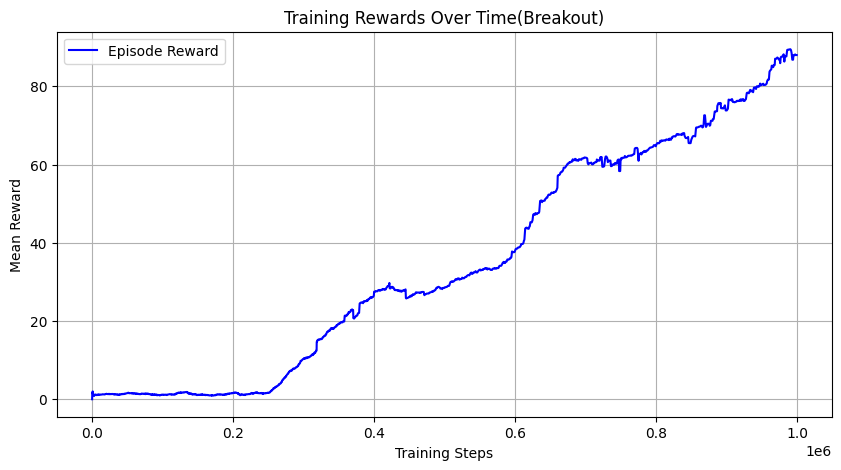

In [ ]:
import matplotlib.pyplot as plt

# Plot of episode reward over training steps
plt.figure(figsize=(10, 5))
plt.plot(df["step"], df["reward"], label="Episode Reward", color="blue")
plt.xlabel("Training Steps")
plt.ylabel("Mean Reward")
plt.title("Training Rewards Over Time(Breakout)")
plt.savefig("training_rewards_breakout.png")
plt.legend()
plt.grid()
plt.show()

### Loading the Trained Model for Evaluation  
We load the trained model and verify if it was loaded correctly.

### 🎬 Running the Trained Agent  
- The agent interacts with the environment and plays the game.  
- **Gameplay is recorded as a video**.  
- Frame rate is adjusted to slow down gameplay for better visibility.

In [ ]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
import imageio
import numpy as np
import time

# Load the trained model
model_path = "/kaggle/working/dqn_breakout_model.zip"
model = DQN.load(model_path)

# Verify model loading
print("Model loaded successfully!")
print("Model Policy:", model.policy)

# Set up the environment
env = make_atari_env("BreakoutNoFrameskip-v4", n_envs=1, seed=42)
env = VecFrameStack(env, n_stack=4)  # Frame stacking for better performance

# Print action space for debugging
print("Action Space:", env.action_space)

# Initialize observation and variables
obs = env.reset()
frames = []
total_reward = 0
episode = 1

# Frame rate control
target_fps = 60
frame_delay = 1.0 / target_fps  # Delay between frames in seconds

# Run the agent in the environment
max_steps = 10000  # Sufficient for multiple Breakout episodes
for step in range(max_steps):
    action, _states = model.predict(obs, deterministic=True)  # Greedy policy
    obs, rewards, dones, info = env.step(action)
    total_reward += rewards[0]  # Accumulate the reward

    # Track ball and paddle dynamics
    if rewards[0] > 0:
        result = "Brick Broken"
    else:
        result = "Playing"

    # Render the game as an RGB array and save the frame
    frame = env.render(mode="rgb_array")
    frames.append(frame)

    # Add delay to maintain proper game speed
    time.sleep(frame_delay)

    # Check if episode has finished (all lives lost)
    if dones.any():
        print(f"Episode {episode} finished! Total Reward: {total_reward}")
        obs = env.reset()
        print(f"Starting Episode {episode + 1}...")
        total_reward = 0
        episode += 1

# Save the recorded frames as a video
video_path = "/kaggle/working/breakout_playback.mp4"
imageio.mimsave(
    video_path,
    frames,
    fps=target_fps,
    quality=10,
    codec="libx264",
    pixelformat="yuv420p",
)

print(f"✅ Gameplay video saved to {video_path}")

env.close()

Model loaded successfully!
Model Policy: CnnPolicy(
  (q_net): QNetwork(
    (features_extractor): NatureCNN(
      (cnn): Sequential(
        (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
        (1): ReLU()
        (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
        (3): ReLU()
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
        (5): ReLU()
        (6): Flatten(start_dim=1, end_dim=-1)
      )
      (linear): Sequential(
        (0): Linear(in_features=3136, out_features=512, bias=True)
        (1): ReLU()
      )
    )
    (q_net): Sequential(
      (0): Linear(in_features=512, out_features=4, bias=True)
    )
  )
  (q_net_target): QNetwork(
    (features_extractor): NatureCNN(
      (cnn): Sequential(
        (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
        (1): ReLU()
        (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
        (3): ReLU()
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
        (5): ReLU()

### Conclusion  
- A **Deep Q-Network (DQN) agent** was trained on **Atari's Breakout**  
- The model **learned paddle control and brick-breaking strategies**  
- The agent achieved **scores up to 89 points** through efficient training  
- Gameplay was **recorded at native 60 FPS** for performance analysis  